# Data Analysis

## Retrieving the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, brier_score_loss, confusion_matrix, make_scorer, auc, roc_curve, precision_recall_curve 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import lightgbm as lgb
import warnings, logging, os

In [2]:
data = pd.read_csv("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [3]:
data.tail()

id diagnosis radius_mean texture_mean perimeter_mean area_mean  \
564  926424         M       21.56        22.39            142      1479   
565  926682         M       2O.I3        28.25          131.2      1261   
566  926954         M        16.6        28.08          108.3     858.1   
567  927241         M        20.6        29.33          14O.I      1265   
568   92751         B        7.76        24.54          47.92       181   

    smoothness_mean compactness_mean concavity_mean concave points_mean  ...  \
564           O.I11           O.I159         0.2439              O.I389  ...   
565          0.0978           O.I034          O.I44             0.09791  ...   
566         0.08455           O.I023        0.09251             0.05302  ...   
567          O.I178            0.277         0.3514               O.I52  ...   
568         0.05263          0.04362              0                   0  ...   

    radius_worst  texture_worst perimeter_worst area_worst smoothness_worst  \
564        25.45           26.4           166.1       2027            O.I41   
565        23.69          38.25             155       1731           O.I166   
566        18.98          34.12           126.7       1124           O.I139   
567        25.74          39.42           184.6       1821            O.I65   
568        9.456          30.37           59.16      268.6          0.08996   

    compactness_worst  concavity_worst concave points_worst symmetry_worst  \
564            0.2113           0.4107               0.2216          0.206   
565            O.I922           0.3215               O.I628         0.2572   
566            0.3094           0.3403               O.I418         0.2218   
567            0.8681           0.9387                0.265         0.4087   
568           0.06444                0                    0         0.2871   

     fractal_dimension_worst  
564                  0.07115  
565                  0.06637  
566                   0.0782  
567                    O.I24  
568                  0.07039  

[5 rows x 32 columns]

In [4]:
data.dtypes

id                           int64
diagnosis                   object
radius_mean                 object
texture_mean                object
perimeter_mean              object
area_mean                   object
smoothness_mean             object
compactness_mean            object
concavity_mean              object
concave points_mean         object
symmetry_mean               object
fractal_dimension_mean     float64
radius_se                   object
texture_se                  object
perimeter_se                object
area_se                     object
smoothness_se              float64
compactness_se              object
concavity_se                object
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst                object
texture_worst               object
perimeter_worst             object
area_worst                  object
smoothness_worst            object
compactness_worst           object
concavity_worst     

## Data Cleaning & Preprocessing


In [5]:
cols_to_clean = ['id',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

corrections = {"O": "0", "I": "1", ",": "."}

data[cols_to_clean] = data[cols_to_clean].replace(corrections, regex=True)
data.rename(columns={'concave points_mean': 'concave_points_mean', 'concave points_se':'concave_points_se', 'concave points_worst':'concave_points_worst'}, inplace=True)

data

id diagnosis radius_mean texture_mean perimeter_mean area_mean  \
0      842302         M       17.99        10.38          122.8      1001   
1      842517         M       20.57        17.77          132.9      1326   
2    84300903         M       19.69        21.25            130      1203   
3    84348301         M       11.42        20.38          77.58     386.1   
4    84358402         M       20.29        14.34          135.1      1297   
..        ...       ...         ...          ...            ...       ...   
564    926424         M       21.56        22.39            142      1479   
565    926682         M       20.13        28.25          131.2      1261   
566    926954         M        16.6        28.08          108.3     858.1   
567    927241         M        20.6        29.33          140.1      1265   
568     92751         B        7.76        24.54          47.92       181   

    smoothness_mean compactness_mean concavity_mean concave_points_mean  ...  \
0            0.1184           0.2776         0.3001              0.1471  ...   
1           0.08474          0.07864         0.0869             0.07017  ...   
2            0.1096           0.1599         0.1974              0.1279  ...   
3            0.1425           0.2839         0.2414              0.1052  ...   
4            0.1003           0.1328          0.198              0.1043  ...   
..              ...              ...            ...                 ...  ...   
564           0.111           0.1159         0.2439              0.1389  ...   
565          0.0978           0.1034          0.144             0.09791  ...   
566         0.08455           0.1023        0.09251             0.05302  ...   
567          0.1178            0.277         0.3514               0.152  ...   
568         0.05263          0.04362              0                   0  ...   

    radius_worst  texture_worst perimeter_worst area_worst smoothness_worst  \
0          25.38          17.33           184.6       2019           0.1622   
1          24.99          23.41           158.8       1956           0.1238   
2          23.57          25.53           152.5       1709           0.1444   
3          14.91           26.5           98.87      567.7           0.2098   
4          22.54          16.67           152.2       1575           0.1374   
..           ...            ...             ...        ...              ...   
564        25.45           26.4           166.1       2027            0.141   
565        23.69          38.25             155       1731           0.1166   
566        18.98          34.12           126.7       1124           0.1139   
567        25.74          39.42           184.6       1821            0.165   
568        9.456          30.37           59.16      268.6          0.08996   

    compactness_worst  concavity_worst concave_points_worst symmetry_worst  \
0              0.6656           0.7119               0.2654         0.4601   
1              0.1866           0.2416                0.186          0.275   
2              0.4245           0.4504                0.243         0.3613   
3              0.8663           0.6869               0.2575         0.6638   
4               0.205              0.4               0.1625         0.2364   
..                ...              ...                  ...            ...   
564            0.2113           0.4107               0.2216          0.206   
565            0.1922           0.3215               0.1628         0.2572   
566            0.3094           0.3403               0.1418         0.2218   
567            0.8681           0.9387                0.265         0.4087   
568           0.06444                0                    0         0.2871   

     fractal_dimension_worst  
0                     0.1189  
1                    0.08902  
2                    0.08758  
3                      0.173  
4                    0.07678  
..                       ...  
564                  0

In [6]:
df = data.copy()
cols_to_convert = ['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave_points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave_points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

df[cols_to_convert] = df[cols_to_convert].astype(float)

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave_points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave_points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
# Binary Encoding Preferred over other encoding alternatives
df["diagnosis"] = df["diagnosis"].replace({'M': 1, 'B': 0}).astype("int")

In [9]:
nans = df.isna().sum()
nans

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  2
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        1
symmetry_mean              2
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               1
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          1
symmetry_se                0
fractal_dimension_se       1
radius_worst               1
texture_worst              0
perimeter_worst            0
area_worst                 1
smoothness_worst           0
compactness_worst          5
concavity_worst            0
concave_points_worst       1
symmetry_worst             0
fractal_dimension_worst    1
dtype: int64

In [10]:
nans.describe()
nans

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             2
area_mean                  2
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        1
symmetry_mean              2
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               1
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          1
symmetry_se                0
fractal_dimension_se       1
radius_worst               1
texture_worst              0
perimeter_worst            0
area_worst                 1
smoothness_worst           0
compactness_worst          5
concavity_worst            0
concave_points_worst       1
symmetry_worst             0
fractal_dimension_worst    1
dtype: int64

In [11]:
#before imputing
df.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      567.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.943792   
std    1.250206e+08    0.483918     3.524049      4.301036       24.337216   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.100000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.180000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.200000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   567.000000       569.000000        569.000000      569.000000   
mean    655.053439         0.096360          0.104341        0.088799   
std     352.517744         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.050000         0.086370          0.064920        0.029560   
50%     546.400000         0.095870          0.092630        0.061540   
75%     785.600000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave_points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           568.000000  ...    568.000000     569.000000       569.000000   
mean              0.048830  ...     16.255315      25.677223       107.261213   
std               0.038779  ...      4.826147       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033455  ...     14.965000      25.410000        97.660000   
75%               0.073730  ...     18.767500      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   568.000000        569.000000         564.000000       569.000000   
mean    881.632746          0.132369           0.255338         0.272188   
std     569.307594          0.022832           0.157521         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.675000          0.116600           0.147775         0.114500   
50%     686.550000          0.131300           0.214850         0.226700   
75%    1085.000000          0.146000           0.340325         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            568.000000      569.000000               568.000000  
mean               0.114594        0.290076                 0.083968  
std                0.065790        0.061867                 0.018069  
min                0.000000        0.156500                 0.055040  
25%                0.064730        0.250400                 0.071468  
50%                0.099840        0.282200                 0.080050  
75%                0.161675        0.317900                 0.092082  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

In [12]:
columns_to_impute = ["perimeter_mean", "area_mean", "concave_points_mean",
                     "symmetry_mean", "perimeter_se", "fractal_dimension_se",
                     "radius_worst", "area_worst", "concave_points_worst",
                     "fractal_dimension_worst", "compactness_worst", "concave_points_se"]

In [13]:
df[columns_to_impute]

perimeter_mean  area_mean  concave_points_mean  symmetry_mean  \
0            122.80     1001.0              0.14710         0.2419   
1            132.90     1326.0              0.07017         0.1812   
2            130.00     1203.0              0.12790         0.2069   
3             77.58      386.1              0.10520         0.2597   
4            135.10     1297.0              0.10430         0.1809   
..              ...        ...                  ...            ...   
564          142.00     1479.0              0.13890         0.1726   
565          131.20     1261.0              0.09791         0.1752   
566          108.30      858.1              0.05302         0.1590   
567          140.10     1265.0              0.15200         0.2397   
568           47.92      181.0              0.00000         0.1587   

     perimeter_se  fractal_dimension_se  radius_worst  area_worst  \
0           8.589              0.006193        25.380      2019.0   
1           3.398              0.003532        24.990      1956.0   
2           4.585              0.004571        23.570      1709.0   
3           3.445              0.009208        14.910       567.7   
4           5.438              0.005115        22.540      1575.0   
..            ...                   ...           ...         ...   
564         7.673              0.004239        25.450      2027.0   
565         5.203              0.002498        23.690      1731.0   
566         3.425              0.003892        18.980      1124.0   
567         5.772              0.006185        25.740      1821.0   
568         2.548              0.002783         9.456       268.6   

     concave_points_worst  fractal_dimension_worst  compactness_worst  \
0                  0.2654                  0.11890            0.66560   
1                  0.1860                  0.08902            0.18660   
2                  0.2430                  0.08758            0.42450   
3                  0.2575                  0.17300            0.86630   
4                  0.1625                  0.07678            0.20500   
..                    ...                      ...                ...   
564                0.2216                  0.07115            0.21130   
565                0.1628                  0.06637            0.19220   
566                0.1418                  0.07820            0.30940   
567                0.2650                  0.12400            0.86810   
568                0.0000                  0.07039            0.06444   

     concave_points_se  
0              0.01587  
1              0.01340  
2              0.02058  
3              0.01867  
4              0.01885  
..                 ...  
564            0.02454  
565            0.01678  
566            0.01557  
567            0.01664  
568            0.00000  

[569 rows x 12 columns]

In [14]:
imputer = IterativeImputer(random_state=0)
imputer.fit(df[columns_to_impute])
df[columns_to_impute] = imputer.transform(df[columns_to_impute])

In [15]:
df[columns_to_impute].describe()

perimeter_mean    area_mean  concave_points_mean  symmetry_mean  \
count      569.000000   569.000000           569.000000     569.000000   
mean        91.969950   654.868983             0.048947       0.181149   
std         24.298976   351.912282             0.038845       0.027412   
min         43.790000   143.500000             0.000000       0.106000   
25%         75.170000   420.300000             0.020310       0.161900   
50%         86.240000   551.100000             0.033500       0.179200   
75%        104.100000   782.700000             0.074000       0.195700   
max        188.500000  2501.000000             0.201200       0.304000   

       perimeter_se  fractal_dimension_se  radius_worst   area_worst  \
count    569.000000            569.000000    569.000000   569.000000   
mean      91.417480              0.003797     16.269038   880.564857   
std      562.091034              0.002649      4.832995   569.376325   
min        0.757000              0.000895      7.930000   185.200000   
25%        1.612000              0.002248     13.010000   515.300000   
50%        2.289000              0.003187     14.970000   686.500000   
75%        3.528000              0.004558     18.790000  1084.000000   
max     5383.000000              0.029840     36.040000  4254.000000   

       concave_points_worst  fractal_dimension_worst  compactness_worst  \
count            569.000000               569.000000         569.000000   
mean               0.114598                 0.083941           0.254416   
std                0.065732                 0.018065           0.157291   
min                0.000000                 0.055040           0.027290   
25%                0.064930                 0.071460           0.147200   
50%                0.099930                 0.080040           0.211900   
75%                0.161400                 0.092080           0.339100   
max                0.291000                 0.207500           1.058000   

       concave_points_se  
count         569.000000  
mean            0.011785  
std             0.006148  
min             0.000000  
25%             0.007638  
50%             0.010930  
75%             0.014710  
max             0.052790

In [16]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Exploratory Data Analysis

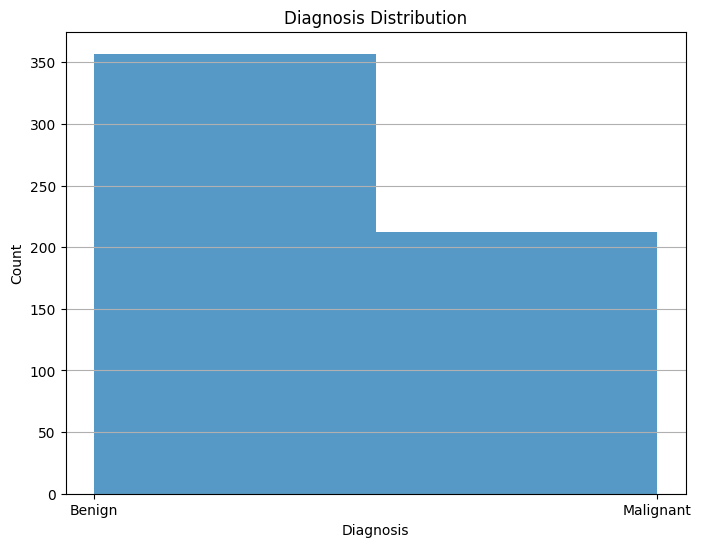

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df["diagnosis"], bins=2, alpha=0.75)
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.xticks([0, 1], ["Benign", "Malignant"])
plt.grid(axis="y")
plt.title("Diagnosis Distribution")

plt.show()

[]

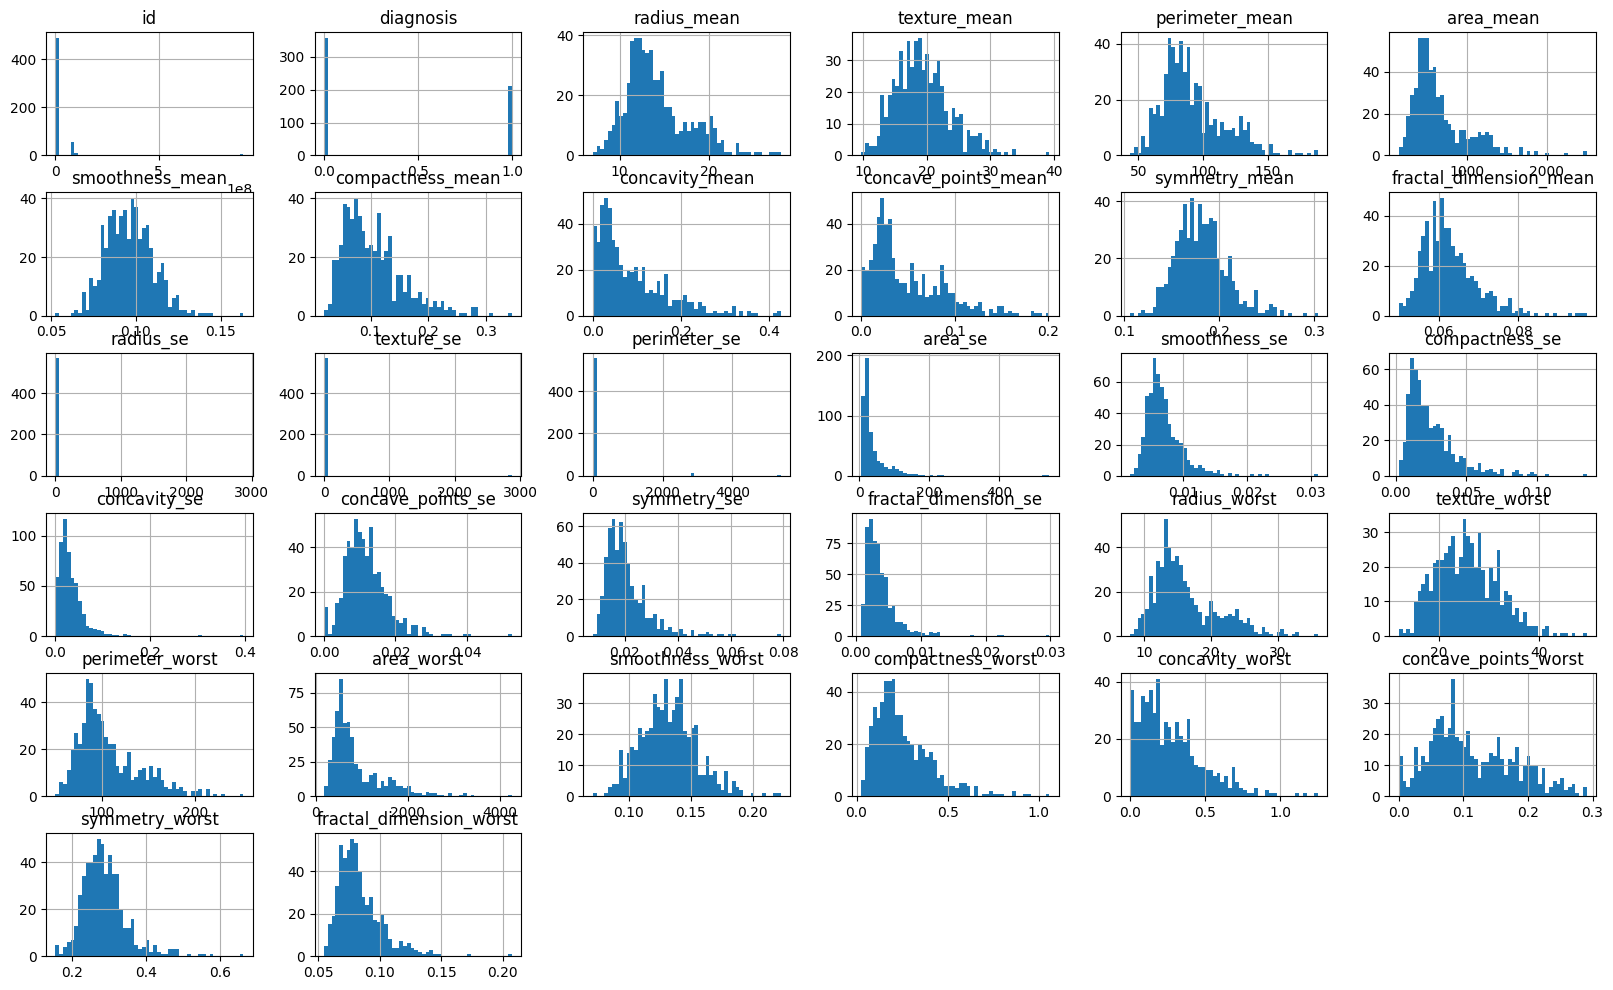

In [18]:
# overall visualization without separation
df.hist(bins=50, figsize=(20, 12))
plt.plot()

In [19]:
# Separating into 3 columns with different features
mean_columns = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
                'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']

se_columns = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
              'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se']

worst_columns = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
                 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst']

mean_corr = df[["diagnosis"] + mean_columns].corr()
se_corr = df[["diagnosis"] + se_columns].corr()
worst_corr = df[["diagnosis"] + worst_columns].corr()


In [20]:
mean_corr.sort_values(by="diagnosis", ascending=False)

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                1.000000     0.730029      0.415185        0.742685   
concave_points_mean      0.776703     0.822644      0.294070        0.851190   
perimeter_mean           0.742685     0.997853      0.329544        1.000000   
radius_mean              0.730029     1.000000      0.323782        0.997853   
area_mean                0.708801     0.987341      0.320992        0.986467   
concavity_mean           0.696360     0.676764      0.302418        0.716184   
compactness_mean         0.596534     0.506124      0.236702        0.556991   
texture_mean             0.415185     0.323782      1.000000        0.329544   
smoothness_mean          0.358560     0.170581     -0.023389        0.207379   
symmetry_mean            0.330894     0.147346      0.072060        0.182735   
fractal_dimension_mean  -0.012838    -0.311631     -0.076437       -0.261415   

                        area_mean  smoothness_mean  compactness_mean  \
diagnosis                0.708801         0.358560          0.596534   
concave_points_mean      0.823141         0.552807          0.831796   
perimeter_mean           0.986467         0.207379          0.556991   
radius_mean              0.987341         0.170581          0.506124   
area_mean                1.000000         0.176882          0.498285   
concavity_mean           0.685863         0.521984          0.883121   
compactness_mean         0.498285         0.659123          1.000000   
texture_mean             0.320992        -0.023389          0.236702   
smoothness_mean          0.176882         1.000000          0.659123   
symmetry_mean            0.150834         0.557350          0.602805   
fractal_dimension_mean  -0.283238         0.584792          0.565369   

                        concavity_mean  concave_points_mean  symmetry_mean  \
diagnosis                     0.696360             0.776703       0.330894   
concave_points_mean           0.921490             1.000000       0.463257   
perimeter_mean                0.716184             0.851190       0.182735   
radius_mean                   0.676764             0.822644       0.147346   
area_mean                     0.685863             0.823141       0.150834   
concavity_mean                1.000000             0.921490       0.500812   
compactness_mean              0.883121             0.831796       0.602805   
texture_mean                  0.302418             0.294070       0.072060   
smoothness_mean               0.521984             0.552807       0.557350   
symmetry_mean                 0.500812             0.463257       1.000000   
fractal_dimension_mean        0.336783             0.166800       0.481344   

                        fractal_dimension_mean  
diagnosis                            -0.012838  
concave_points_mean                   0.166800  
perimeter_mean                       -0.261415  
radius_mean                          -0.311631  
area_mean                            -0.283238  
concavity_mean                        0.336783  
compactness_mean                      0.565369  
texture_mean                         -0.076437  
smoothness_mean                       0.584792  
symmetry_mean                         0.481344  
fractal_dimension_mean                1.000000

In [21]:
se_corr.sort_values(by="diagnosis", ascending=False)

diagnosis  radius_se  texture_se  perimeter_se  \
diagnosis              1.000000   0.055708    0.015164      0.095101   
area_se                0.548236   0.449786    0.009679      0.032458   
concave_points_se      0.410881   0.016780    0.094115      0.113931   
compactness_se         0.292999   0.006073    0.011662      0.073841   
concavity_se           0.253730   0.045241    0.024374      0.058207   
perimeter_se           0.095101  -0.005054    0.273157      1.000000   
fractal_dimension_se   0.079047   0.011275    0.037059      0.023831   
radius_se              0.055708   1.000000   -0.002366     -0.005054   
texture_se             0.015164  -0.002366    1.000000      0.273157   
symmetry_se           -0.006522   0.139065    0.062629      0.026520   
smoothness_se         -0.067016   0.089944    0.119257      0.033166   

                       area_se  smoothness_se  compactness_se  concavity_se  \
diagnosis             0.548236      -0.067016        0.292999      0.253730   
area_se               1.000000       0.075150        0.284840      0.270895   
concave_points_se     0.417616       0.329489        0.741817      0.769844   
compactness_se        0.284840       0.336696        1.000000      0.801268   
concavity_se          0.270895       0.268685        0.801268      1.000000   
perimeter_se          0.032458       0.033166        0.073841      0.058207   
fractal_dimension_se  0.126596       0.426225        0.803596      0.727864   
radius_se             0.449786       0.089944        0.006073      0.045241   
texture_se            0.009679       0.119257        0.011662      0.024374   
symmetry_se           0.134109       0.413506        0.394713      0.309429   
smoothness_se         0.075150       1.000000        0.336696      0.268685   

                      concave_points_se  symmetry_se  fractal_dimension_se  
diagnosis                      0.410881    -0.006522              0.079047  
area_se                        0.417616     0.134109              0.126596  
concave_points_se              1.000000     0.311345              0.609283  
compactness_se                 0.741817     0.394713              0.803596  
concavity_se                   0.769844     0.309429              0.727864  
perimeter_se                   0.113931     0.026520              0.023831  
fractal_dimension_se           0.609283     0.368793              1.000000  
radius_se                      0.016780     0.139065              0.011275  
texture_se                     0.094115     0.062629              0.037059  
symmetry_se                    0.311345     1.000000              0.368793  
smoothness_se                  0.329489     0.413506              0.426225

In [22]:
worst_corr.sort_values(by="diagnosis", ascending=False)

diagnosis  radius_worst  texture_worst  \
diagnosis                 1.000000      0.776453       0.456903   
concave_points_worst      0.793672      0.787539       0.359710   
perimeter_worst           0.782914      0.993708       0.365098   
radius_worst              0.776453      1.000000       0.359912   
area_worst                0.733825      0.984023       0.345883   
concavity_worst           0.659610      0.573953       0.368366   
compactness_worst         0.590428      0.475277       0.360186   
texture_worst             0.456903      0.359912       1.000000   
smoothness_worst          0.421465      0.216560       0.225429   
symmetry_worst            0.416294      0.243502       0.233027   
fractal_dimension_worst   0.323499      0.093033       0.219062   

                         perimeter_worst  area_worst  smoothness_worst  \
diagnosis                       0.782914    0.733825          0.421465   
concave_points_worst            0.816407    0.747525          0.547683   
perimeter_worst                 1.000000    0.977588          0.236775   
radius_worst                    0.993708    0.984023          0.216560   
area_worst                      0.977588    1.000000          0.209155   
concavity_worst                 0.618344    0.543332          0.518523   
compactness_worst               0.528922    0.437832          0.568426   
texture_worst                   0.365098    0.345883          0.225429   
smoothness_worst                0.236775    0.209155          1.000000   
symmetry_worst                  0.269493    0.209172          0.493838   
fractal_dimension_worst         0.138540    0.079218          0.617611   

                         compactness_worst  concavity_worst  \
diagnosis                         0.590428         0.659610   
concave_points_worst              0.800652         0.855152   
perimeter_worst                   0.528922         0.618344   
radius_worst                      0.475277         0.573953   
area_worst                        0.437832         0.543332   
concavity_worst                   0.892193         1.000000   
compactness_worst                 1.000000         0.892193   
texture_worst                     0.360186         0.368366   
smoothness_worst                  0.568426         0.518523   
symmetry_worst                    0.615783         0.532520   
fractal_dimension_worst           0.810698         0.686333   

                         concave_points_worst  symmetry_worst  \
diagnosis                            0.793672        0.416294   
concave_points_worst                 1.000000        0.502449   
perimeter_worst                      0.816407        0.269493   
radius_worst                         0.787539        0.243502   
area_worst                           0.747525        0.209172   
concavity_worst                      0.855152        0.532520   
compactness_worst                    0.800652        0.615783   
texture_worst                        0.359710        0.233027   
smoothness_worst                     0.547683        0.493838   
symmetry_worst                       0.502449        1.000000   
fractal_dimension_worst              0.510589        0.538007   

                         fractal_dimension_worst  
diagnosis                               0.323499  
concave_points_worst                    0.510589  
perimeter_worst                         0.138540  
radius_worst                            0.093033  
area_worst                              0.079218  
concavity_worst                         0.686333  
compactness_worst                       0.810698  
texture_worst                           0.219062  
smoothness_worst                        0.617611  
symmetry_worst                          0.538007  
fractal_dimension_worst                 1.000000

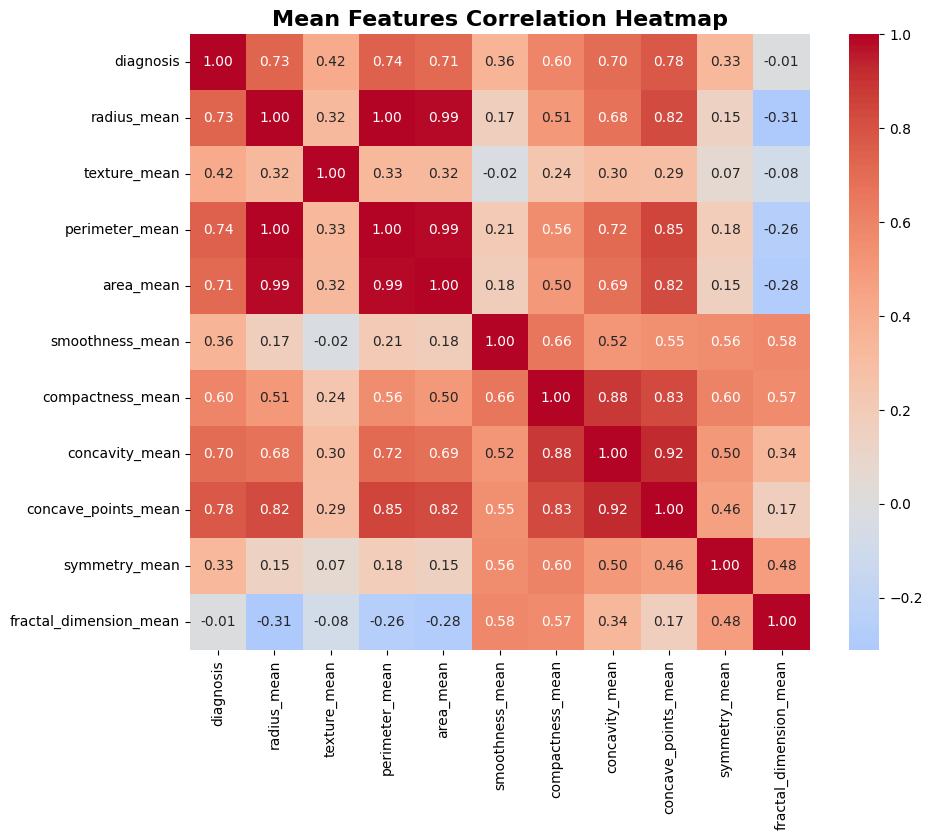

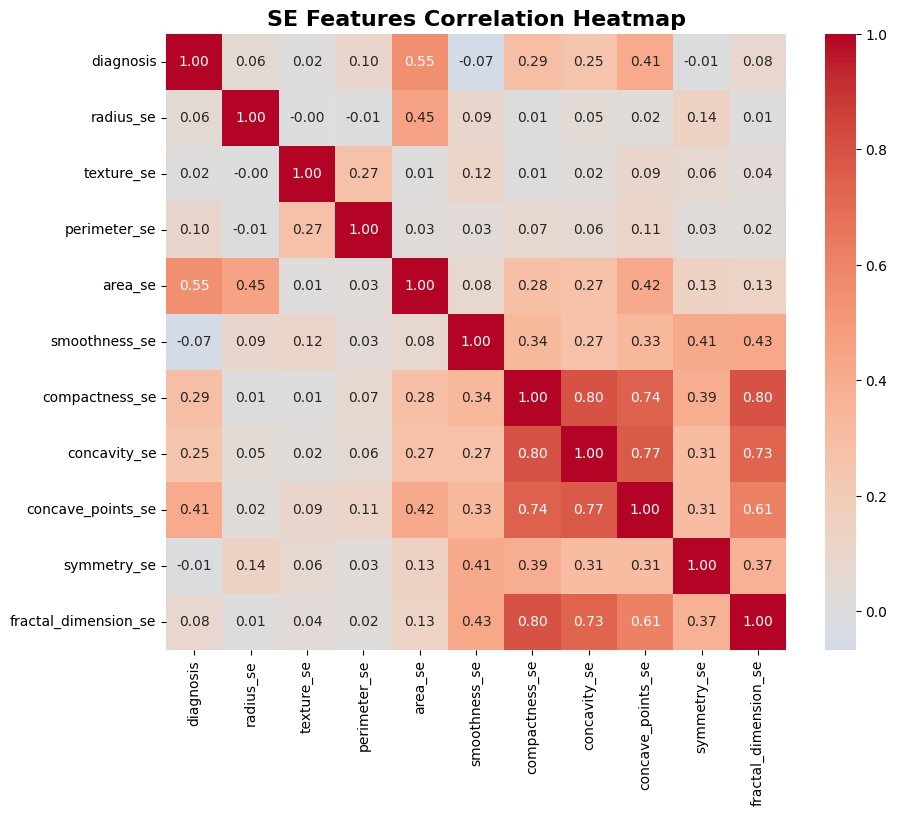

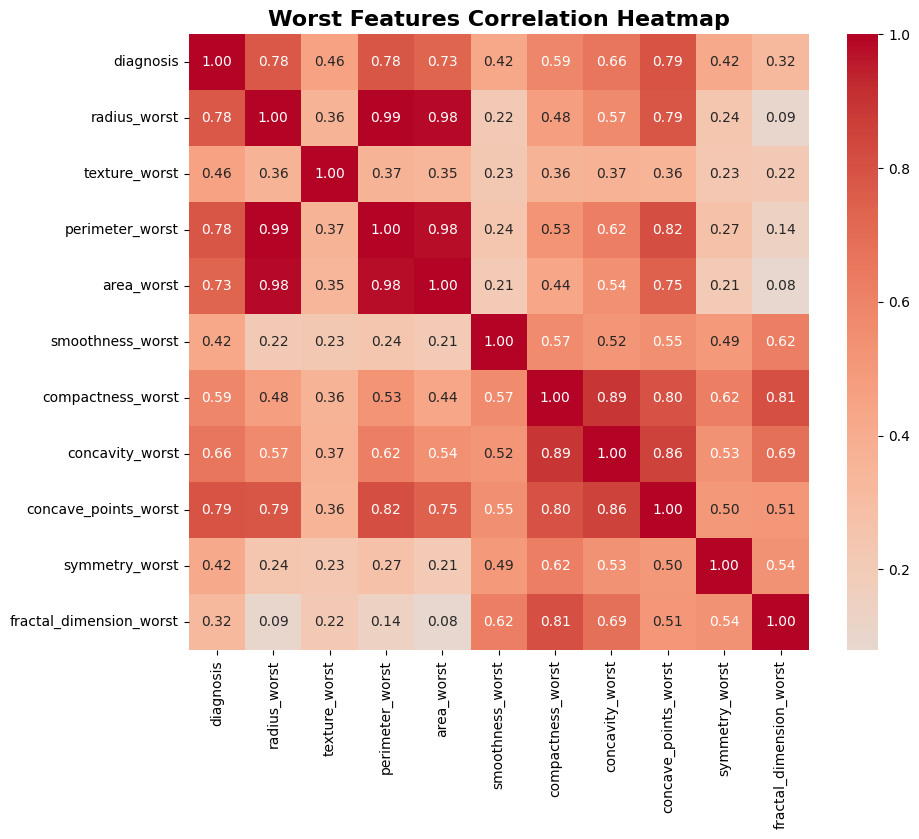

In [23]:
def plot_heatmap(corr_matrix, title, cmap="coolwarm"):
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, center=0)
    plt.title(title, fontweight="bold", fontsize=16)
    plt.show()

plot_heatmap(mean_corr, "Mean Features Correlation Heatmap")
plot_heatmap(se_corr, "SE Features Correlation Heatmap")
plot_heatmap(worst_corr, "Worst Features Correlation Heatmap")

## Feature Engineering

In [24]:
# checkpoint before preprocessing
df_corr = df.copy()
df_corr

id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   
1       1326.0          0.08474           0.07864         0.08690   
2       1203.0          0.10960           0.15990         0.19740   
3        386.1          0.14250           0.28390         0.24140   
4       1297.0          0.10030           0.13280         0.19800   
..         ...              ...               ...             ...   
564     1479.0          0.11100           0.11590         0.24390   
565     1261.0          0.09780           0.10340         0.14400   
566      858.1          0.08455           0.10230         0.09251   
567     1265.0          0.11780           0.27700         0.35140   
568      181.0          0.05263           0.04362         0.00000   

     concave_points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                0.14710  ...        25.380          17.33           184.60   
1                0.07017  ...        24.990          23.41           158.80   
2                0.12790  ...        23.570          25.53           152.50   
3                0.10520  ...        14.910          26.50            98.87   
4                0.10430  ...        22.540          16.67           152.20   
..                   ...  ...           ...            ...              ...   
564              0.13890  ...        25.450          26.40           166.10   
565              0.09791  ...        23.690          38.25           155.00   
566              0.05302  ...        18.980          34.12           126.70   
567              0.15200  ...        25.740          39.42           184.60   
568              0.00000  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0        2019.0           0.16220            0.66560           0.7119   
1        1956.0           0.12380            0.18660           0.2416   
2        1709.0           0.14440            0.42450           0.4504   
3         567.7           0.20980            0.86630           0.6869   
4        1575.0           0.13740            0.20500           0.4000   
..          ...               ...                ...              ...   
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave_points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0

In [25]:
df = df.drop("id", axis=1)

In [26]:
# Preparation for Further Preprocessing
X = df.drop("diagnosis", axis=1)
y = df["diagnosis"].values

In [27]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

[]

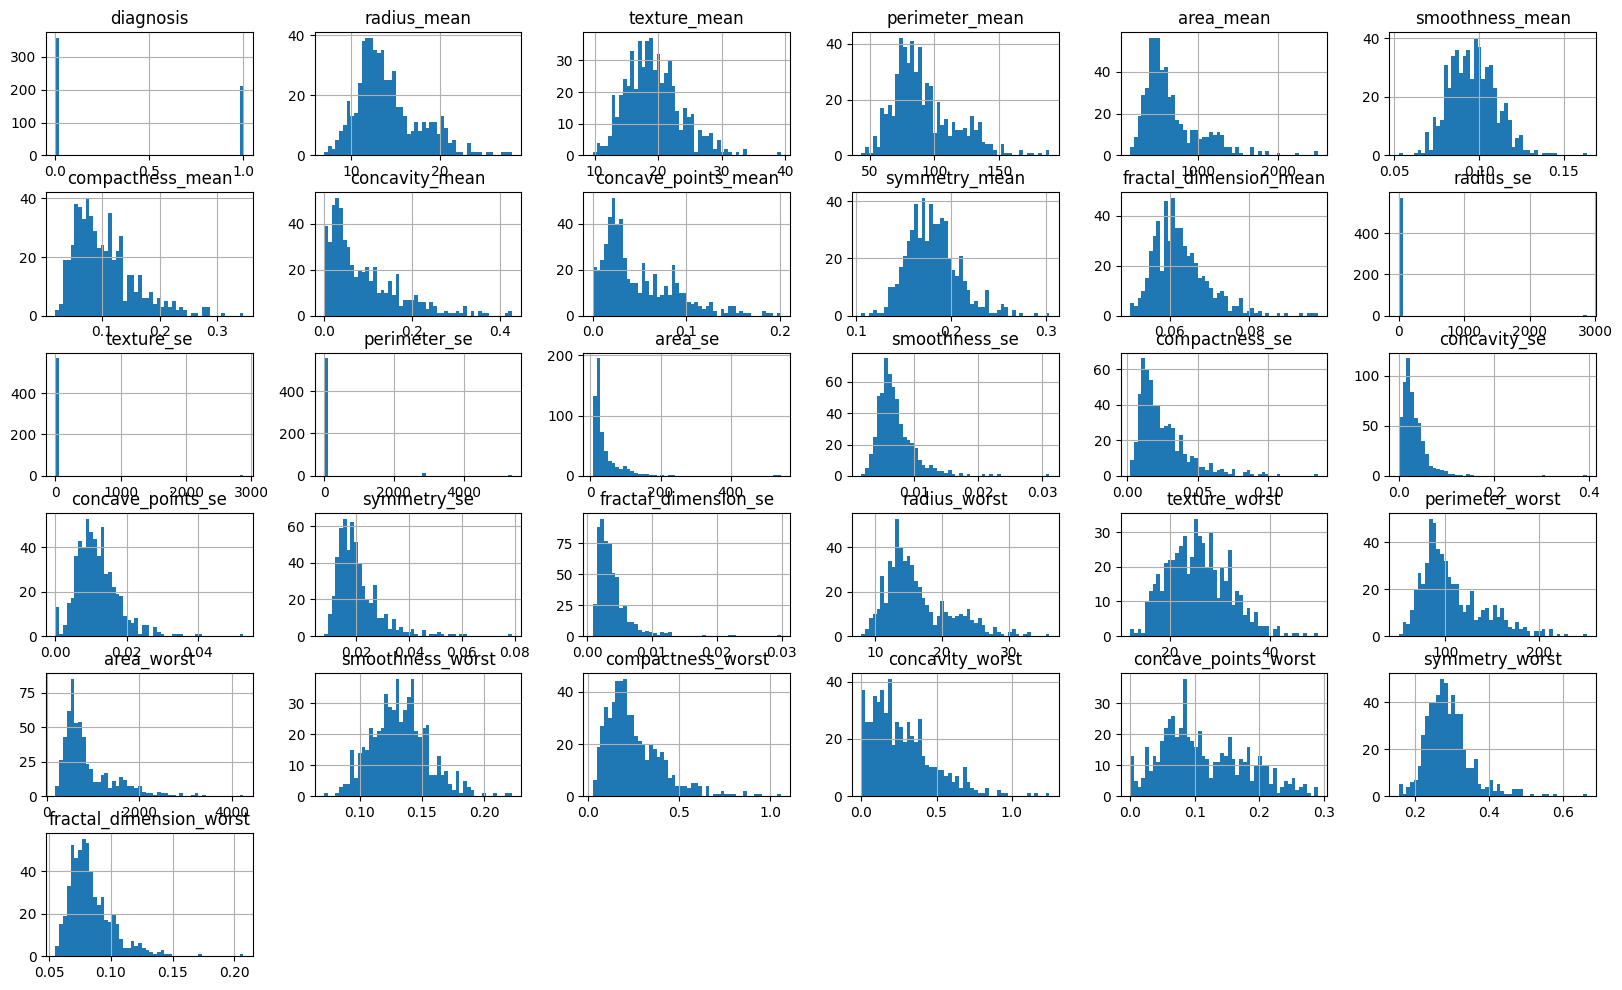

In [28]:
df.hist(bins=50, figsize=(20, 12))
plt.plot()

In [29]:
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled.shape

(569, 30)

[]

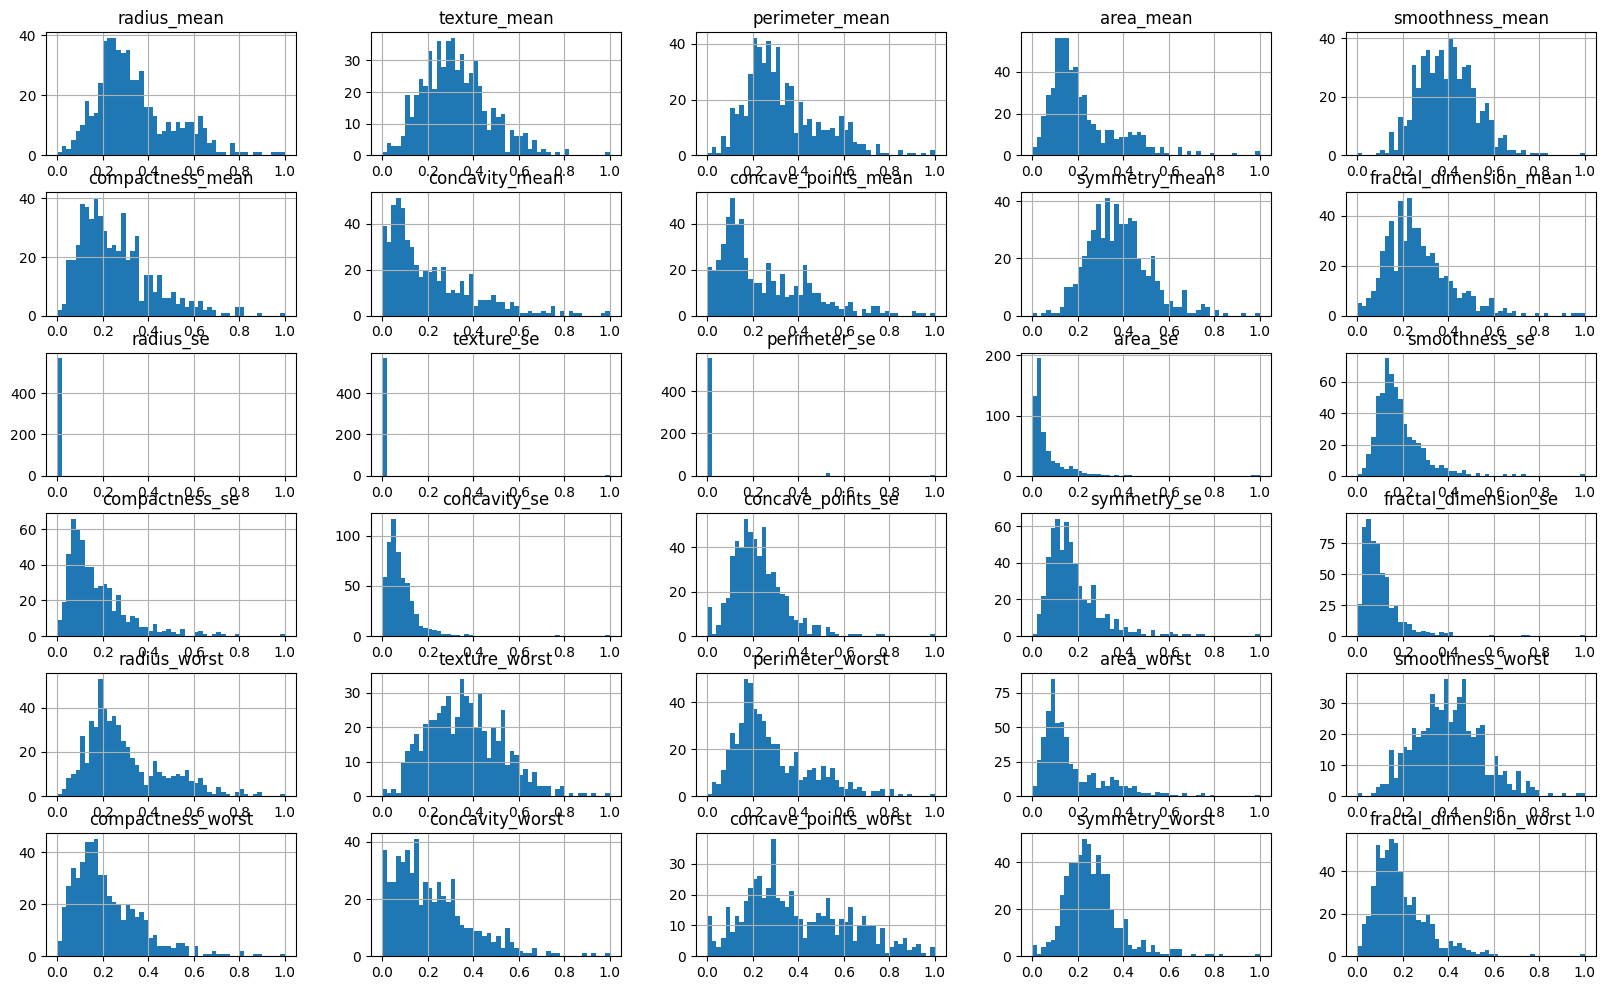

In [30]:
df_scaled.hist(bins=50, figsize=(20, 12))
plt.plot()

In [31]:
df_scaled

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       0.521037      0.022658        0.545989   0.363733         0.593753   
1       0.643144      0.272574        0.615783   0.501591         0.289880   
2       0.601496      0.390260        0.595743   0.449417         0.514309   
3       0.210090      0.360839        0.233501   0.102906         0.811321   
4       0.629893      0.156578        0.630986   0.489290         0.430351   
..           ...           ...             ...        ...              ...   
564     0.690000      0.428813        0.678668   0.566490         0.526948   
565     0.622320      0.626987        0.604036   0.474019         0.407782   
566     0.455251      0.621238        0.445788   0.303118         0.288165   
567     0.644564      0.663510        0.665538   0.475716         0.588336   
568     0.036869      0.501522        0.028540   0.015907         0.000000   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0            0.792037        0.703140             0.731113       0.686364   
1            0.181768        0.203608             0.348757       0.379798   
2            0.431017        0.462512             0.635686       0.509596   
3            0.811361        0.565604             0.522863       0.776263   
4            0.347893        0.463918             0.518390       0.378283   
..                ...             ...                  ...            ...   
564          0.296055        0.571462             0.690358       0.336364   
565          0.257714        0.337395             0.486630       0.349495   
566          0.254340        0.216753             0.263519       0.267677   
567          0.790197        0.823336             0.755467       0.675253   
568          0.074351        0.000000             0.000000       0.266162   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
0                  0.605518  ...      0.620776       0.141525   
1                  0.141323  ...      0.606901       0.303571   
2                  0.211247  ...      0.556386       0.360075   
3                  1.000000  ...      0.248310       0.385928   
4                  0.186816  ...      0.519744       0.123934   
..                      ...  ...           ...            ...   
564                0.132056  ...      0.623266       0.383262   
565                0.113100  ...      0.560655       0.699094   
566                0.137321  ...      0.393099       0.589019   
567                0.425442  ...      0.633582       0.730277   
568                0.187026  ...      0.054287       0.489072   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           0.668310    0.450698          0.601136           0.619292   
1           0.539818    0.435214          0.347553           0.154563   
2           0.508442    0.374508          0.483590           0.385375   
3           0.241347    0.094008          0.915472           0.814012   
4           0.506948    0.341575          0.437364           0.172415   
..               ...         ...               ...                ...   
564         0.576174    0.452664          0.461137           0.178527   
565         0.520892    0.379915          0.300007           0.159997   
566         0.379949    0.230731          0.282177           0.273705   
567         0.668310    0.402035          0.619626           0.815758   
568         0.043578    0.020497          0.124084           0.036043   

     concavity_worst  concave_points_worst  symmetry_worst  \
0           0.568610              0.912027        0.598462   
1           0.192971              0.639175        0.233590   
2           0.359744              0.835052        0.403706   
3           0.548642              0.884880        1.000000   
4           0.319489              0.558419        0.157500   
..               ...                   ...             ...   
564         0.328035              0.761512        0

In [32]:
std_scaler = StandardScaler()
df_std_scaled = std_scaler.fit_transform(df)
df_std_scaled = pd.DataFrame(df_std_scaled, columns=df.columns)

In [33]:
df_std_scaled = pd.DataFrame(df_std_scaled, columns=df_scaled.columns)
df_std_scaled.shape

(569, 30)

In [34]:
summary_statistics = df_std_scaled.describe()
summary_statistics

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -7.242791e-16  4.995028e-17   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984542e+00 -1.454393e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919935e-01 -6.671418e-01   
50%   -2.150816e-01 -1.046362e-01   -2.360179e-01 -2.951312e-01   
75%    4.693926e-01  5.841756e-01    4.996393e-01  3.635664e-01   
max    3.971288e+00  4.651889e+00    3.976093e+00  5.250614e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17         2.497514e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261165e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.378605e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.980087e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.455092e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.922928e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean    7.242791e-16            4.745277e-16  ... -7.367666e-16   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.743926e+00           -1.819865e+00  ... -1.726957e+00   
25%    -7.028416e-01           -7.226392e-01  ... -6.749243e-01   
50%    -7.116444e-02           -1.782793e-01  ... -2.690218e-01   
75%     5.313022e-01            4.709834e-01  ...  5.220739e-01   
max     4.485674e+00            4.910919e+00  ...  4.094430e+00   

       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  569.000000      5.690000e+02   
mean    1.248757e-17    -3.746271e-16    0.000000     -2.372638e-16   
std     1.000880e+00     1.000880e+00    1.000880      1.000880e+00   
min    -2.223994e+00    -1.693361e+00   -1.222349     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01   -0.642082     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01   -0.341137     -4.684277e-02   
75%     6.583411e-01     5.402790e-01    0.357609      5.975448e-01   
max     3.885905e+00     4.287337e+00    5.930003      3.955374e+00   

       compactness_worst  concavity_worst  concave_points_worst  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -3.246768e-16     7.492542e-17          2.997017e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.445259e+00    -1.305831e+00         -1.744951e+00   
25%        -6.822427e-01    -7.565142e-01         -7.562786e-01   
50%        -2.705409e-01    -2.182321e-01         -2.233427e-01   
75%         5.388636e-01     5.311411e-01          7.126450e-01   
max         5.113399e+00     4.700669e+00          2.686031e+00   

       symmetry_worst  fractal_dimension_worst  
count    5.690000e+02             5.690000e+02  
mean     2.622390e-16            -6.743288e-16  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601301e+00  
25%     -6.418637e-01            -6.915421e-01  
50%     -1.274095e-01            -2.161627e-01  
75%      4.501382e-01             4.509197e-01  
max      6.046041e+00             6.845825e+00  

[8 rows x 30 columns]

In [35]:
df_std_scaled.skew()

radius_mean                 0.942380
texture_mean                0.650450
perimeter_mean              0.990529
area_mean                   1.645937
smoothness_mean             0.456324
compactness_mean            1.190123
concavity_mean              1.401180
concave_points_mean         1.170169
symmetry_mean               0.727162
fractal_dimension_mean      1.304489
radius_se                  23.853557
texture_se                 16.823564
perimeter_se                6.900732
area_se                     5.447186
smoothness_se               2.314450
compactness_se              1.902221
concavity_se                5.110463
concave_points_se           1.443613
symmetry_se                 2.195133
fractal_dimension_se        3.912905
radius_worst                1.103130
texture_worst               0.498321
perimeter_worst             1.128164
area_worst                  1.859173
smoothness_worst            0.415426
compactness_worst           1.472097
concavity_worst             1.150237
c

In [36]:
df_transformed = df_std_scaled.copy()

# Square root transformation (without removing negative values)
features_sqrt = ["texture_mean", "perimeter_mean", "area_mean", "concavity_mean", "concave_points_mean", "concavity_worst", "concave_points_worst"]
for feat in features_sqrt:
    df_transformed[f"{feat}_sqrt"] = np.sign(df_transformed[feat]) * np.sqrt(np.abs(df_transformed[feat]) + 1)

# Logarithmic transformation (with handling for negative values)
features_log = ["radius_mean", "perimeter_worst", "area_worst", "concavity_worst", "concave_points_worst", "radius_worst", "texture_worst", "fractal_dimension_worst"]
for feat in features_log:
    df_transformed[f"{feat}_log"] = np.sign(df_transformed[feat]) * np.log(np.abs(df_transformed[feat]) + 1)

summary_statistics = df_transformed.describe()
summary_statistics

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  6.868164e-17   -7.242791e-16  4.995028e-17   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984542e+00 -1.454393e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919935e-01 -6.671418e-01   
50%   -2.150816e-01 -1.046362e-01   -2.360179e-01 -2.951312e-01   
75%    4.693926e-01  5.841756e-01    4.996393e-01  3.635664e-01   
max    3.971288e+00  4.651889e+00    3.976093e+00  5.250614e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.366672e-16      1.873136e-16    4.995028e-17         2.497514e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261165e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.378605e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.980087e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.455092e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.922928e+00   

       symmetry_mean  fractal_dimension_mean  ...  concavity_worst_sqrt  \
count   5.690000e+02            5.690000e+02  ...            569.000000   
mean    7.242791e-16            4.745277e-16  ...             -0.180436   
std     1.000880e+00            1.000880e+00  ...              1.326909   
min    -2.743926e+00           -1.819865e+00  ...             -1.518496   
25%    -7.028416e-01           -7.226392e-01  ...             -1.325336   
50%    -7.116444e-02           -1.782793e-01  ...             -1.103736   
75%     5.313022e-01            4.709834e-01  ...              1.237393   
max     4.485674e+00            4.910919e+00  ...              2.387607   

       concave_points_worst_sqrt  radius_mean_log  perimeter_worst_log  \
count                 569.000000       569.000000           569.000000   
mean                   -0.161633        -0.040605            -0.048673   
std                     1.346970         0.612557             0.612253   
min                    -1.656789        -1.108447            -0.990790   
25%                    -1.325247        -0.524365            -0.524479   
50%                    -1.106048        -0.194811            -0.251521   
75%                     1.308681         0.384849             0.431964   
max                     1.919904         1.603679             1.665315   

       area_worst_log  concavity_worst_log  concave_points_worst_log  \
count      569.000000           569.000000                569.000000   
mean        -0.066984            -0.039735                 -0.026768   
std          0.585959             0.612548                  0.635854   
min         -0.798565            -0.835441                 -1.009763   
25%         -0.495965            -0.563331                 -0.563197   
50%         -0.293518            -0.197401                 -0.201587   
75%          0.305725             0.426013                  0.538039   
max          1.935860             1.740584                  1.304550   

       radius_worst_log  texture_worst_log  fractal_dimension_worst_log  
count        569.000000         569.000000                   569.000000  
mean          -0.049386          -0.015266                    -0.046228  
std            0.612154           0.623498                     0.590160  
min           -1.003186          -1.170621                    -0.956012  
25%           -0.515768          -0.558832                    -0.525641  
50%           -0.238246          -0.042595                    -0.195701  
75%            0.420074           0.505818                     0.372198  
max            1.628148           1.586355                     2.059981  

[8 rows x 45 co

In [37]:
df_transformed.tail()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
564     2.110995      0.721473        2.060748   2.343925         1.041842   
565     1.704854      2.085134        1.615894   1.723908         0.102458   
566     0.702284      2.045574        0.672638   0.578013        -0.840484   
567     1.838341      2.336457        1.982487   1.735284         1.525767   
568    -1.808401      1.221792       -1.814427  -1.347739        -3.112085   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
564          0.219060        1.947285             2.317714      -0.312151   
565         -0.017833        0.693043             1.261571      -0.217217   
566         -0.038680        0.046588             0.104941      -0.808730   
567          3.272144        3.296944             2.655247       2.137880   
568         -1.150752       -1.114873            -1.261165      -0.819684   

     fractal_dimension_mean  ...  concavity_worst_sqrt  \
564               -0.931027  ...              1.290160   
565               -1.058611  ...              1.112013   
566               -0.895587  ...              1.151854   
567                1.043695  ...              2.048806   
568               -0.561032  ...             -1.518496   

     concave_points_worst_sqrt  radius_mean_log  perimeter_worst_log  \
564                   1.621510         1.134943             1.012532   
565                   1.316800         0.995048             0.884569   
566                   1.189202         0.531971             0.456792   
567                   1.813873         1.043220             1.195013   
568                  -1.656789        -1.032615            -0.889016   

     area_worst_log  concavity_worst_log  concave_points_worst_log  \
564        1.103688             0.509532                  0.966716   
565        0.914265             0.212344                  0.550409   
566        0.356221             0.282745                  0.346565   
567        0.975746             1.434514                  1.190929   
568       -0.730320            -0.835441                 -1.009763   

     radius_worst_log  texture_worst_log  fractal_dimension_worst_log  
564          1.065164           0.111273                    -0.535743  
565          0.930915           1.114288                    -0.679837  
566          0.445597           0.864936                    -0.276198  
567          1.085652           1.174933                     1.169215  
568         -0.880014           0.567691                    -0.560088  

[5 rows x 45 columns]

In [38]:
df_transformed.skew()

radius_mean                     0.942380
texture_mean                    0.650450
perimeter_mean                  0.990529
area_mean                       1.645937
smoothness_mean                 0.456324
compactness_mean                1.190123
concavity_mean                  1.401180
concave_points_mean             1.170169
symmetry_mean                   0.727162
fractal_dimension_mean          1.304489
radius_se                      23.853557
texture_se                     16.823564
perimeter_se                    6.900732
area_se                         5.447186
smoothness_se                   2.314450
compactness_se                  1.902221
concavity_se                    5.110463
concave_points_se               1.443613
symmetry_se                     2.195133
fractal_dimension_se            3.912905
radius_worst                    1.103130
texture_worst                   0.498321
perimeter_worst                 1.128164
area_worst                      1.859173
smoothness_worst

## Data Visualization

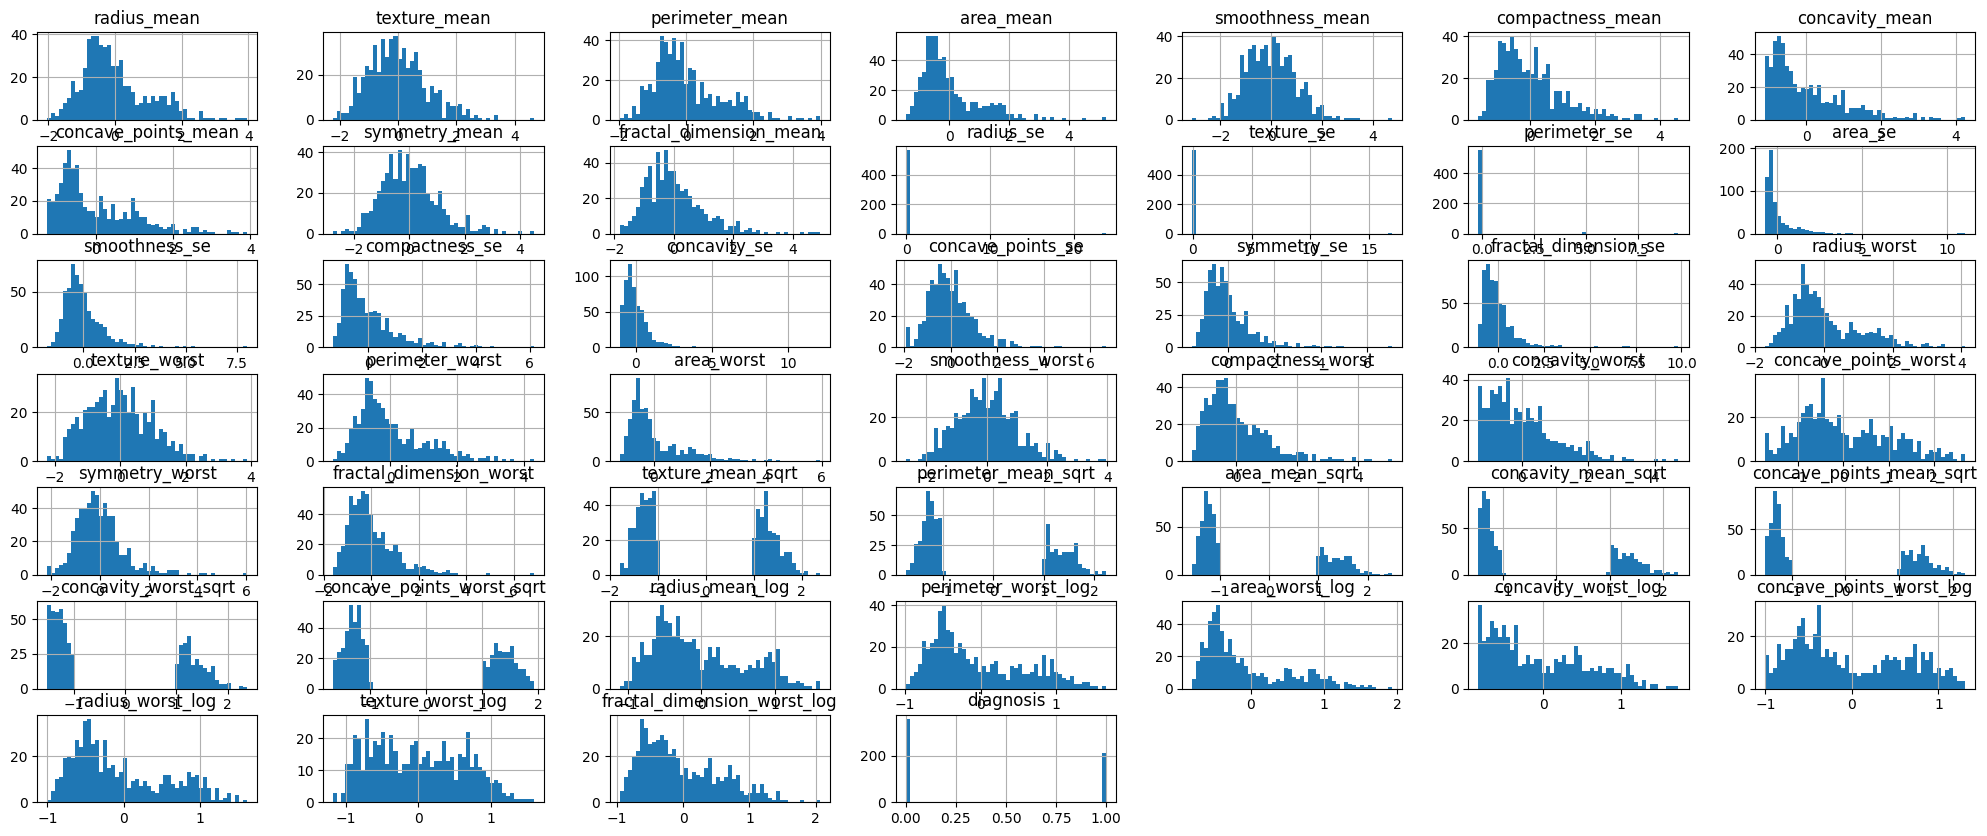

In [39]:
# Restoring diagnosis column in a variable only for visualization purposes
df_transformed_clean = df_transformed.copy()
df_transformed_clean['diagnosis'] = df['diagnosis']

df_transformed_clean.hist(bins=50, figsize=(25, 10))
plt.show()

In [40]:
df_transformed.tail()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
564     2.110995      0.721473        2.060748   2.343925         1.041842   
565     1.704854      2.085134        1.615894   1.723908         0.102458   
566     0.702284      2.045574        0.672638   0.578013        -0.840484   
567     1.838341      2.336457        1.982487   1.735284         1.525767   
568    -1.808401      1.221792       -1.814427  -1.347739        -3.112085   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
564          0.219060        1.947285             2.317714      -0.312151   
565         -0.017833        0.693043             1.261571      -0.217217   
566         -0.038680        0.046588             0.104941      -0.808730   
567          3.272144        3.296944             2.655247       2.137880   
568         -1.150752       -1.114873            -1.261165      -0.819684   

     fractal_dimension_mean  ...  concavity_worst_sqrt  \
564               -0.931027  ...              1.290160   
565               -1.058611  ...              1.112013   
566               -0.895587  ...              1.151854   
567                1.043695  ...              2.048806   
568               -0.561032  ...             -1.518496   

     concave_points_worst_sqrt  radius_mean_log  perimeter_worst_log  \
564                   1.621510         1.134943             1.012532   
565                   1.316800         0.995048             0.884569   
566                   1.189202         0.531971             0.456792   
567                   1.813873         1.043220             1.195013   
568                  -1.656789        -1.032615            -0.889016   

     area_worst_log  concavity_worst_log  concave_points_worst_log  \
564        1.103688             0.509532                  0.966716   
565        0.914265             0.212344                  0.550409   
566        0.356221             0.282745                  0.346565   
567        0.975746             1.434514                  1.190929   
568       -0.730320            -0.835441                 -1.009763   

     radius_worst_log  texture_worst_log  fractal_dimension_worst_log  
564          1.065164           0.111273                    -0.535743  
565          0.930915           1.114288                    -0.679837  
566          0.445597           0.864936                    -0.276198  
567          1.085652           1.174933                     1.169215  
568         -0.880014           0.567691                    -0.560088  

[5 rows x 45 columns]

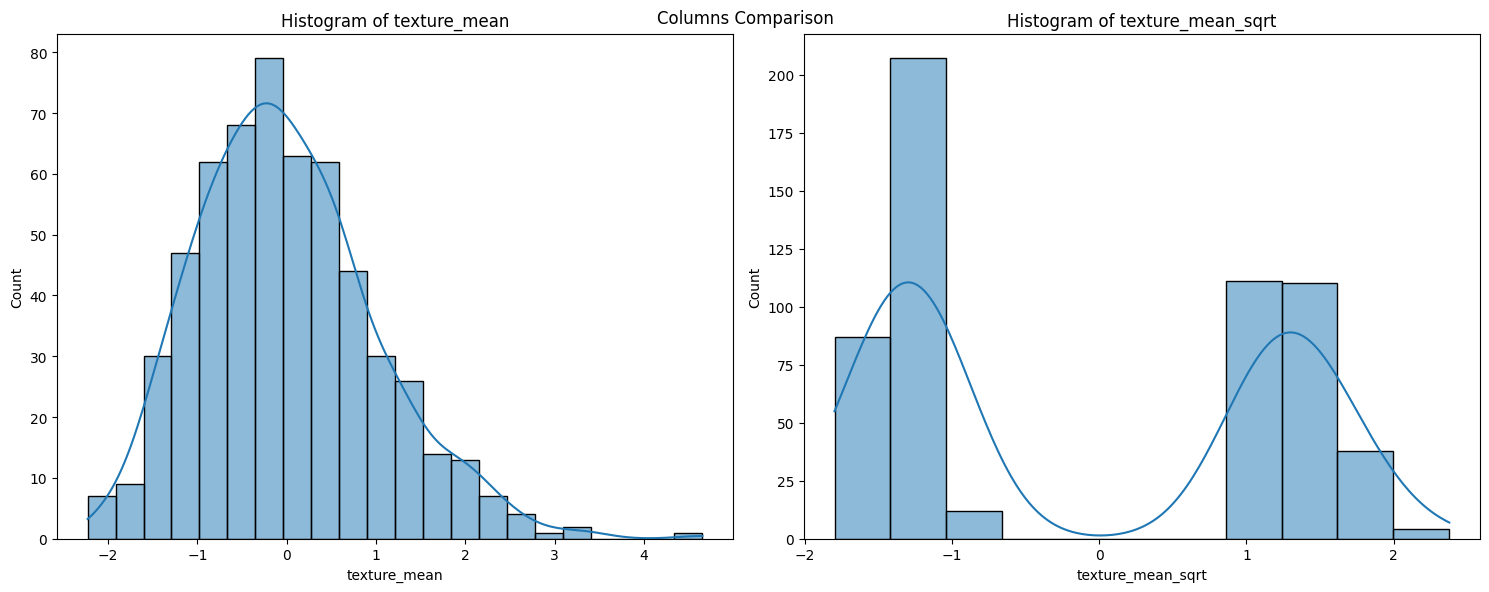

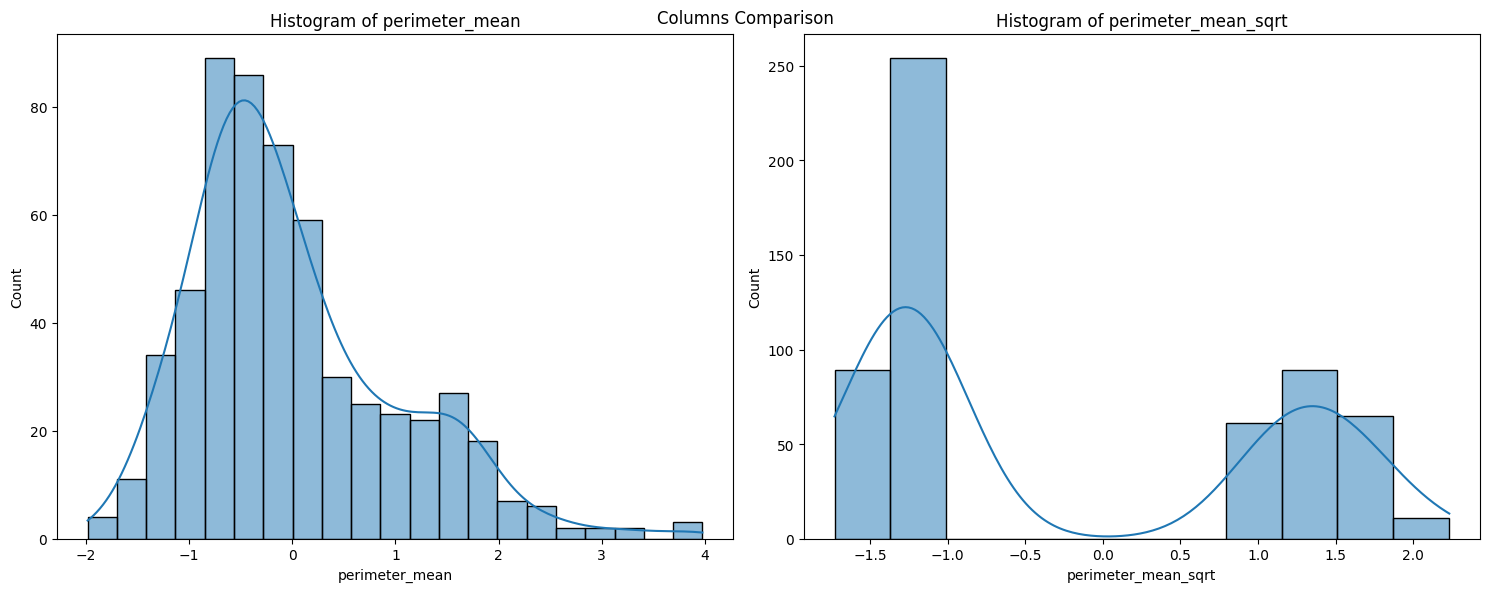

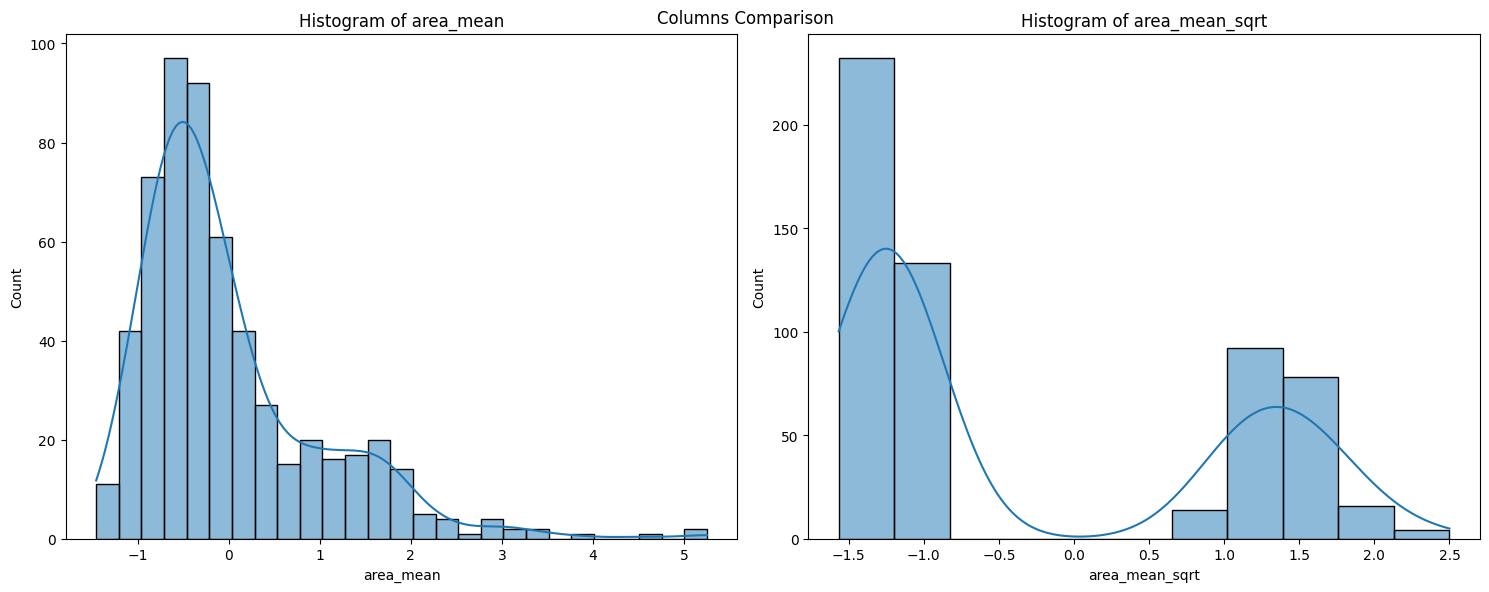

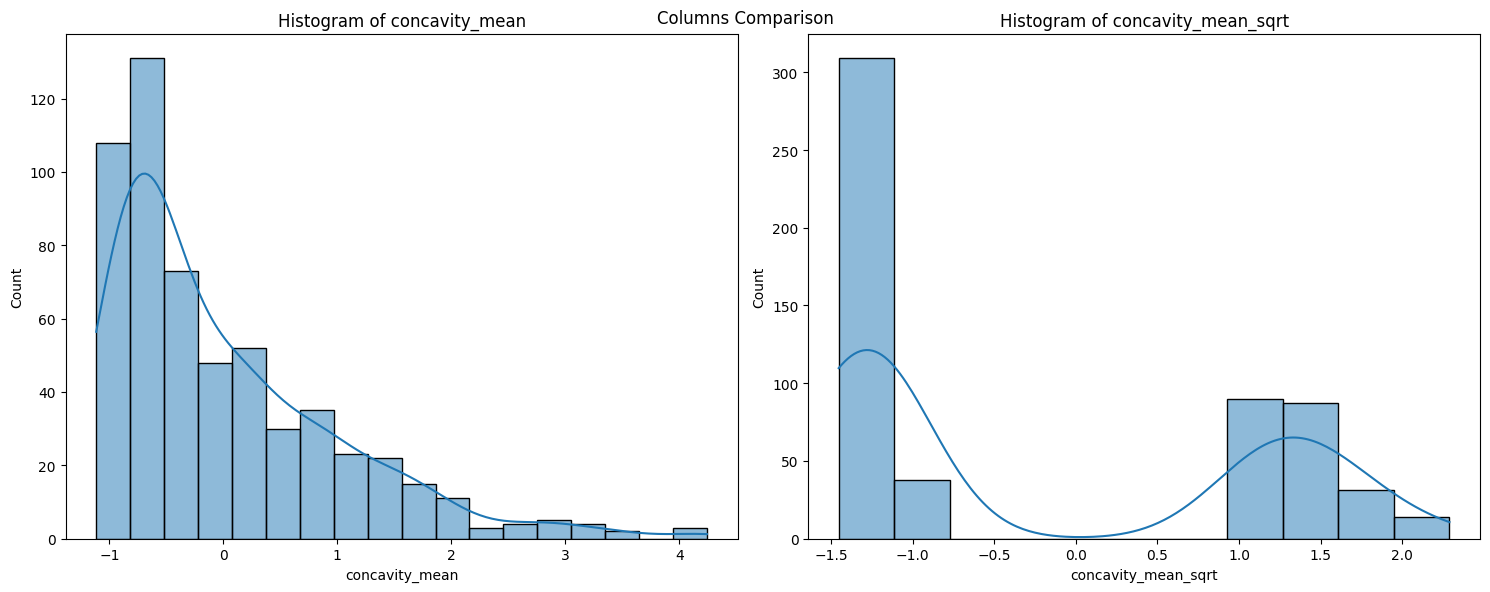

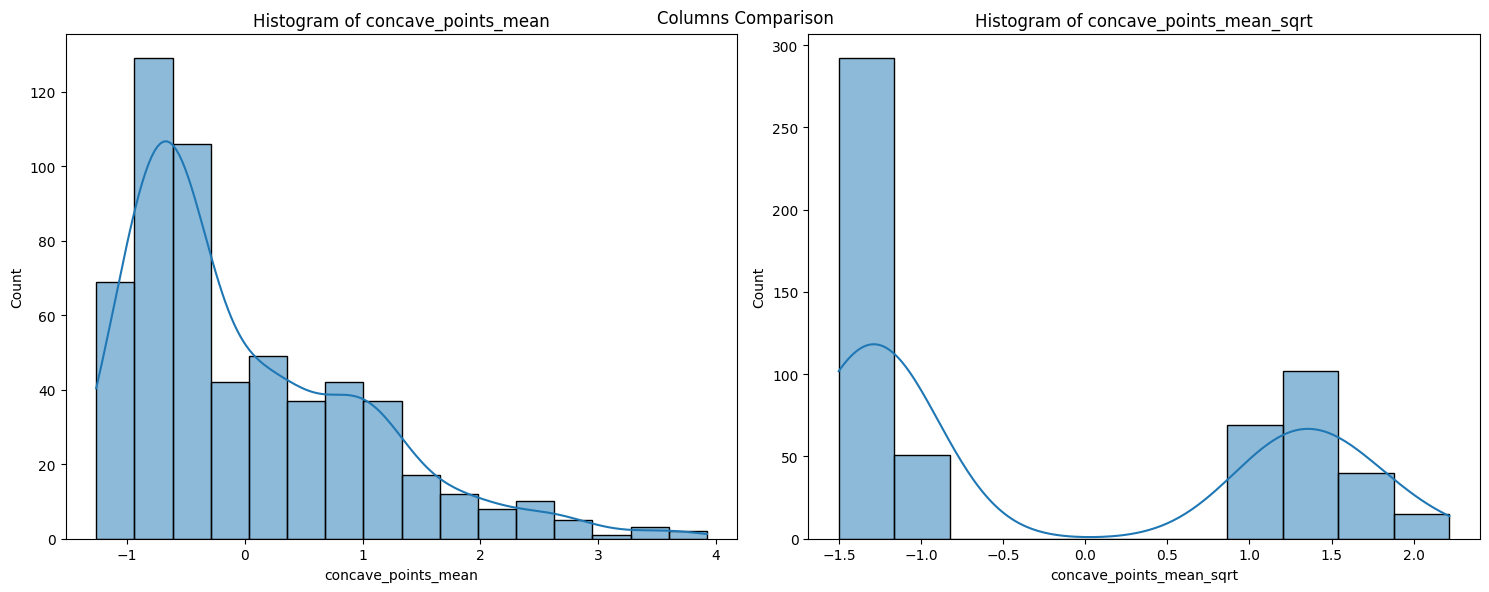

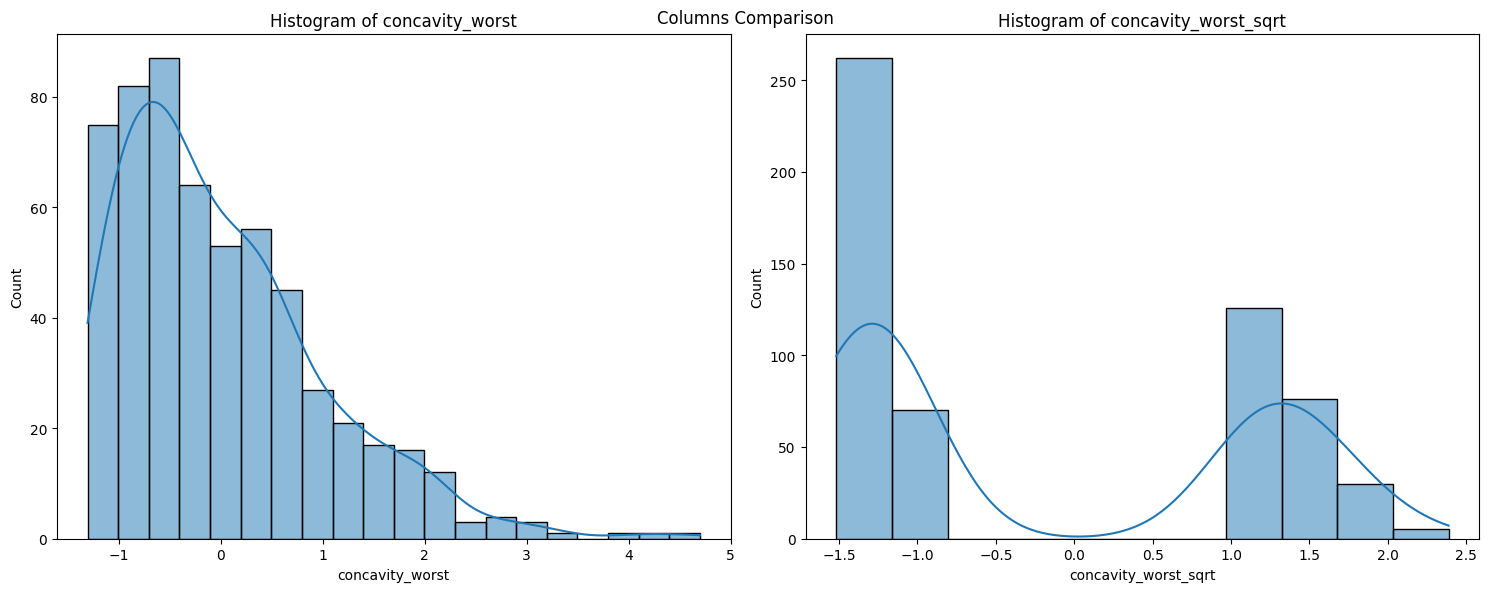

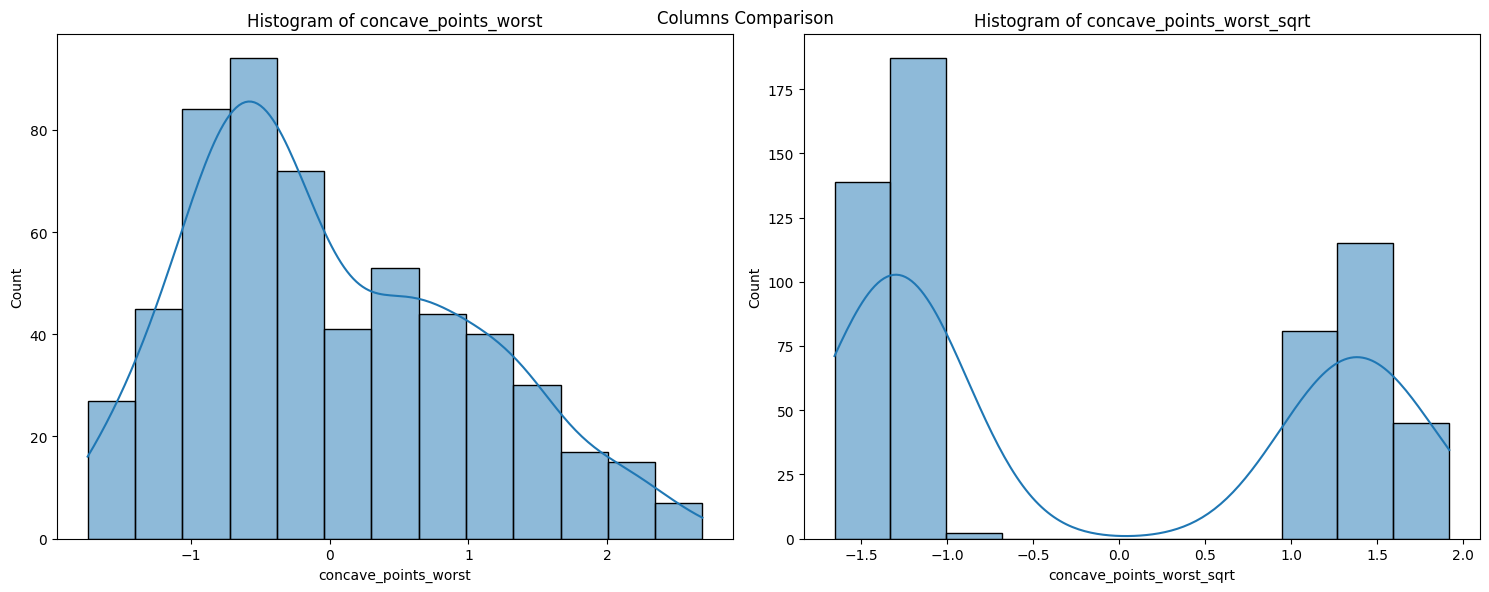

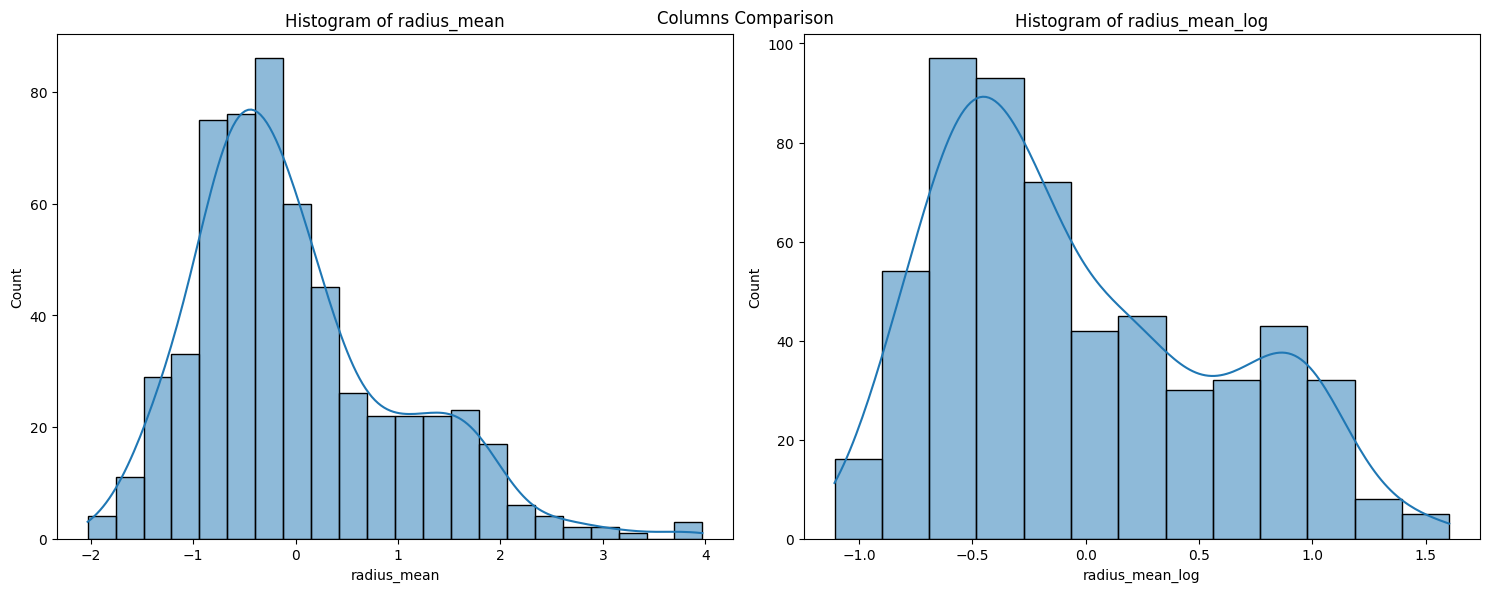

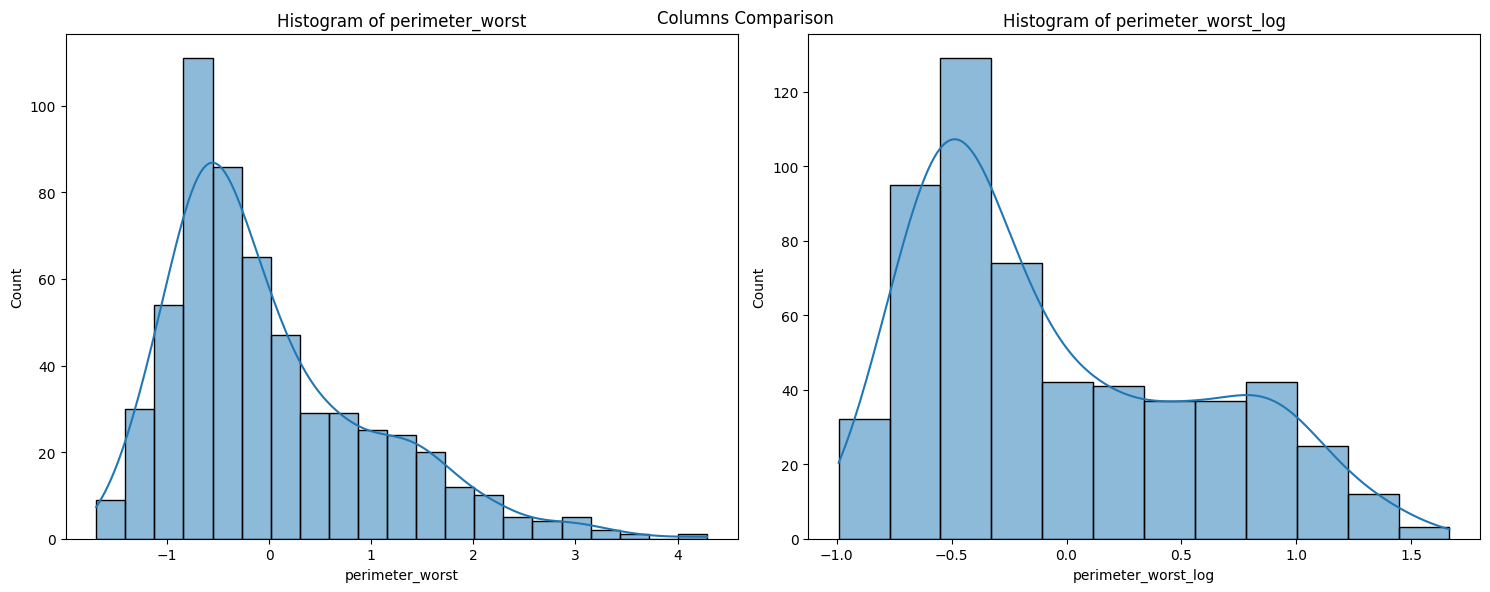

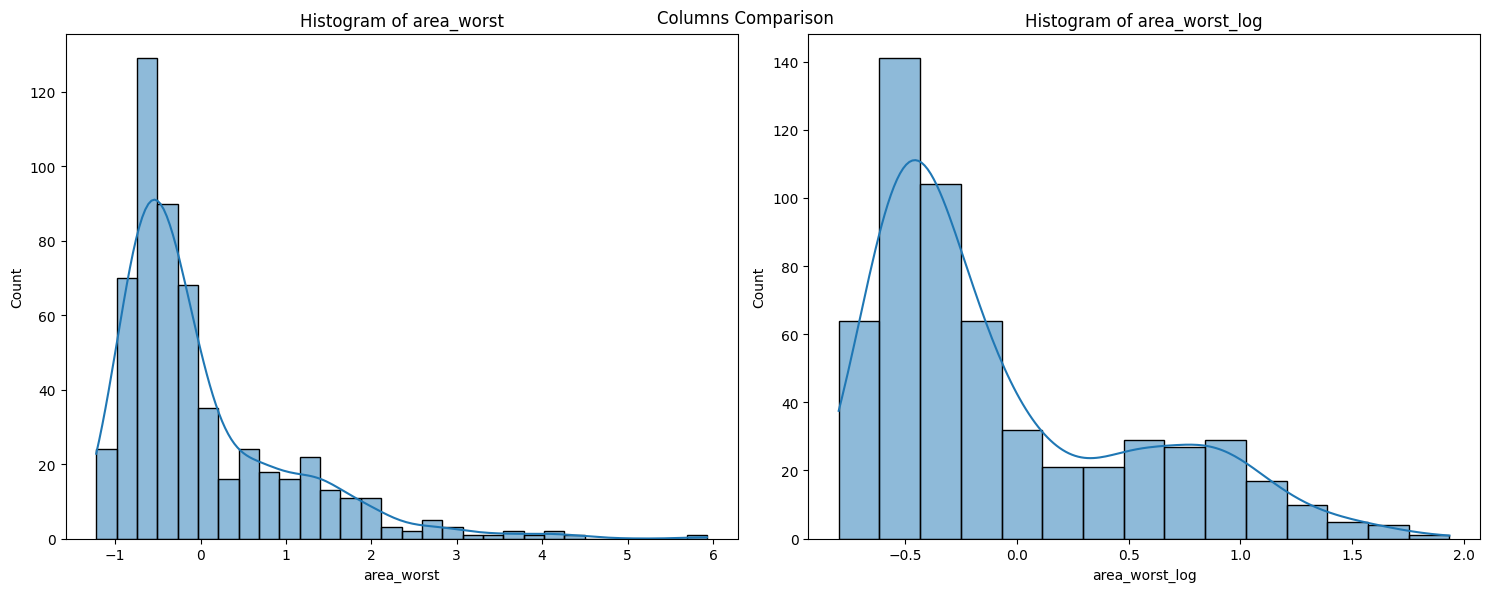

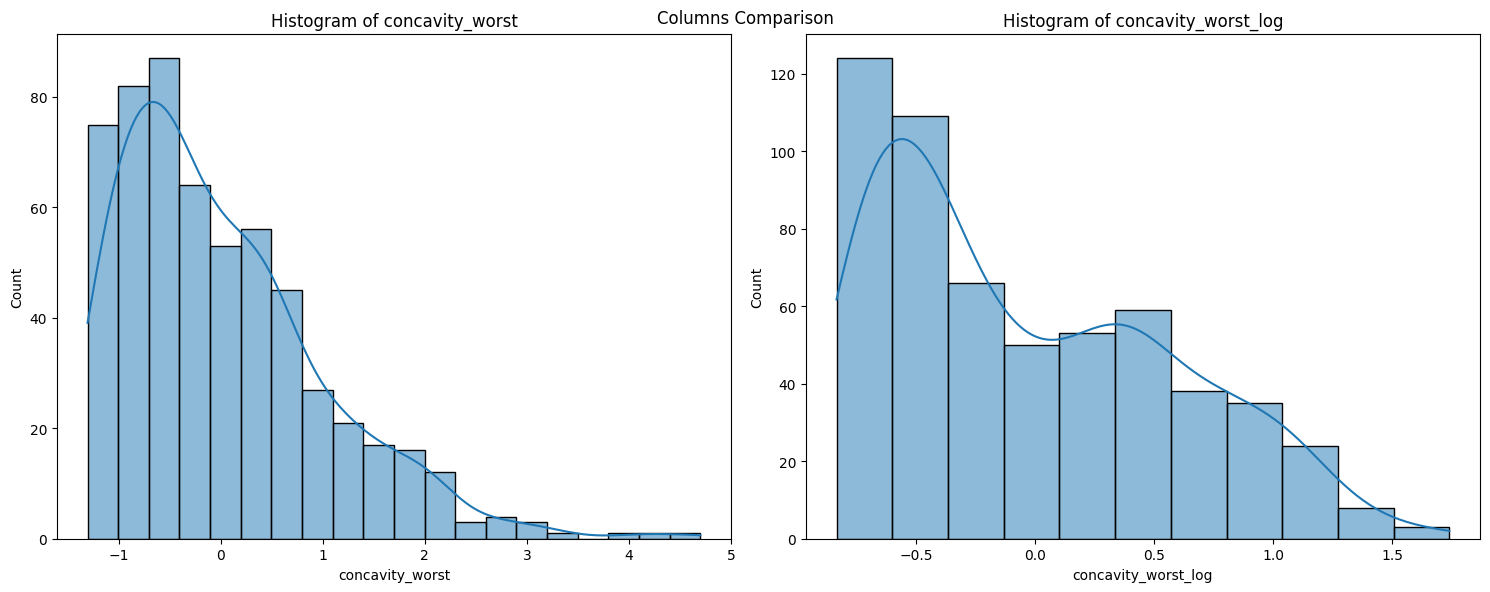

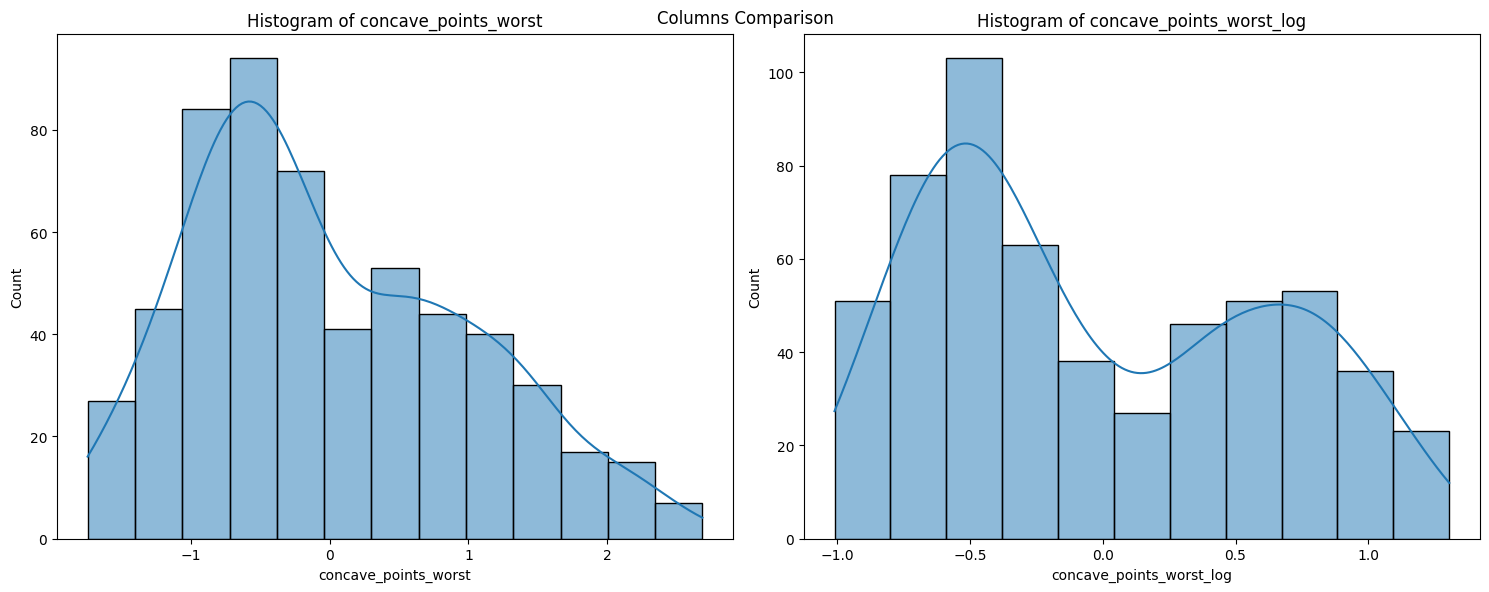

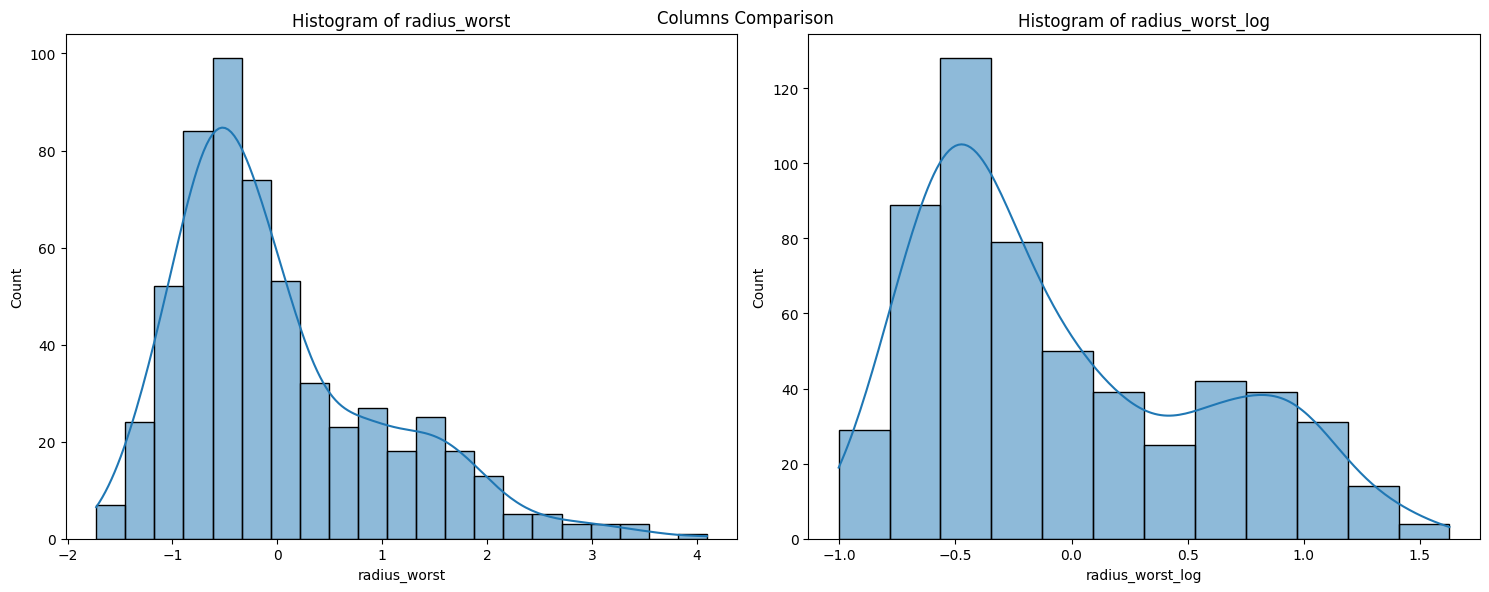

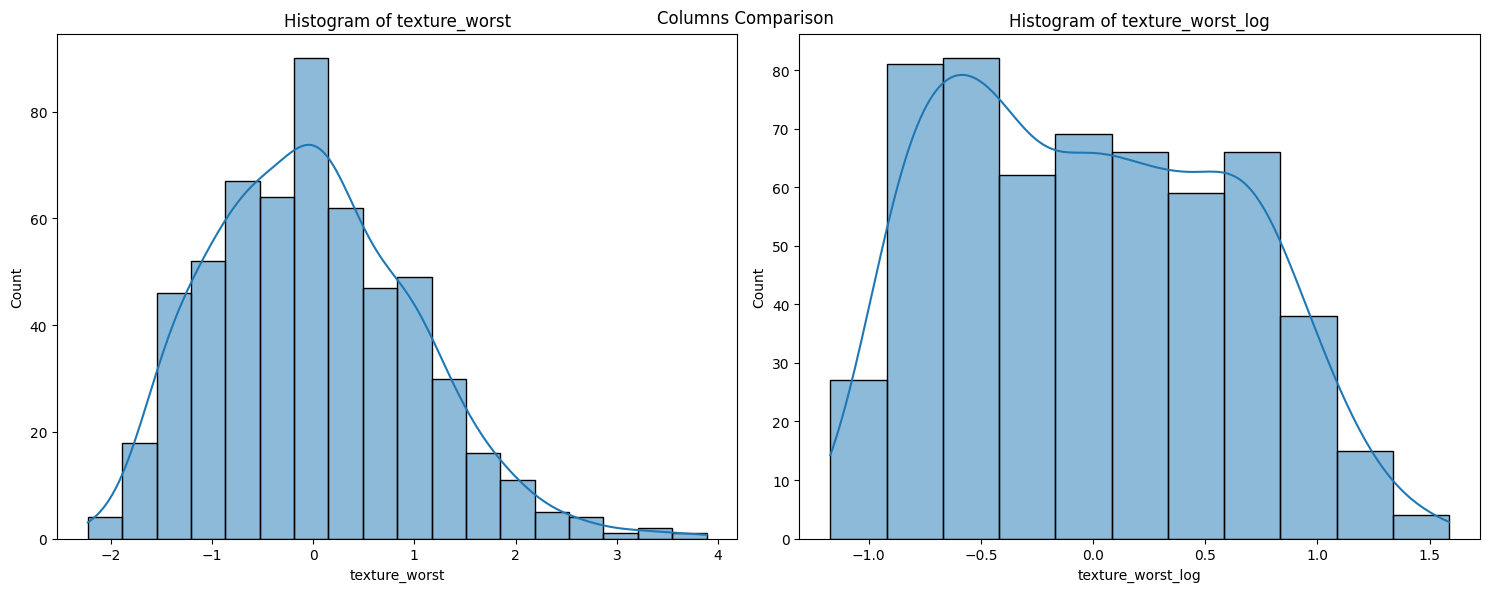

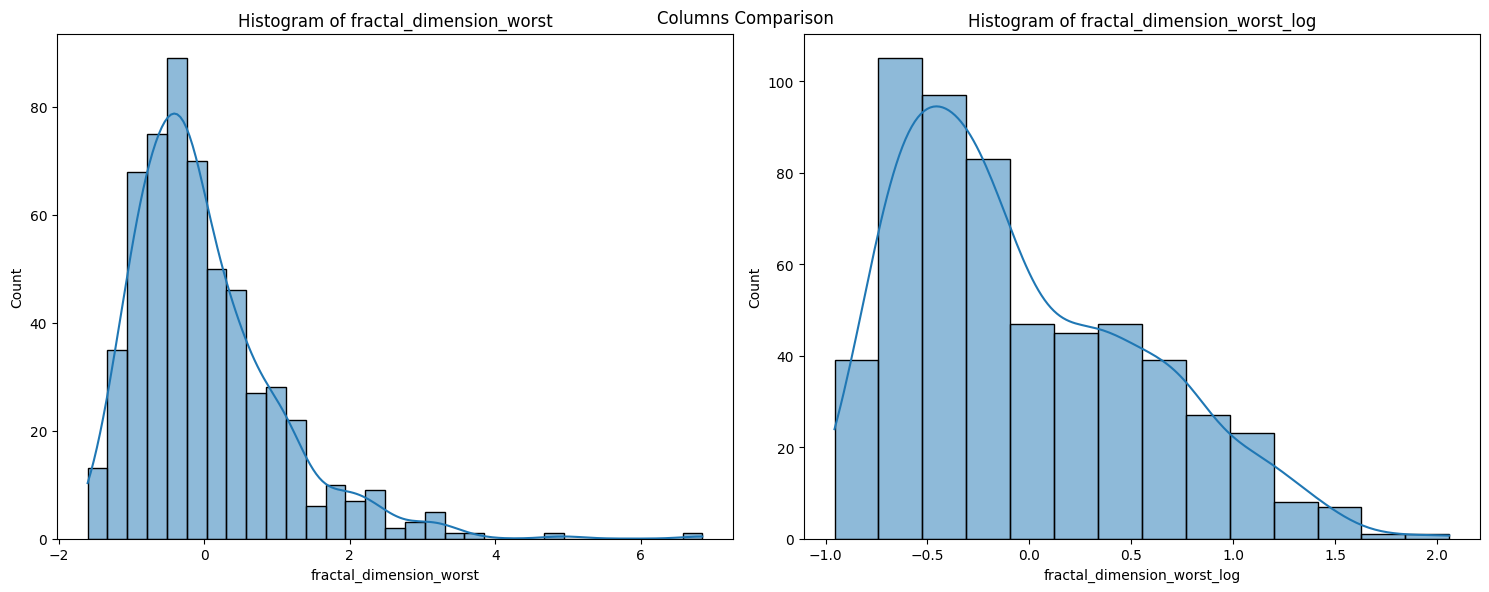

In [41]:
def compare_histograms(col_list1, col_list2, title):
    assert len(col_list1) == len(col_list2), "Length of col_list1 and col_list2 must be identical."

    num_cols = len(col_list1)

    for idx in range(num_cols):
        fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

        sns.histplot(df_transformed_clean[col_list1[idx]], kde=True, edgecolor="black", linewidth=1, ax=ax1).set_title(f"Histogram of {col_list1[idx]}")
        sns.histplot(df_transformed_clean[col_list2[idx]], kde=True, edgecolor="black", linewidth=1, ax=ax2).set_title(f"Histogram of {col_list2[idx]}")

        plt.tight_layout()
        plt.suptitle(title)
        
        plt.show()
        plt.close(fig)

column_list1 = ['texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'concave_points_mean', 'concavity_worst', 'concave_points_worst', 'radius_mean', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave_points_worst', 'radius_worst', 'texture_worst', 'fractal_dimension_worst']
column_list2 = ['texture_mean_sqrt', 'perimeter_mean_sqrt', 'area_mean_sqrt', 'concavity_mean_sqrt', 'concave_points_mean_sqrt', 'concavity_worst_sqrt', 'concave_points_worst_sqrt', 'radius_mean_log', 'perimeter_worst_log', 'area_worst_log', 'concavity_worst_log', 'concave_points_worst_log', 'radius_worst_log', 'texture_worst_log', 'fractal_dimension_worst_log']

compare_histograms(column_list1, column_list2, "Columns Comparison")

[]

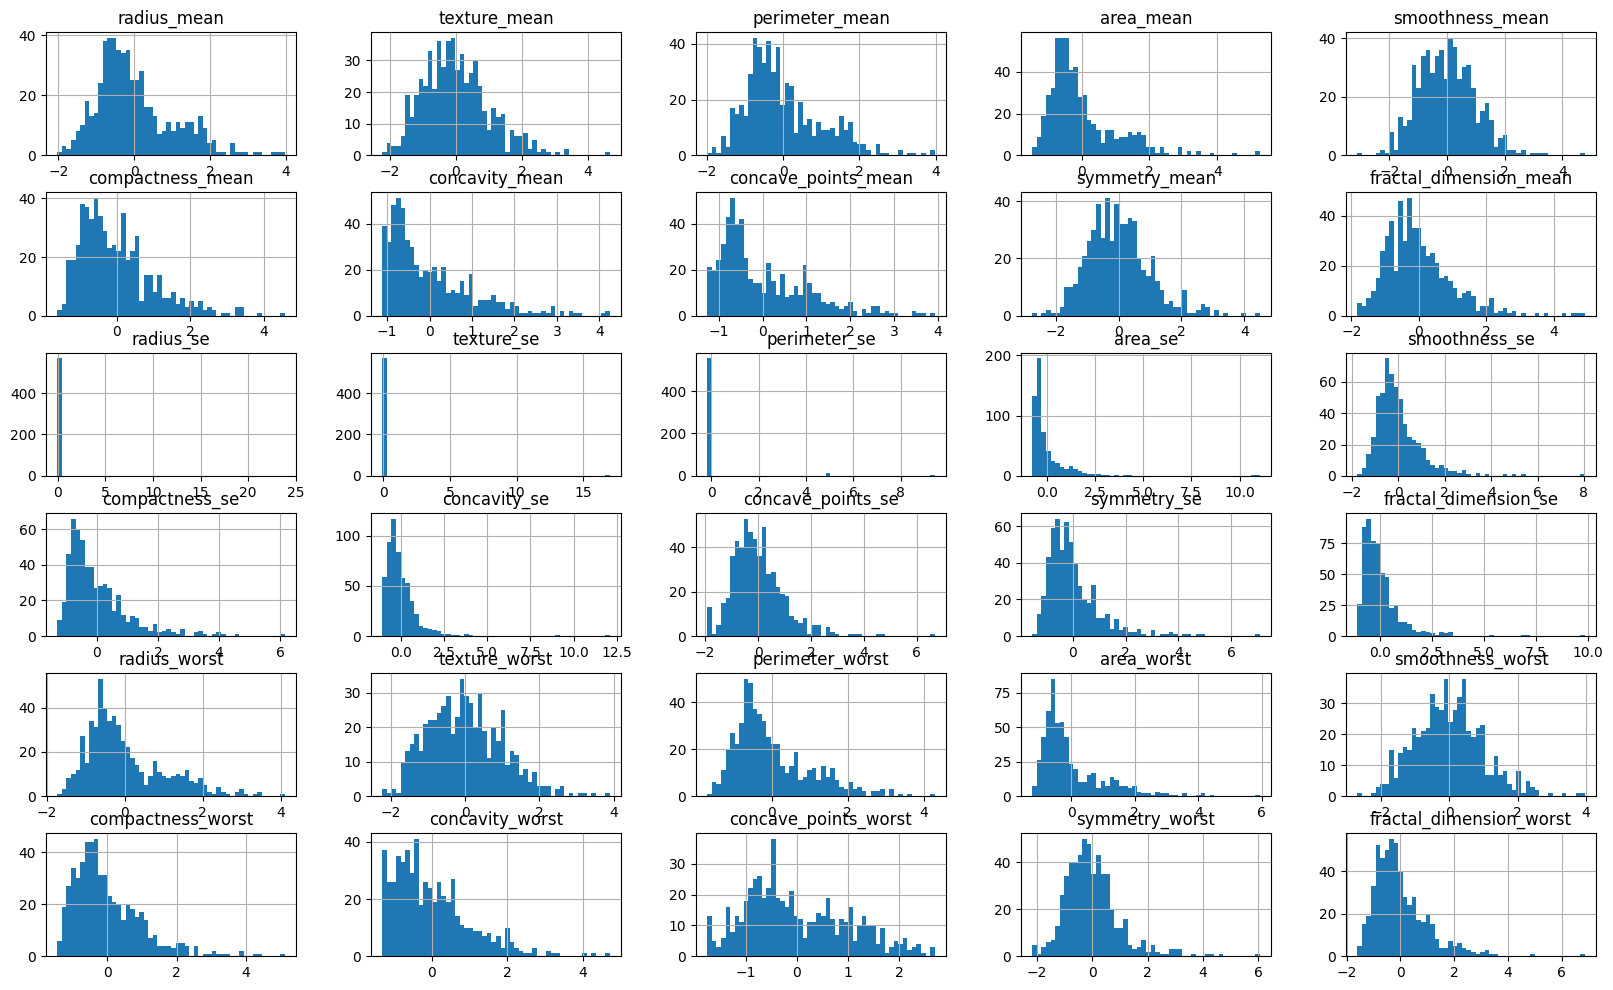

In [42]:
# Histograms of Standard Scaled Columns
df_std_scaled.hist(bins=50, figsize=(20, 12))
plt.plot()

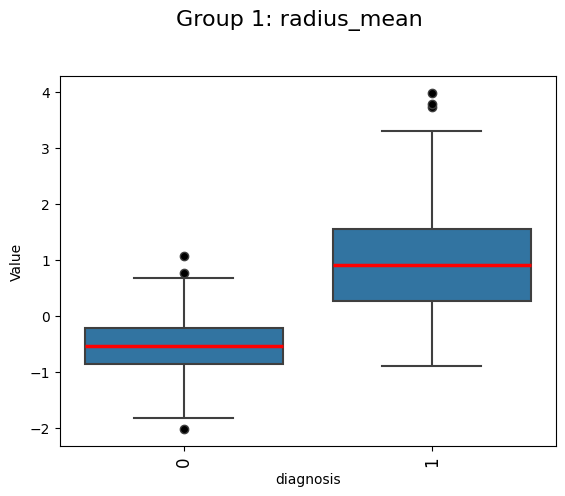

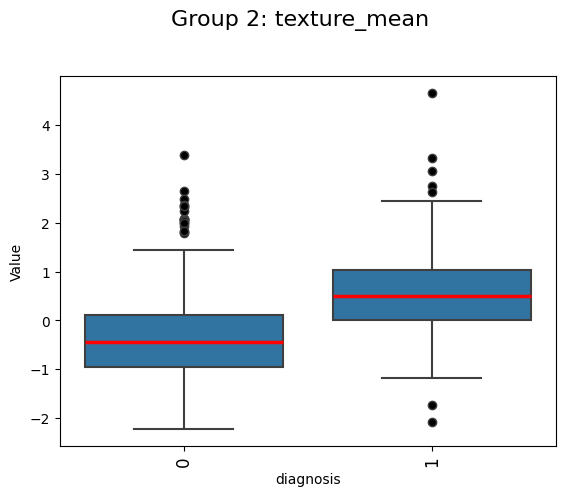

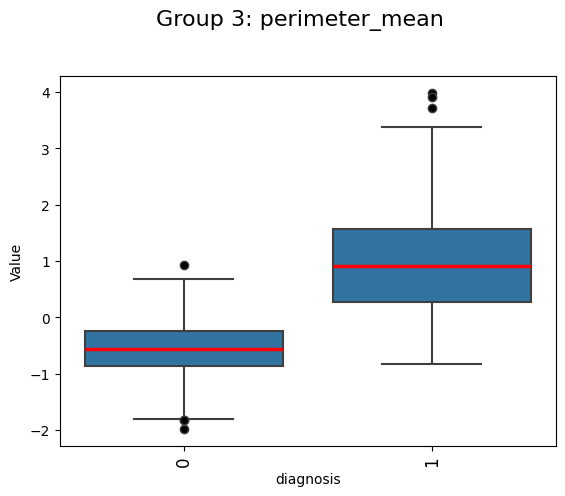

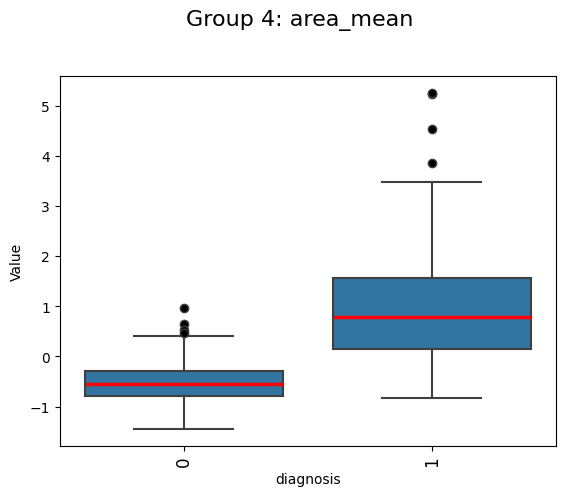

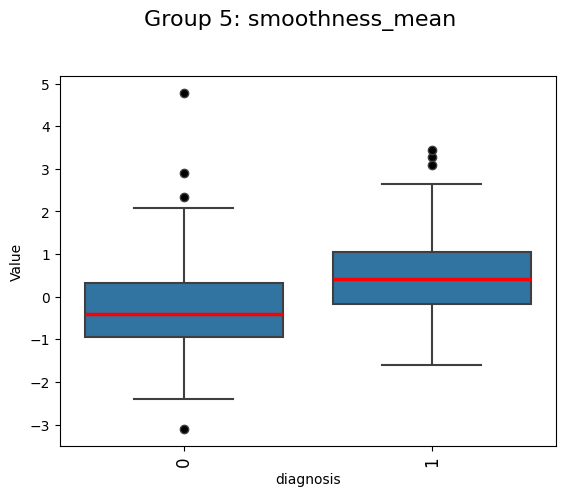

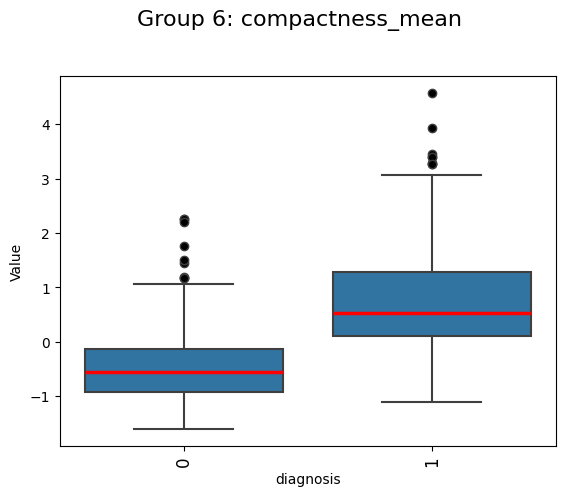

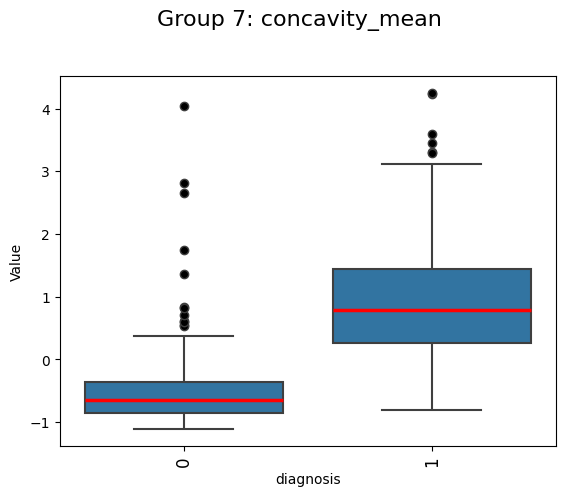

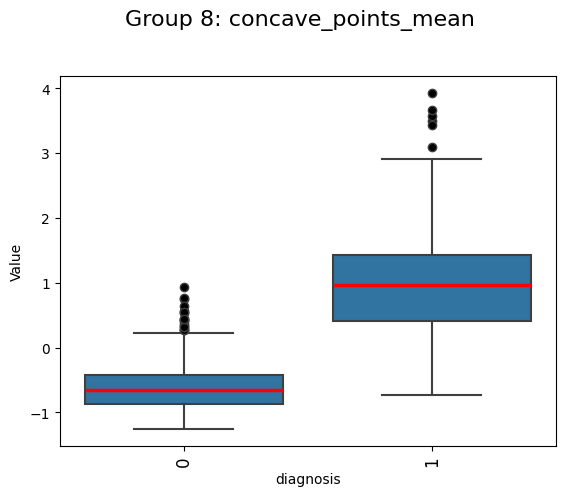

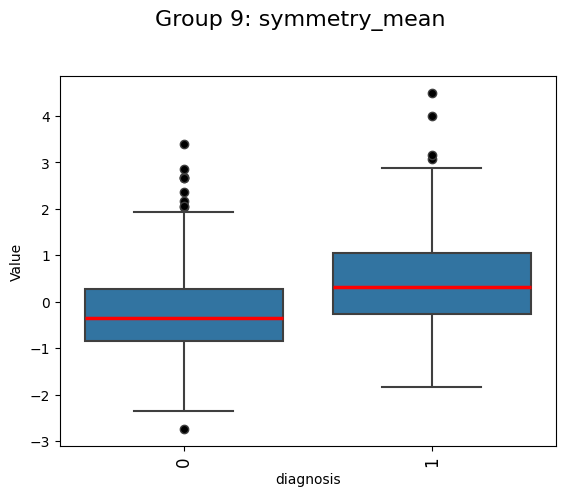

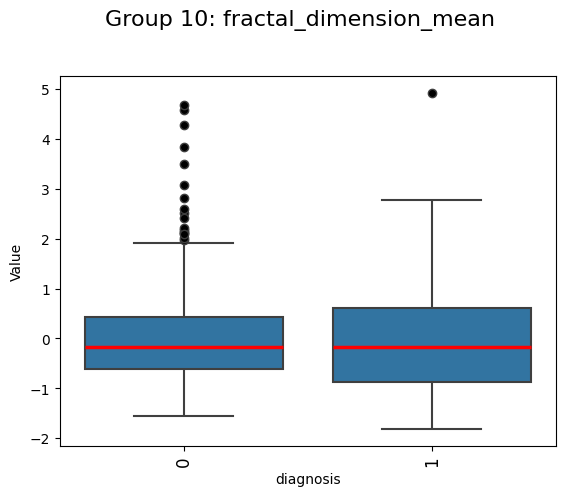

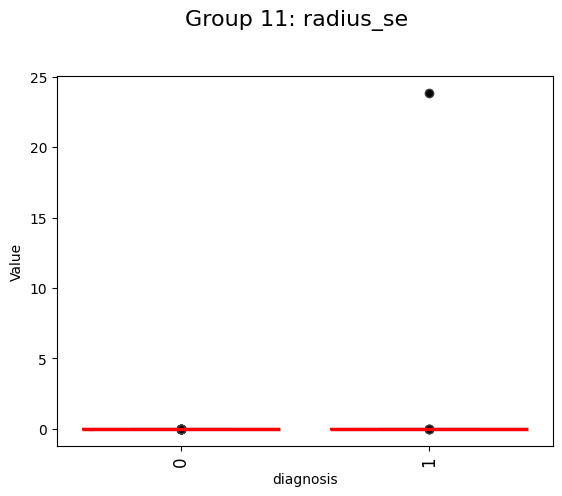

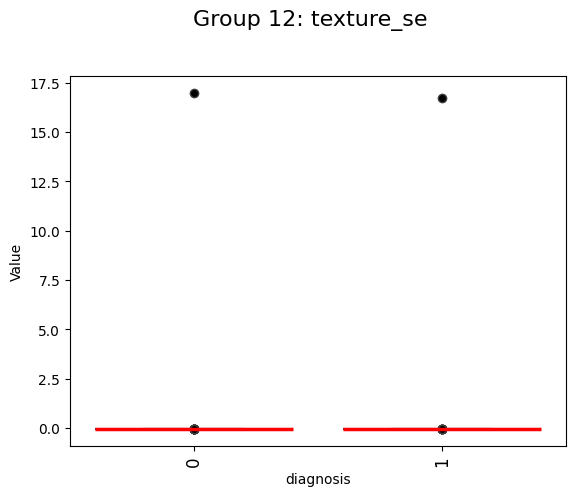

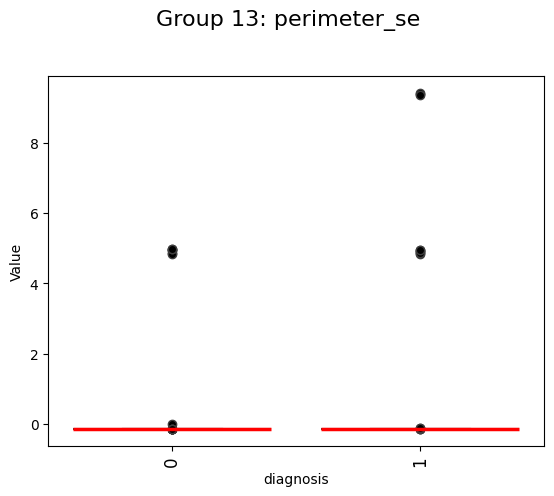

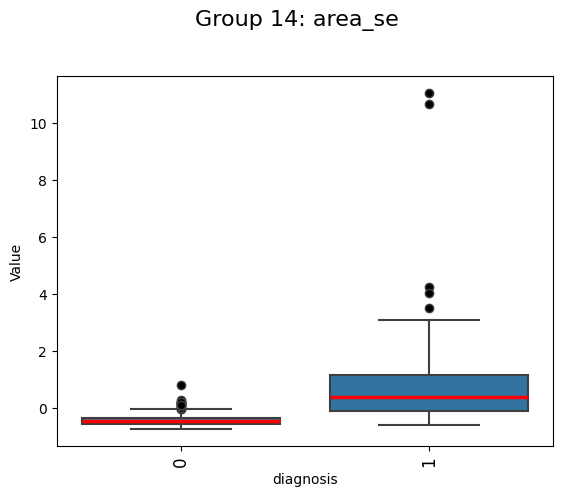

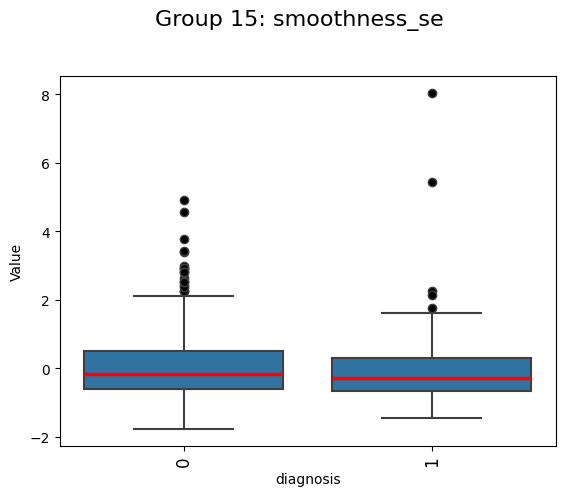

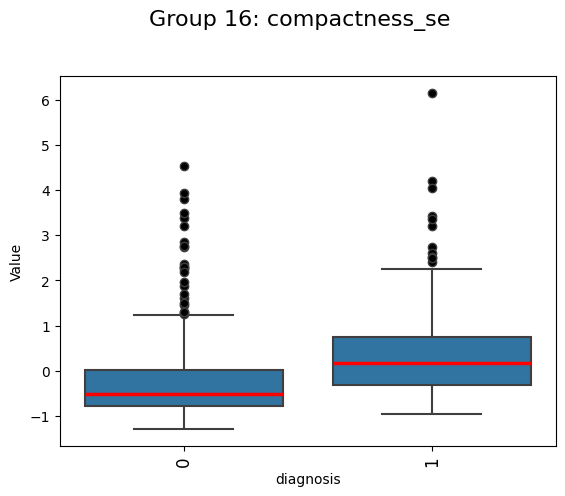

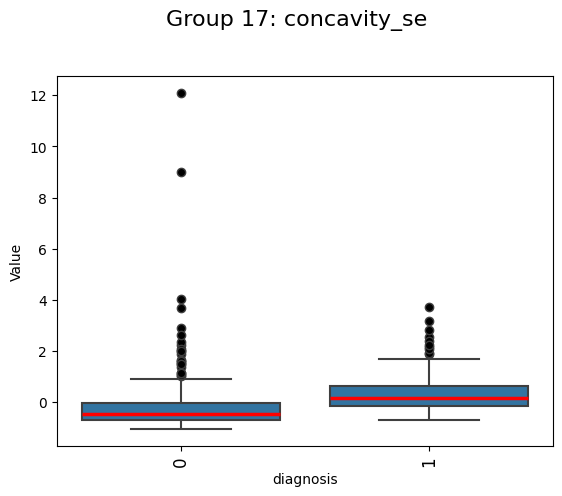

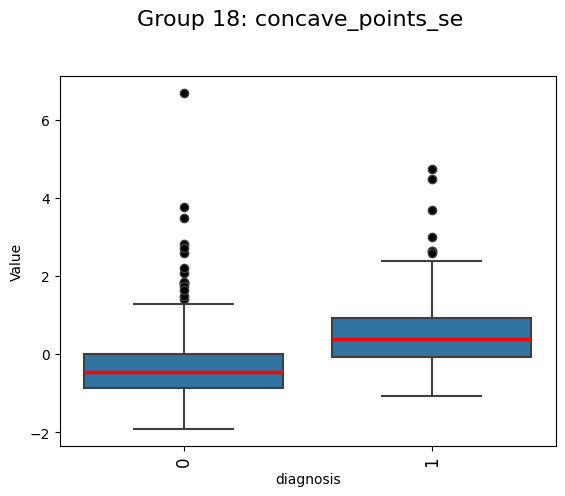

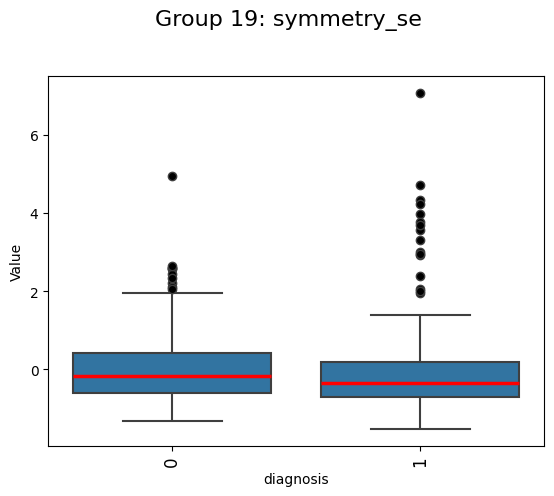

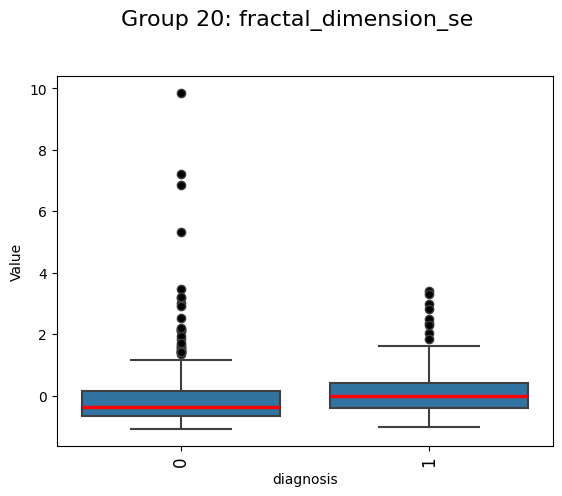

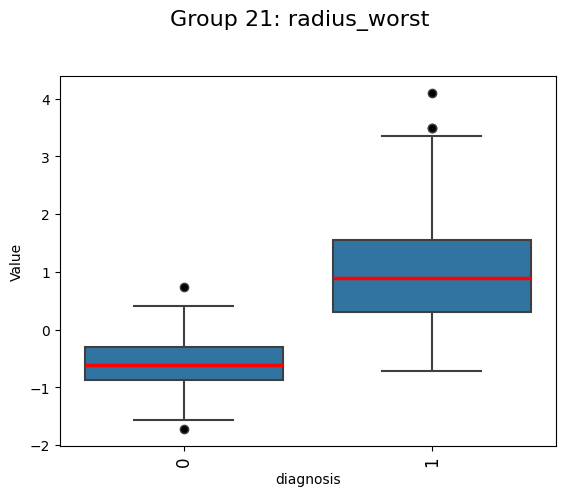

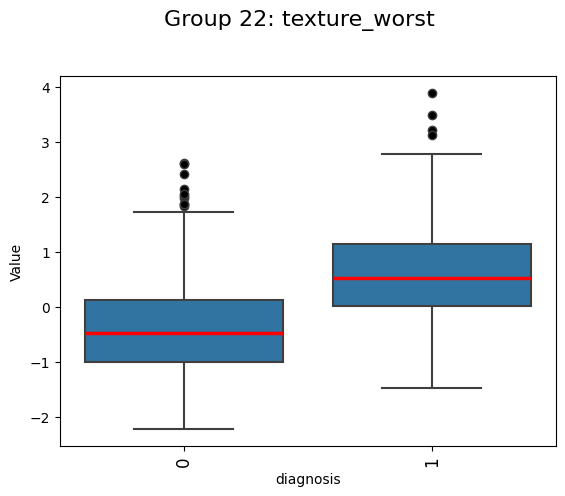

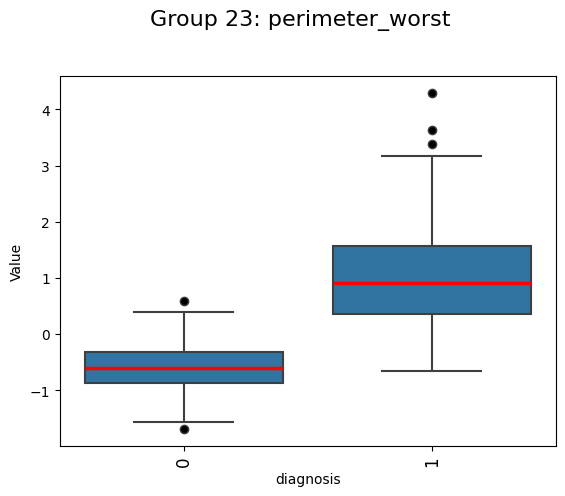

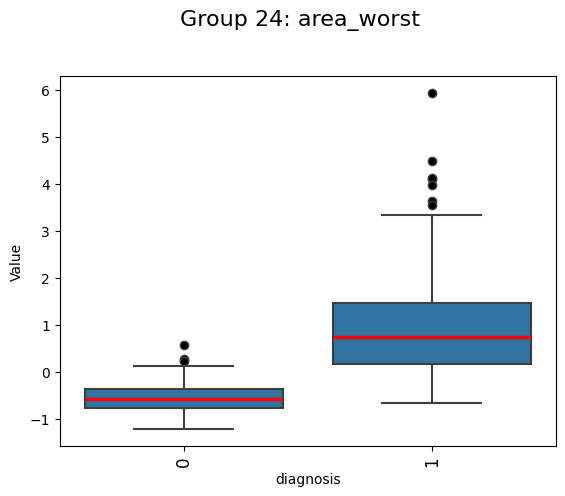

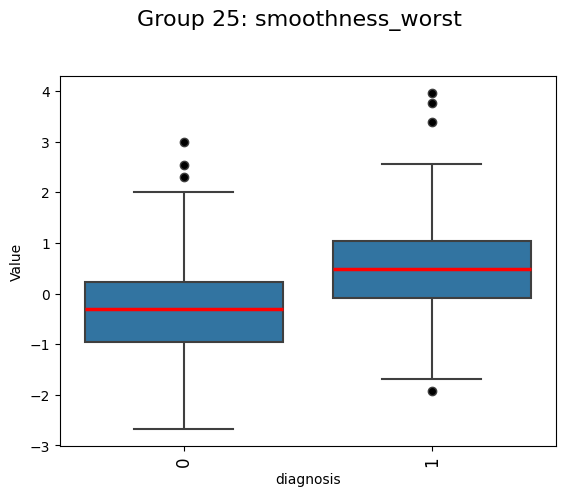

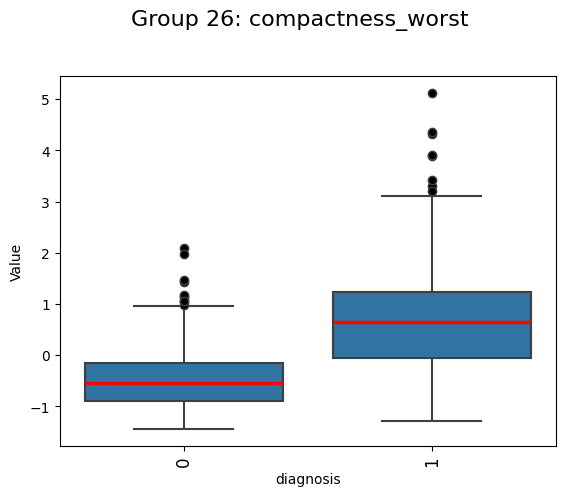

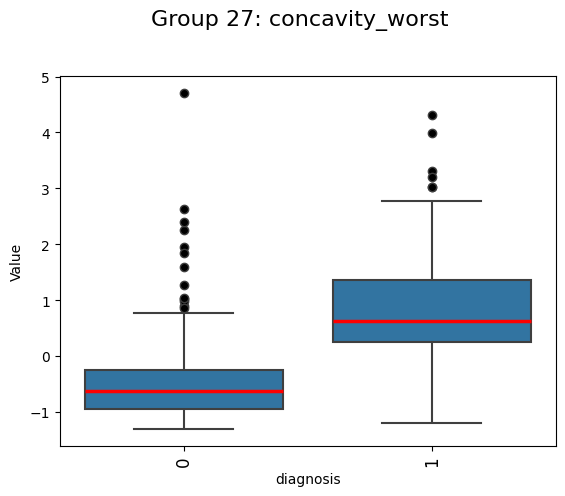

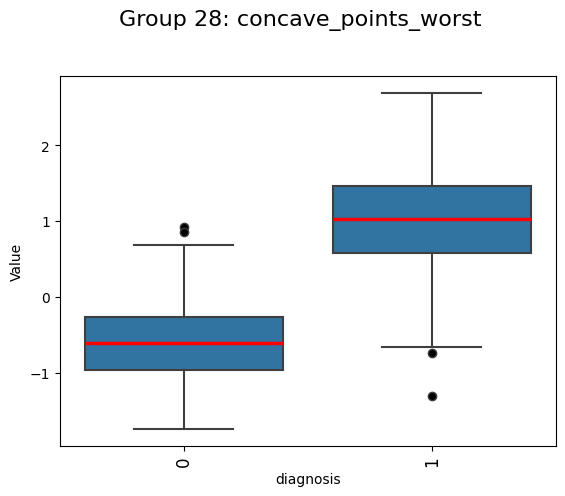

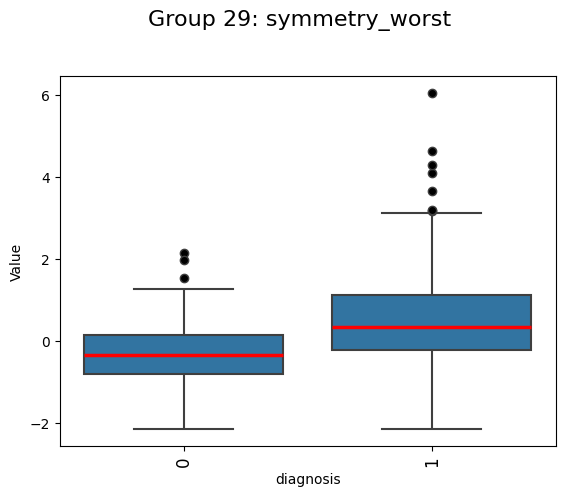

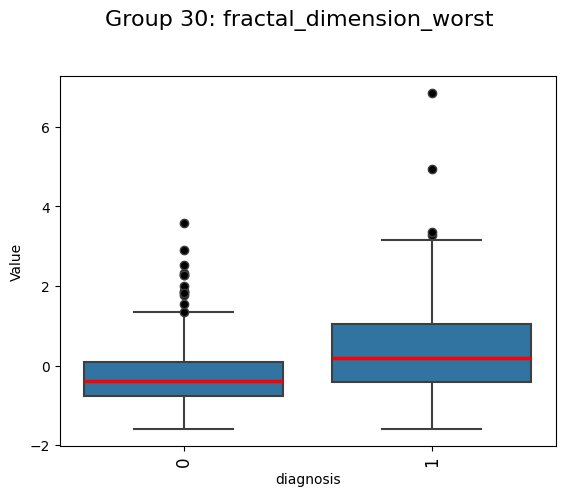

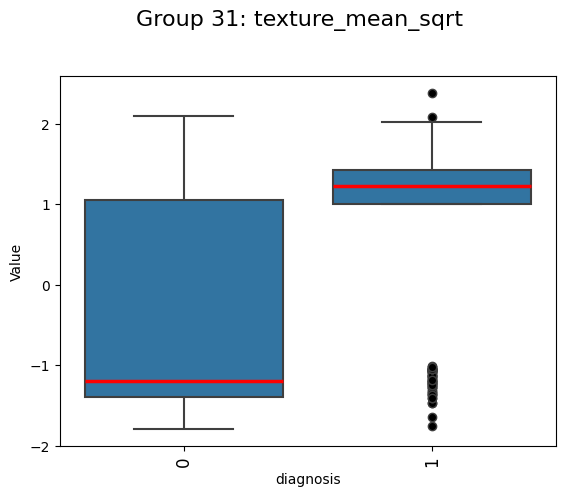

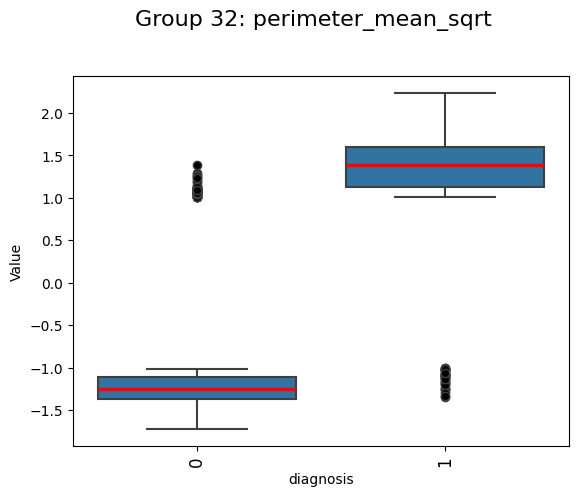

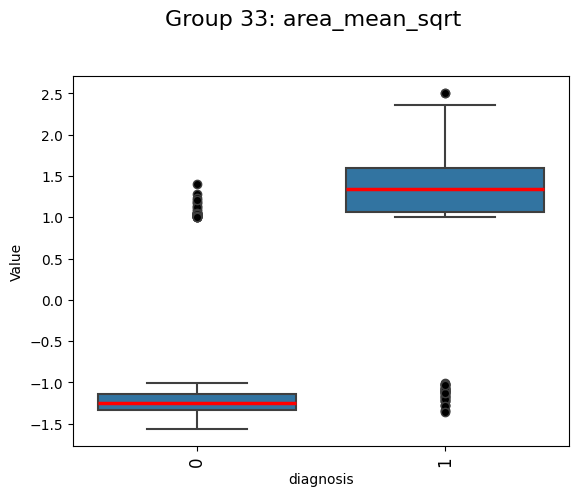

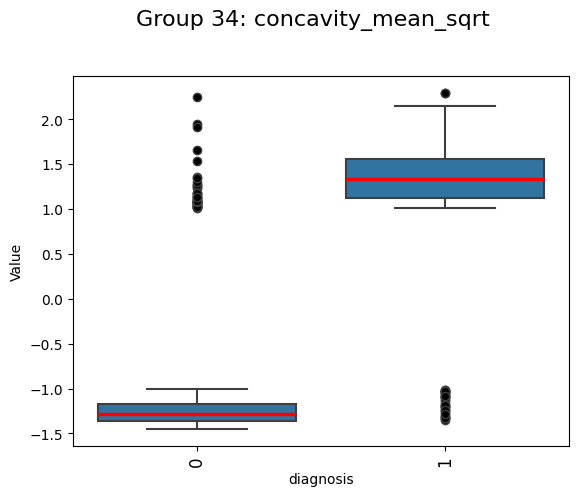

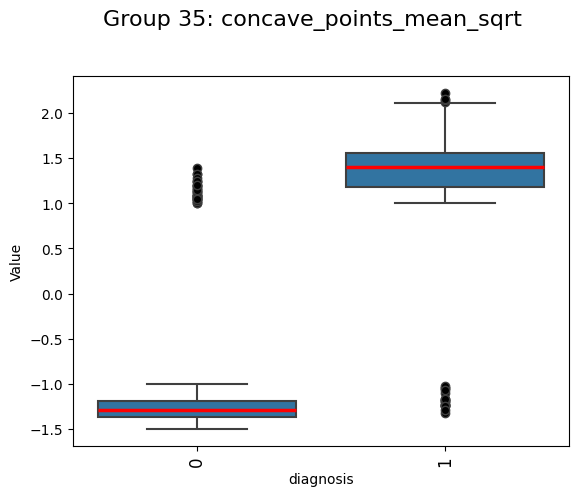

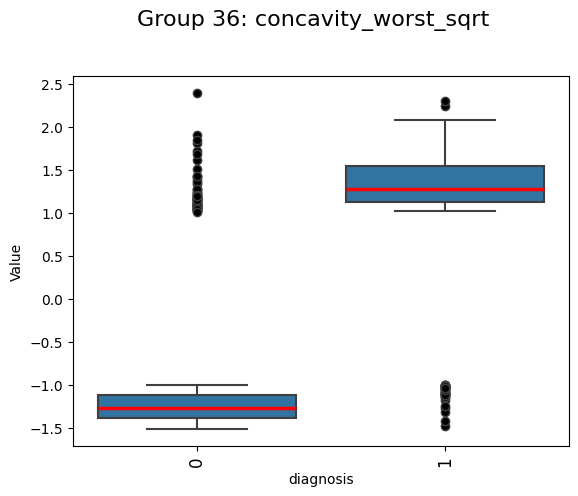

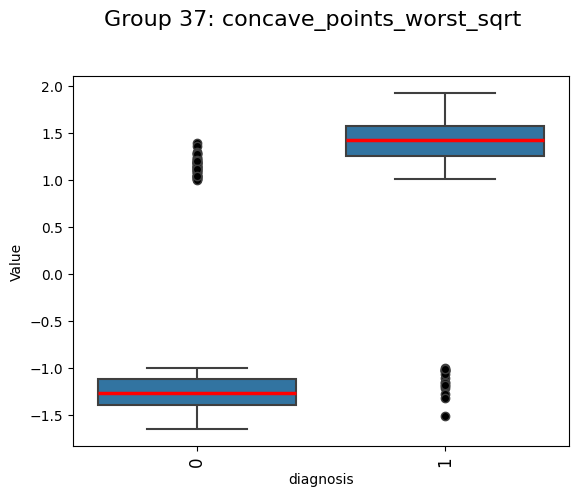

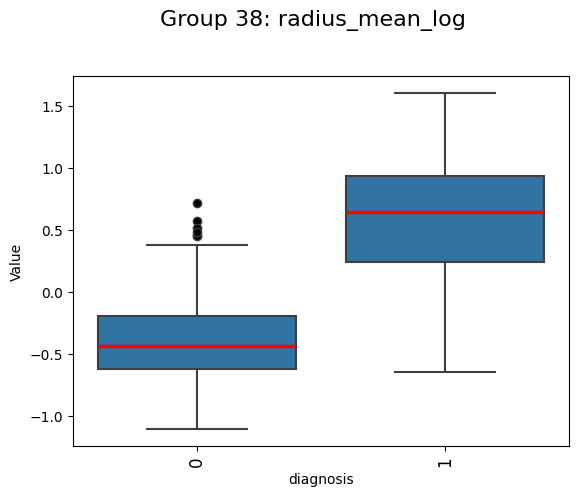

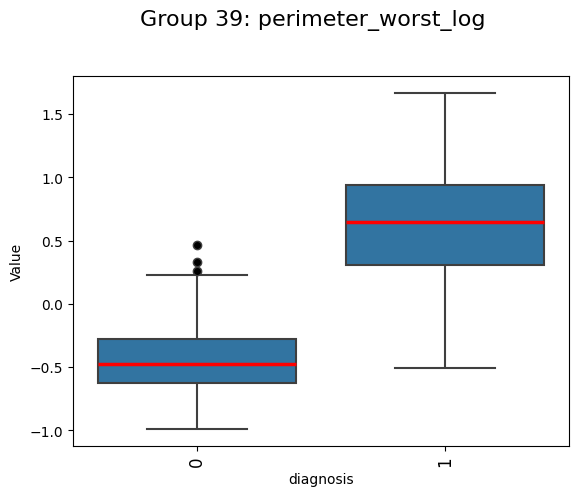

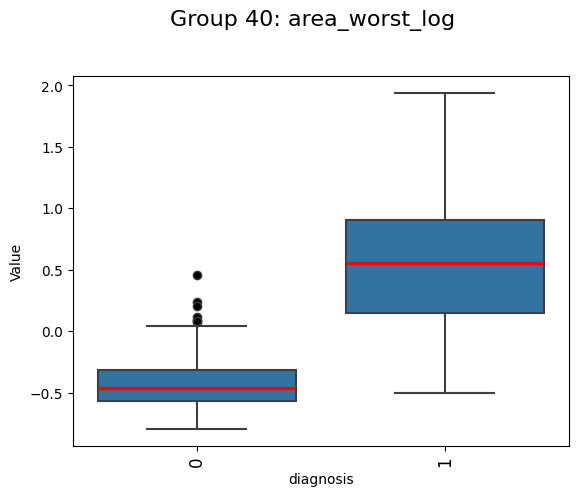

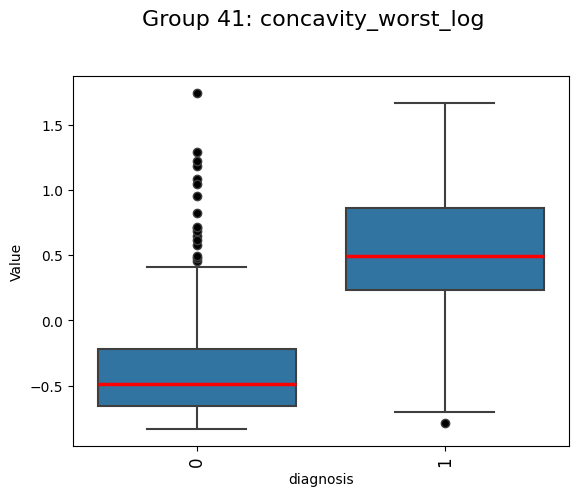

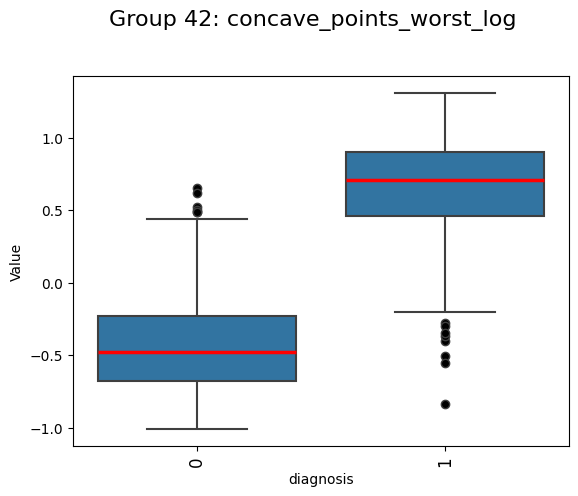

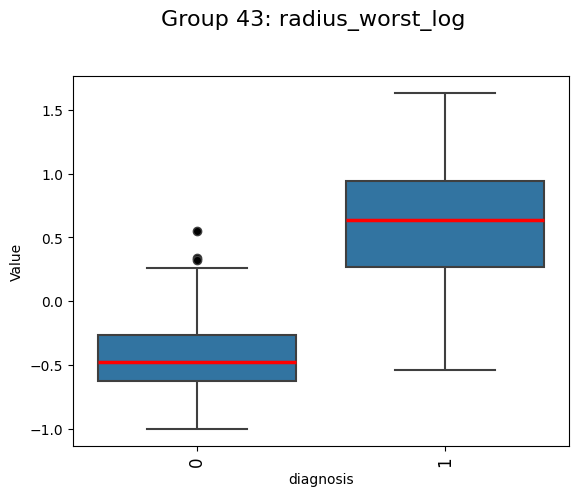

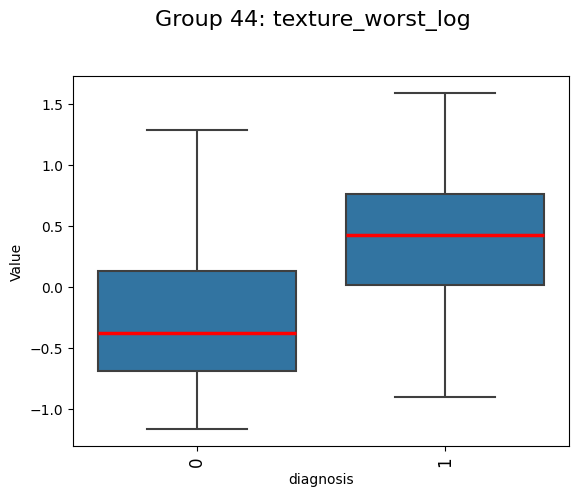

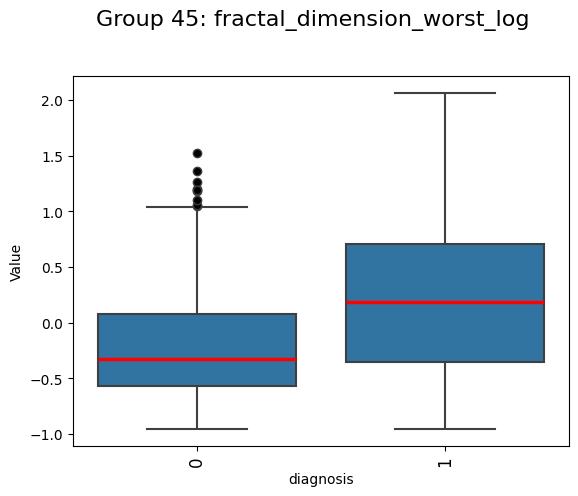

In [43]:
visuals = df_transformed_clean.iloc[:, :-1]

n_features_per_group = 1 

feature_groups = visuals.columns

for i, group in enumerate(feature_groups):
    sns.boxplot(x='diagnosis', y=group, data=df_transformed_clean, flierprops=dict(markerfacecolor='black'), linewidth=1.5, medianprops=dict(linewidth=2.5, color='red'))
    plt.xticks(rotation=90)
    plt.xticks(fontsize=12)
    plt.suptitle(f"Group {i + 1}: {group}", y=1.02, fontsize=16)
    plt.ylabel('Value')
    plt.show()

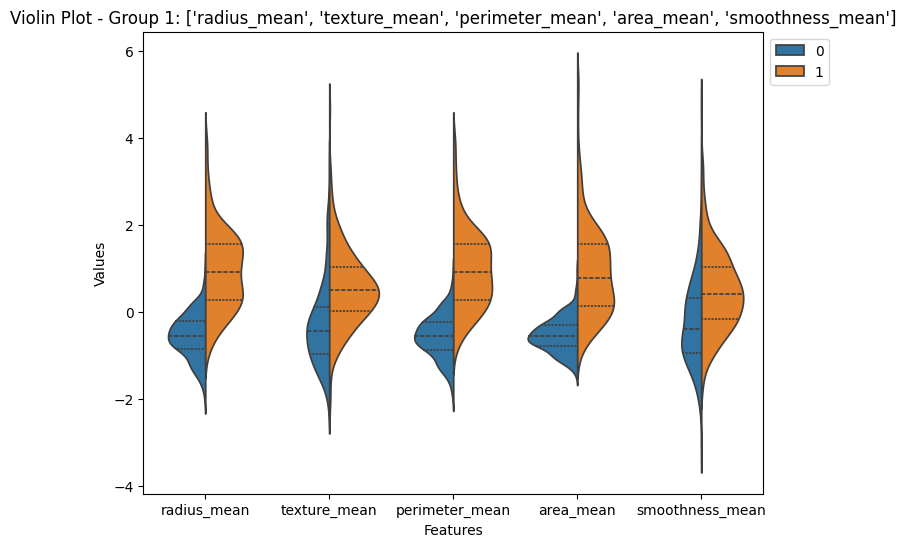

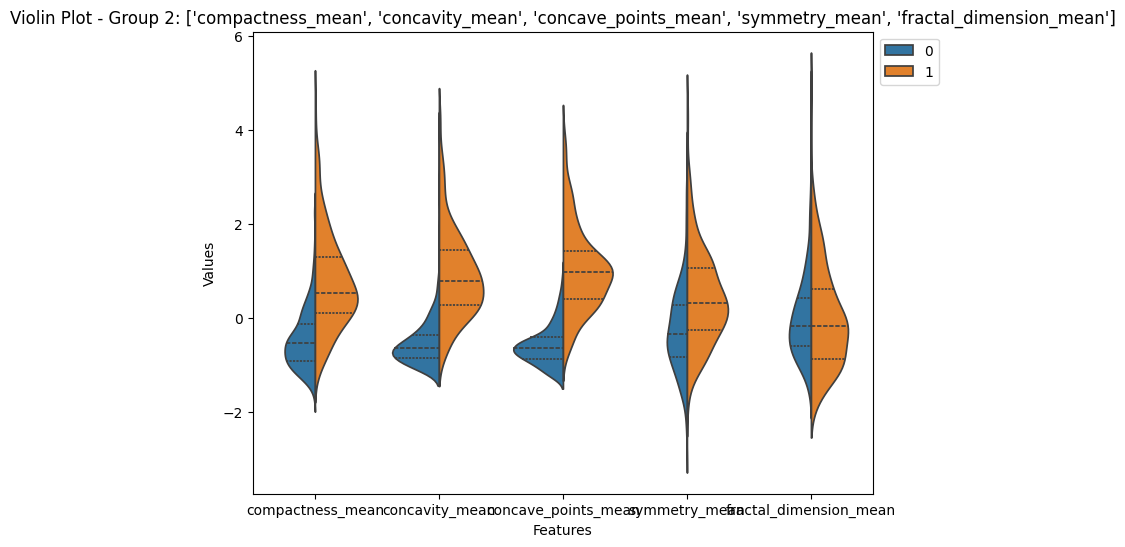

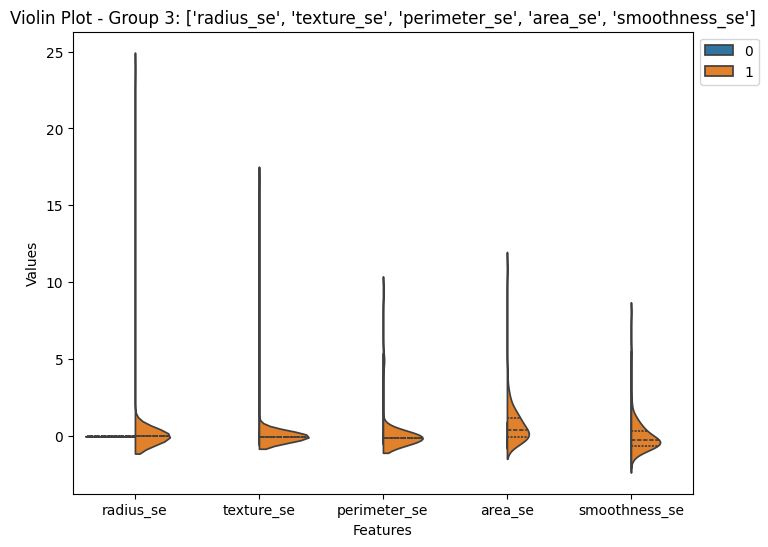

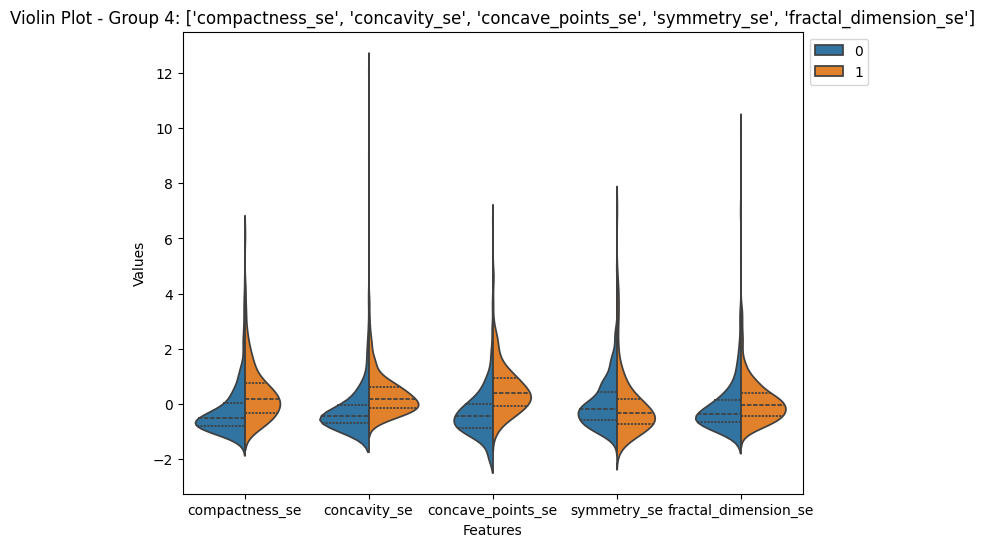

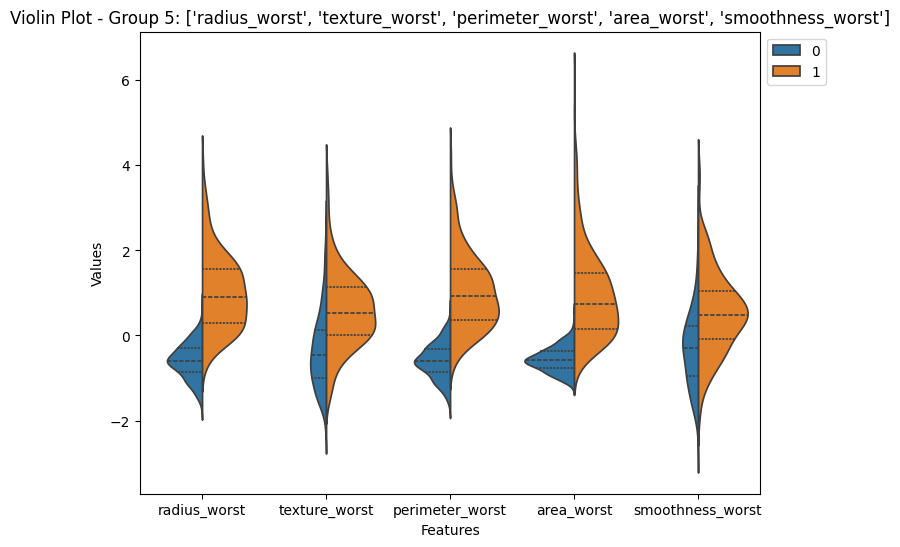

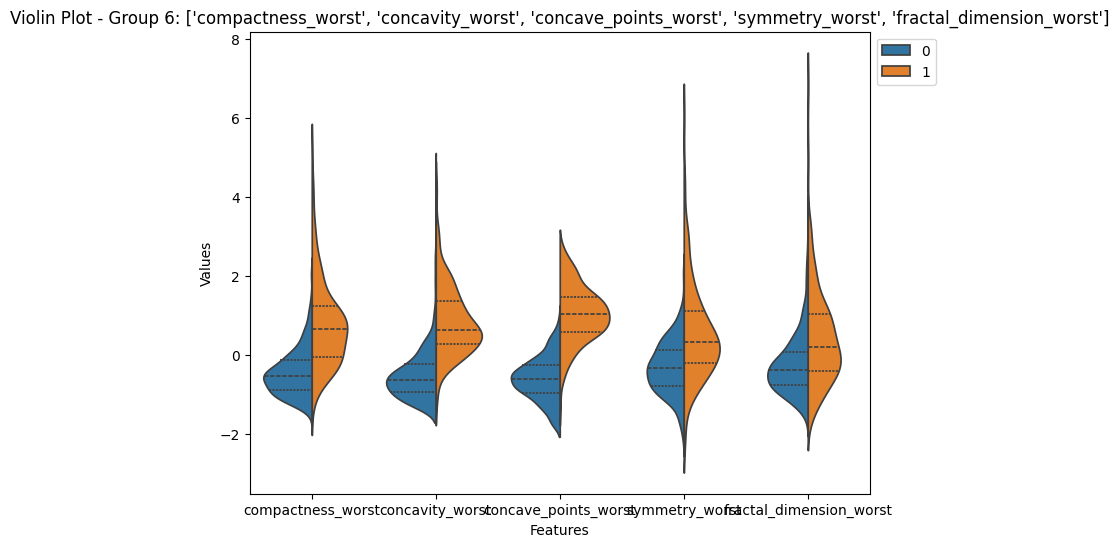

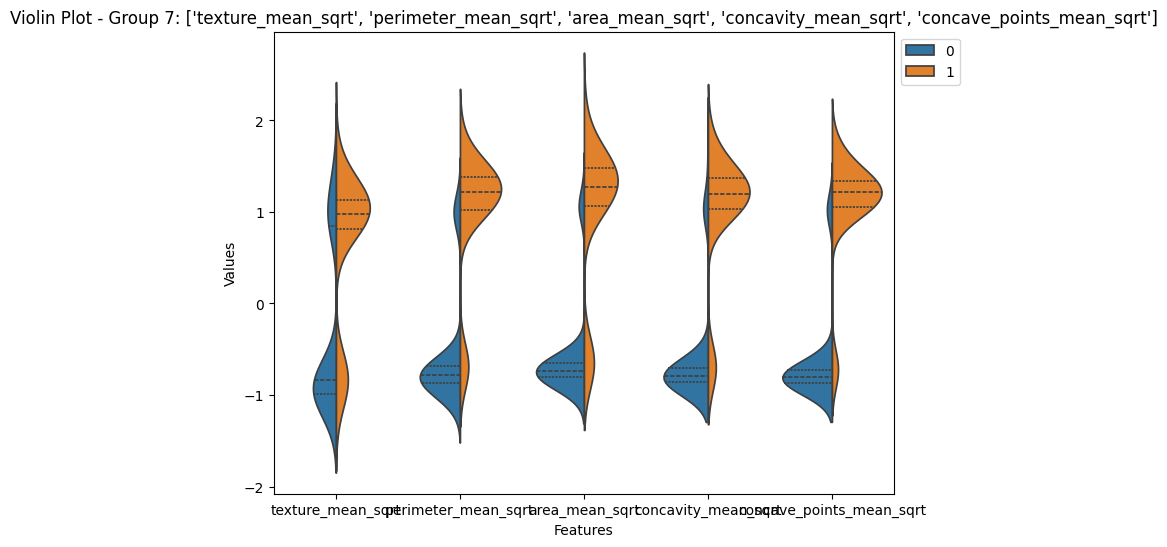

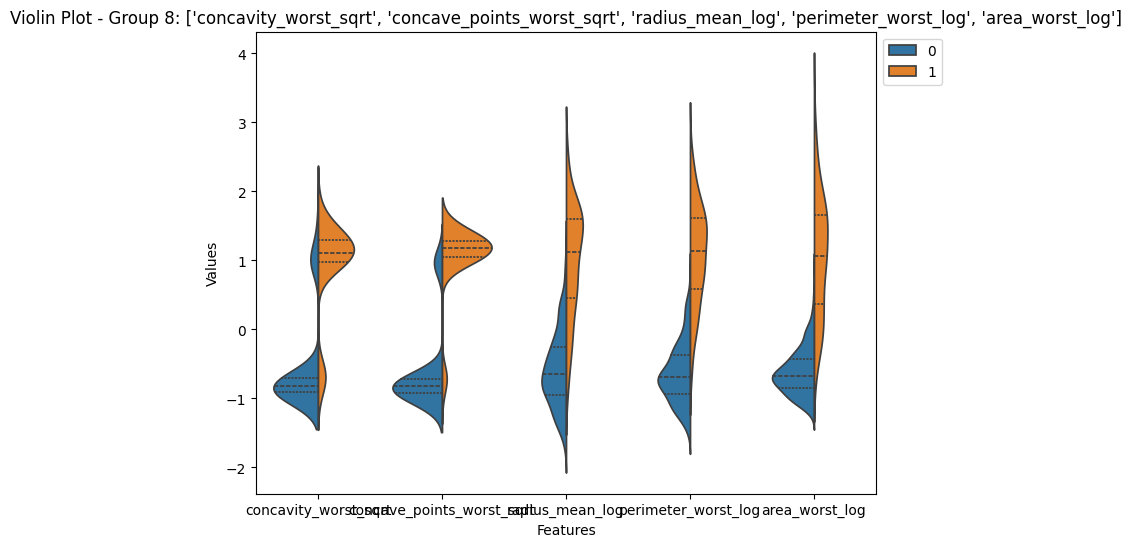

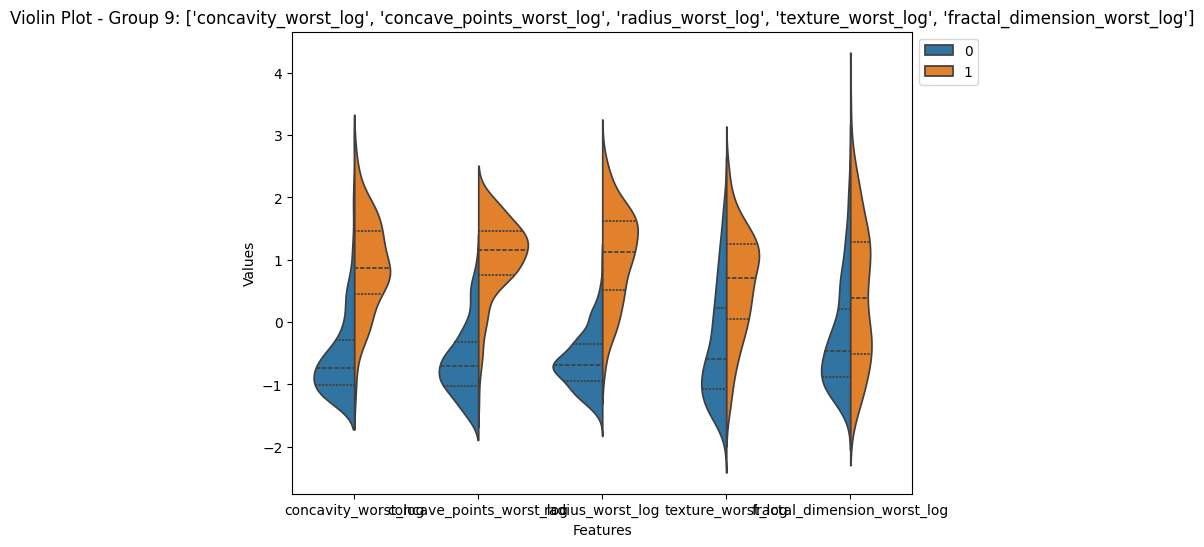

In [44]:
visuals_std = (visuals - visuals.mean()) / visuals.std()

processed_data = pd.concat([df_transformed_clean['diagnosis'], visuals_std], axis=1)

n_features_per_group = 5
n_groups = int((len(visuals.columns) - 1) / n_features_per_group) + 1
feature_lists = [visuals.columns[(i - 1) * n_features_per_group:i * n_features_per_group] for i in range(1, n_groups + 1)]

processed_datas = []
for feature_list in feature_lists:
    temp_df = processed_data[['diagnosis'] + list(feature_list)]
    processed_data_temp = pd.melt(temp_df, id_vars="diagnosis", var_name="features", value_name="value")
    processed_datas.append(processed_data_temp)
processed_data_stacked = pd.concat(processed_datas, ignore_index=True)

for i in range(len(feature_lists)):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x="features", y="value", hue="diagnosis", data=processed_data_stacked[processed_data_stacked['features'].isin(feature_lists[i])], split=True, inner="quartile")
    plt.title(f"Violin Plot - Group {i + 1}: {feature_lists[i].tolist()}")
    plt.xlabel("Features")
    plt.ylabel("Values")
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()
    

In [45]:
df_transformed.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'texture_mean_sqrt',
       'perimeter_mean_sqrt', 'area_mean_sqrt', 'concavity_mean_sqrt',
       'concave_points_mean_sqrt', 'concavity_worst_sqrt',
       'concave_points_worst_sqrt', 'radius_mean_log', 'perimeter_worst_log',
       'area_worst_log', 'concavity_worst_log', 'concave_points_worst_log',
       'radius_worst_log', 'texture_worst_log', 'fractal_dimension_worst_log'],
      d

In [46]:
df_transformed_clean

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269896   0.984437         1.568466   
1       1.829821     -0.353632        1.685917   1.908775        -0.826962   
2       1.579888      0.456187        1.566466   1.558949         0.942210   
3      -0.768909      0.253732       -0.592725  -0.764411         3.283553   
4       1.750297     -1.151816        1.776536   1.826296         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060748   2.343925         1.041842   
565     1.704854      2.085134        1.615894   1.723908         0.102458   
566     0.702284      2.045574        0.672638   0.578013        -0.840484   
567     1.838341      2.336457        1.982487   1.735284         1.525767   
568    -1.808401      1.221792       -1.814427  -1.347739        -3.112085   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0            3.283515        2.652874             2.528995       2.218209   
1           -0.487072       -0.023846             0.546826       0.001862   
2            1.052926        1.363478             2.034290       0.940249   
3            3.402909        1.915897             1.449404       2.868143   
4            0.539340        1.371011             1.426215      -0.009092   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.317714      -0.312151   
565         -0.017833        0.693043             1.261571      -0.217217   
566         -0.038680        0.046588             0.104941      -0.808730   
567          3.272144        3.296944             2.655247       2.137880   
568         -1.150752       -1.114873            -1.261165      -0.819684   

     fractal_dimension_mean  ...  concave_points_worst_sqrt  radius_mean_log  \
0                  2.255747  ...                   1.815551         0.740538   
1                 -0.868652  ...                   1.444722         1.040213   
2                 -0.398008  ...                   1.719054         0.947746   
3                  4.910919  ...                   1.782115        -0.570363   
4                 -0.562450  ...                   1.315064         1.011709   
..                      ...  ...                        ...              ...   
564               -0.931027  ...                   1.621510         1.134943   
565               -1.058611  ...                   1.316800         0.995048   
566               -0.895587  ...                   1.189202         0.531971   
567                1.043695  ...                   1.813873         1.043220   
568               -0.561032  ...                  -1.656789        -1.032615   

     perimeter_worst_log  area_worst_log  concavity_worst_log  \
0               1.195013        1.099013             1.134470   
1               0.930243        1.061415            -0.136931   
2               0.853340        0.898643             0.617871   
3              -0.223095       -0.438236             1.095136   
4               0.849527        0.797829             0.478207   
..                   ...             ...                  ...   
564             1.012532        1.103688             0.509532   
565             0.884569        0.914265             0.212344   
566             0.456792        0.356221             0.282745   
567             1.195013        0.975746             1.434514   
568            -0.889016       -0.730320            -0.835441   

     concave_points_worst_log  radius_worst_log  texture_worst_log  \
0                    1.192778          1.060155          -0.858362   
1                    0.735834          1.031778          -0.314229   
2                    1.083548          0.921071          -0.023692   
3                    1.155602         -0.247990           0.125737   
4                    0.547771          0.832332    

# Machine Learning

## Splitting the Data for Training and Testing

In [47]:
# 1- logging and warnings, optional
""" 
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
warnings.filterwarnings("ignore")
 """ 

In [48]:
# 2- feature selection, based on correlation
def select_features(X, threshold=0.9):
    """Selects features based on correlation threshold."""
    corr_matrix = X.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    X = X.drop(to_drop, axis=1, errors="ignore")

    print("Columns to drop: ", to_drop)
    print("X shape after dropping columns: ", X.shape)
    return X, to_drop

In [49]:
# 3- modular , centralised data splitting
def split_data(X, y, test_size=0.2, val_size=0.2, random_state=42):
    """Splits data into training, validation, and test sets."""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size/(1-test_size), random_state=random_state, stratify=y_train)

    print("Train set length: ", len(X_train))
    print("Validation set length: ", len(X_val))
    print("Test set length: ", len(X_test))
    return X_train, X_val, X_test, y_train, y_val, y_test

In [50]:
# 4- Define Models & HyperParameter Grids - Centralised
def define_models():
    """Defines models without hyperparameter grids."""
    models = {
        "logistic_regression": LogisticRegression(random_state=42, max_iter=5000, tol=0.0001),
        "random_forest": RandomForestClassifier(random_state=42),
        "lightgbm": lgb.LGBMClassifier(objective="binary", random_state=42, verbose=-1),
        "naive_bayes": GaussianNB()
    }
    return models

In [51]:
# 5- Definition of Scoring Metrics - Centralised
def define_scoring_metrics():
    """Defines scoring metrics."""
    scoring_metrics = {
        "accuracy": make_scorer(accuracy_score),
        "f1": make_scorer(f1_score),
        "roc_auc": make_scorer(roc_auc_score, needs_proba=True),
        "neg_brier_score": make_scorer(brier_score_loss, greater_is_better=False, needs_proba=True),
        "precision": make_scorer(precision_score),
        "recall": make_scorer(recall_score)
    }
    return scoring_metrics

In [52]:
# 6- Evaluating Models - Initialis
def get_prediction_method(model):
    """Selects the appropriate prediction method based on the model."""
    if hasattr(model, "predict_proba"):
        return "predict_proba"
    else:
        return "predict"

In [53]:
# 7- Generic Evaluation Function
def evaluate_model_with_metrics(model, X_test, y_test, model_name, scoring_metrics):
    """
    Evaluates the model on the test set using the defined scoring metrics.
    """
    scores = {}

    try:
        prediction_method = get_prediction_method(model)
        y_pred_proba = None  # Initialize y_pred_proba

        if prediction_method == "predict_proba":
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            y_pred_class = (y_pred_proba > 0.5).astype(int)
        else:
            y_pred_class = model.predict(X_test)

        cm = confusion_matrix(y_test, y_pred_class)
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        npv = tn / (tn + fn) if (tn + fn) > 0 else 0

        accuracy = accuracy_score(y_test, y_pred_class)
        precision = precision_score(y_test, y_pred_class)
        recall = recall_score(y_test, y_pred_class)
        f1 = f1_score(y_test, y_pred_class)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan
        brier_score = brier_score_loss(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        scores = {
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "roc_auc": roc_auc,
            "specificity": specificity,
            "npv": npv,
            "neg_brier_score": -brier_score if y_pred_proba is not None else np.nan
        }

        print(f"\n{model_name} Results:")
        for metric, value in scores.items():
            print(f"{metric.capitalize()}: {value:.4f}")

    except Exception as e:
        print(f"Error during prediction for {model_name}: {e}")
        return None, scores

    return y_pred_class, scores

In [54]:
# 8- Evaluate Model - Initialis
def evaluate_initial_model(model, X_train, y_train, X_test, y_test, model_name, scoring_metrics):
    """Evaluates the initial (untuned) model on the test set."""
    print(f"\n--- Evaluating Initial {model_name} on Test Set ---")
    model.fit(X_train, y_train)
    y_pred, initial_scores = evaluate_model_with_metrics(model, X_test, y_test, model_name, scoring_metrics)
    return y_pred, initial_scores

In [ ]:
# 9- Train & Evaluate Model - Generalised
def train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name, scoring_metrics, n_splits=3):
    """Trains and evaluates a model using GridSearchCV and identifies best hyperparameters.

    Args:
        model: The model instance.
        X_train: The training feature matrix.
        y_train: The training target vector.
        X_val: The validation feature matrix.
        y_val: The validation target vector.
        model_name: A string representing the model's name.
        scoring_metrics: Dictionary of scoring metrics.
        n_splits: The number of splits for StratifiedKFold.

    Returns:
        The best fitted model.
    """

    param_grid = {}
    if model_name == "logistic_regression":
        param_grid = {
            "C": [0.0001, 0.001, 0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear", "saga"],
            "max_iter": [3000, 5000],
            "tol": [1e-4, 1e-3]
        }
    elif model_name == "random_forest":
        param_grid = {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 5, 10],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 5],
            "max_features": ["sqrt"]
        }
    elif model_name == "lightgbm":
        param_grid = {
            "num_leaves": [20, 30, 40],
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [100, 200, 300],
            "reg_alpha": [0, 0.1, 1],
            "reg_lambda": [0, 0.1, 1]
        }
    elif model_name == "naive_bayes":
        param_grid = {'var_smoothing': [1e-9, 1e-5, 1e-3, 1e-1]}
    else:
        pass

    grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=n_splits, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    return best_model

In [65]:
# 10- Evaluate Model -Post-Hyperparameter Optimization
def evaluate_optimized_model(model, X_test, y_test, model_name, scoring_metrics):
    """Evaluates the optimized model using the generic evaluation function."""
    print(f"\n--- Evaluating Optimized {model_name} on Test Set ---")
    y_pred, optimized_scores = evaluate_model_with_metrics(model, X_test, y_test, model_name, scoring_metrics)
    return y_pred, optimized_scores

In [66]:
# 11- Confusion Matrices & Extra Metrics -Generalised
def plot_confusion_matrix(y_test, y_pred, model_name, classes=["Malignant", "Benign"]):
    """Plots the confusion matrix and calculates additional metrics."""
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    TN, FP, FN, TP = cm.flatten()

    sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    positive_predictive_value = TP / (TP + FP) if (TP + FP) > 0 else 0
    negative_predictive_value = TN / (TN + FN) if (TN + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)

    print(f"Sensitivity: {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Positive Predictive Value: {positive_predictive_value:.4f}")
    print(f"Negative Predictive Value: {negative_predictive_value:.4f}")
    print(f"Accuracy: {accuracy:.4f}")

In [67]:
# 12- Performance Visualisations -Generalised
def visualize_performance(model, X_test, y_test, model_name):
    """Generates performance visualizations."""
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"Receiver operating characteristic - {model_name}")
    plt.legend(loc="lower right")
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(recall, precision, color="darkblue", lw=2, label=f"Precision-Recall curve (area = {pr_auc:.2f})")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall vs. Recall - {model_name}")
    plt.legend(loc="best")
    plt.grid()
    plt.show()

In [68]:
# 12.5 Plot Learning Curve
def plot_learning_curve(estimator, X, y, model_name, cv=5, scoring='accuracy'):
    """Plots a learning curve for each model."""
    logging.info(f"Generating learning curve for {model_name}...")
    train_sizes, train_scores, val_scores = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 5)
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label="Training score")
    plt.plot(train_sizes, val_mean, label="Cross-validation score")
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1)
    plt.title(f"Learning Curve - {model_name}")
    plt.xlabel("Training Set Size")
    plt.ylabel(scoring)
    plt.legend(loc="best")
    plt.close()

In [69]:
# 13. Model Comparison Visualizations
def visualize_model_comparison(model_results, y_test):
    """
    Generates visualizations comparing model performances:
    - Heatmap of metrics across models
    - Stacked bar chart of metrics across models
    - Stacked bar chart of TP, TN, FP, FN counts
    - Bar chart of metric improvement post hyperparameter tuning
    """
    metrics_list = ["accuracy", "precision", "recall", "f1", "roc_auc", "specificity", "npv"]
    model_names = list(model_results.keys())

    data_vis = []

    for model_name, results in model_results.items():
        initial_metrics = results["initial"]
        optimized_metrics = results["optimized"]

        initial_metrics = {metric: initial_metrics.get(metric, np.nan) for metric in metrics_list}
        optimized_metrics = {metric: optimized_metrics.get(metric, np.nan) for metric in metrics_list}

        data_vis.append(
            [
                model_name,
                "Initial",
                initial_metrics["accuracy"],
                initial_metrics["precision"],
                initial_metrics["recall"],
                initial_metrics["f1"],
                initial_metrics["roc_auc"],
                initial_metrics["specificity"],
                initial_metrics["npv"],
            ]
        )
        data_vis.append(
            [
                model_name,
                "Optimized",
                optimized_metrics["accuracy"],
                optimized_metrics["precision"],
                optimized_metrics["recall"],
                optimized_metrics["f1"],
                optimized_metrics["roc_auc"],
                optimized_metrics["specificity"],
                optimized_metrics["npv"],
            ]
        )

    df_visual = pd.DataFrame(
        data_vis,
        columns=[
            "Model",
            "State",
            "Accuracy",
            "Precision",
            "Recall",
            "F1 Score",
            "ROC AUC",
            "Specificity",
            "NPV",
        ],
    )
    df_melted = df_visual.melt(
        id_vars=["Model", "State"], var_name="Metric", value_name="Value"
    )

    print("DataFrame before pivoting:\n", df_melted)
    plt.figure(figsize=(14, 8))
    sns.heatmap(
        df_melted.pivot_table(
            index=["Model", "State"], columns="Metric", values="Value"
        ),
        annot=True,
        cmap="viridis",
        fmt=".3f",
        linewidths=0.5,
        linecolor="black",
        cbar_kws={'label': 'Metric Value'}
    )
    plt.title("Model Performance Comparison (Initial vs. Optimized)")
    plt.ylabel("(Model, State)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    n_models = len(model_names)
    width = 0.7

    x = np.arange(n_models)
    fig, ax = plt.subplots(figsize=(14, 8))

    initial_data = {metric: [model_results[model]["initial"].get(metric, 0) for model in model_names] for metric in metrics_list}
    optimized_data = {metric: [model_results[model]["optimized"].get(metric, 0) for model in model_names] for metric in metrics_list}

    bottom = np.zeros(n_models)
    for metric in metrics_list:
        ax.bar(x, initial_data[metric], width, label=f'{metric} (Initial)', bottom=bottom)
        ax.bar(x, optimized_data[metric], width, label=f'{metric} (Optimized)', bottom=bottom)
        bottom += np.array(optimized_data[metric])  # Update bottom for next stacked bar

    ax.set_ylabel('Scores')
    ax.set_title('Model Performance Comparison by Metric (Stacked)')
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    ax.legend()
    fig.tight_layout()
    plt.show()

    TP_counts = []
    TN_counts = []
    FP_counts = []
    FN_counts = []

    for model_name in model_names:
        y_pred_optimized = model_results[model_name]["optimized_predictions"]
        cm = confusion_matrix(y_test, y_pred_optimized)
        TN, FP, FN, TP = cm.ravel()
        TP_counts.append(TP)
        TN_counts.append(TN)
        FP_counts.append(FP)
        FN_counts.append(FN)

    # Create DataFrame for plotting
    df_visual = pd.DataFrame({
        'Model': model_names,
        'TP': TP_counts,
        'TN': TN_counts,
        'FP': FP_counts,
        'FN': FN_counts
    })

    df_visual.set_index('Model').plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Confusion Matrix Counts by Model (Stacked)')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    improvement_data = {}
    for metric in metrics_list:
        improvement_data[metric] = [model_results[model]["optimized"].get(metric, 0) - model_results[model]["initial"].get(metric, 0) for model in model_names]

    df_improvement = pd.DataFrame(improvement_data, index=model_names)
    df_improvement.plot(kind='bar', figsize=(12, 6))
    plt.title('Metric Improvement After Hyperparameter Tuning')
    plt.ylabel('Improvement')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Columns to drop:  ['perimeter_mean', 'area_mean', 'concave_points_mean', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'concave_points_worst', 'area_mean_sqrt', 'concave_points_mean_sqrt', 'concave_points_worst_sqrt', 'radius_mean_log', 'perimeter_worst_log', 'area_worst_log', 'concavity_worst_log', 'concave_points_worst_log', 'radius_worst_log', 'texture_worst_log', 'fractal_dimension_worst_log']
X shape after dropping columns:  (569, 26)
Train set length:  341
Validation set length:  114
Test set length:  114
---- Processing logistic_regression ----

--- Evaluating Initial logistic_regression on Test Set ---

logistic_regression Results:
Accuracy: 0.9825
Precision: 1.0000
Recall: 0.9524
F1: 0.9756
Roc_auc: 0.9904
Specificity: 1.0000
Npv: 0.9730
Neg_brier_score: -0.0270

--- Evaluating Optimized logistic_regression on Test Set ---

logistic_regression Results:
Accuracy: 0.9561
Precision: 0.9512
Recall: 0.9286
F1: 0.9398
Roc_auc: 0.9878
Specificity: 0.9722
Npv: 0.95

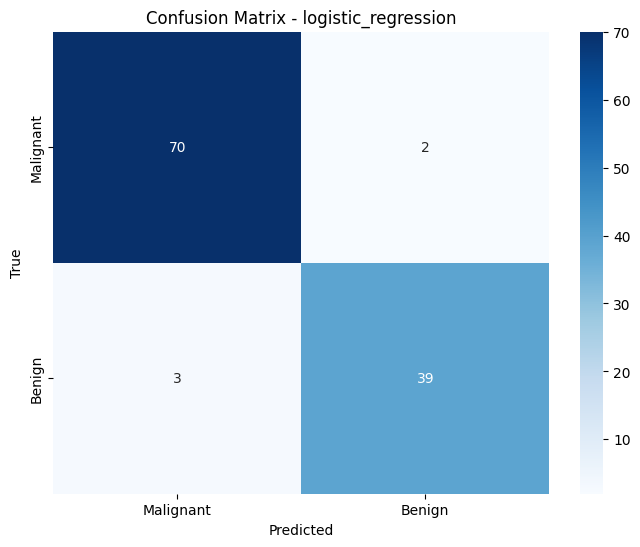

Sensitivity: 0.9286
Specificity: 0.9722
Positive Predictive Value: 0.9512
Negative Predictive Value: 0.9589
Accuracy: 0.9561


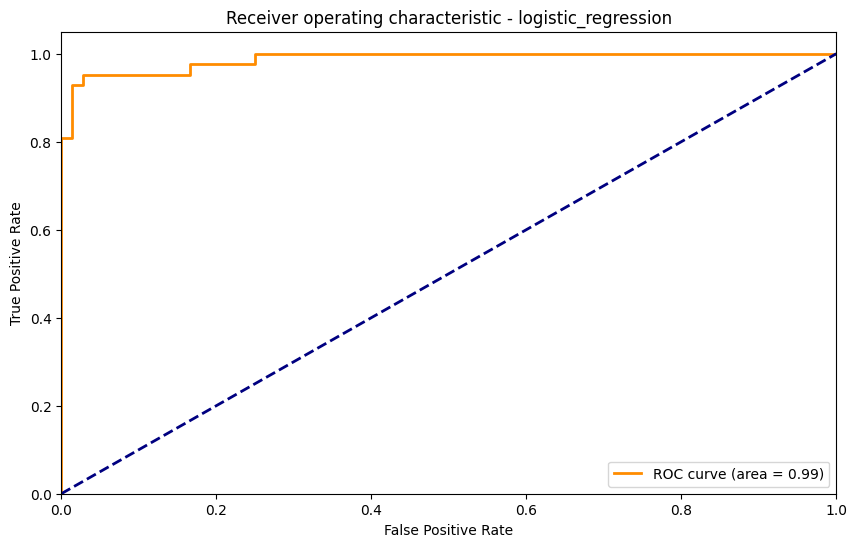

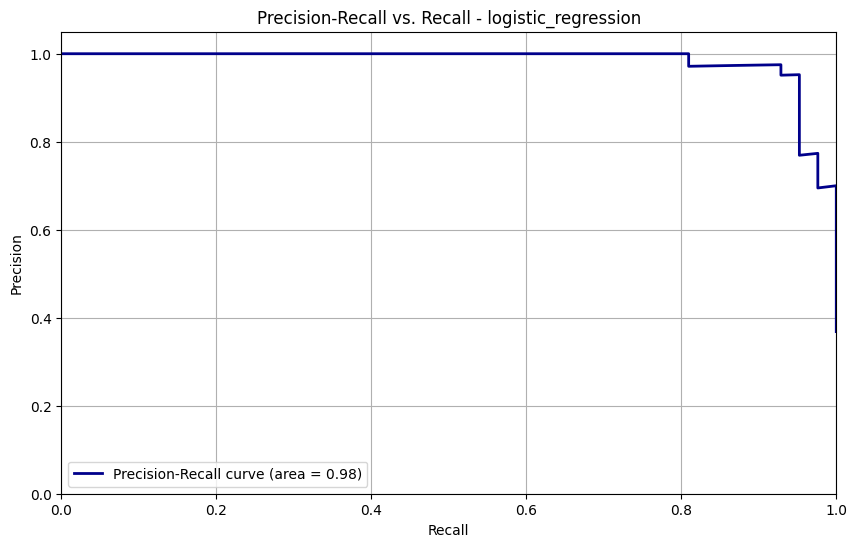

---- Processing random_forest ----

--- Evaluating Initial random_forest on Test Set ---

random_forest Results:
Accuracy: 0.9386
Precision: 0.9487
Recall: 0.8810
F1: 0.9136
Roc_auc: 0.9916
Specificity: 0.9722
Npv: 0.9333
Neg_brier_score: -0.0430

--- Evaluating Optimized random_forest on Test Set ---

random_forest Results:
Accuracy: 0.9474
Precision: 0.9737
Recall: 0.8810
F1: 0.9250
Roc_auc: 0.9917
Specificity: 0.9861
Npv: 0.9342
Neg_brier_score: -0.0427
y_pred_optimized for random_forest: [0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1]


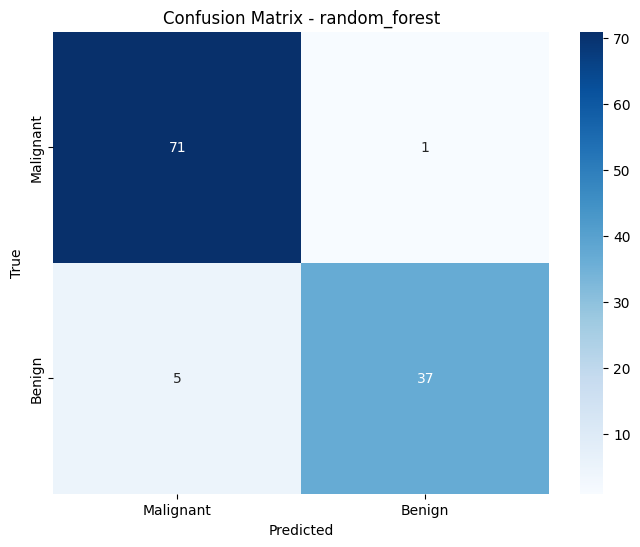

Sensitivity: 0.8810
Specificity: 0.9861
Positive Predictive Value: 0.9737
Negative Predictive Value: 0.9342
Accuracy: 0.9474


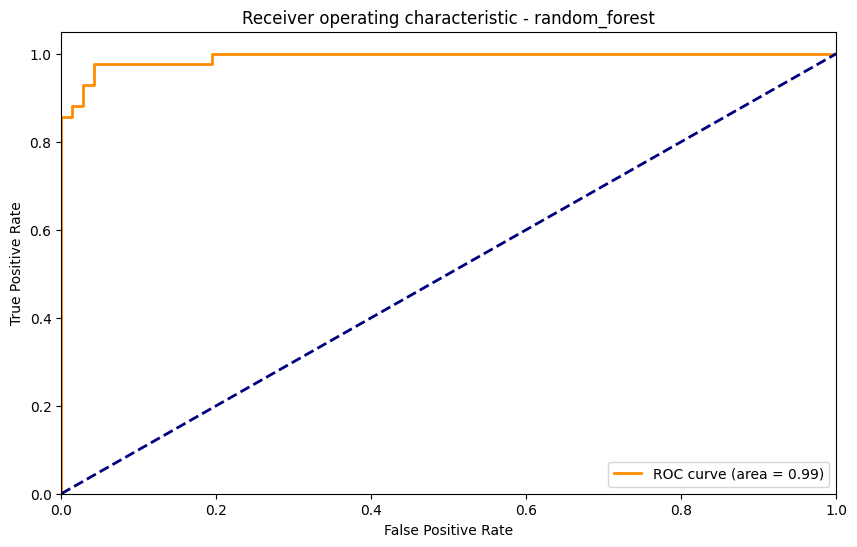

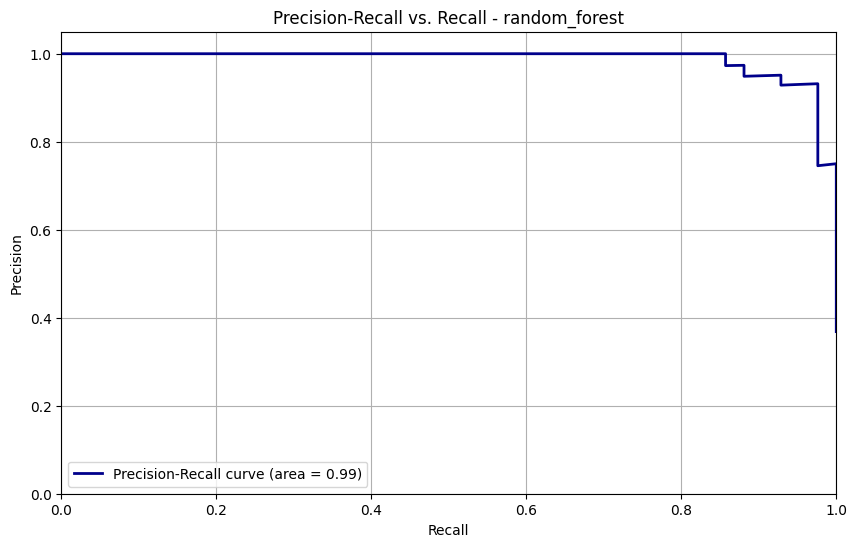

---- Processing lightgbm ----

--- Evaluating Initial lightgbm on Test Set ---

lightgbm Results:
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1: 0.9500
Roc_auc: 0.9927
Specificity: 1.0000
Npv: 0.9474
Neg_brier_score: -0.0304

--- Evaluating Optimized lightgbm on Test Set ---

lightgbm Results:
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1: 0.9383
Roc_auc: 0.9927
Specificity: 0.9861
Npv: 0.9467
Neg_brier_score: -0.0362
y_pred_optimized for lightgbm: [0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 1]


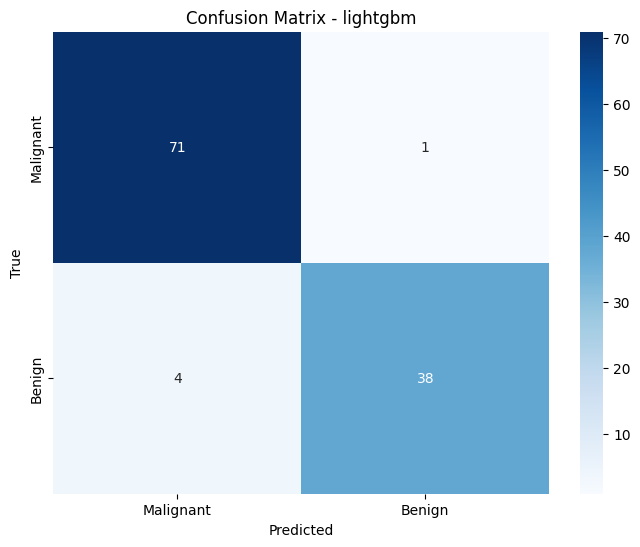

Sensitivity: 0.9048
Specificity: 0.9861
Positive Predictive Value: 0.9744
Negative Predictive Value: 0.9467
Accuracy: 0.9561


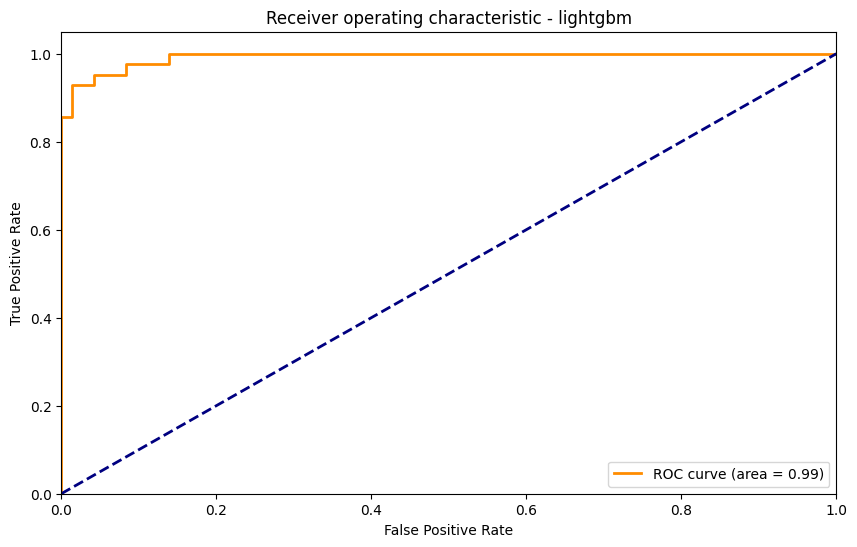

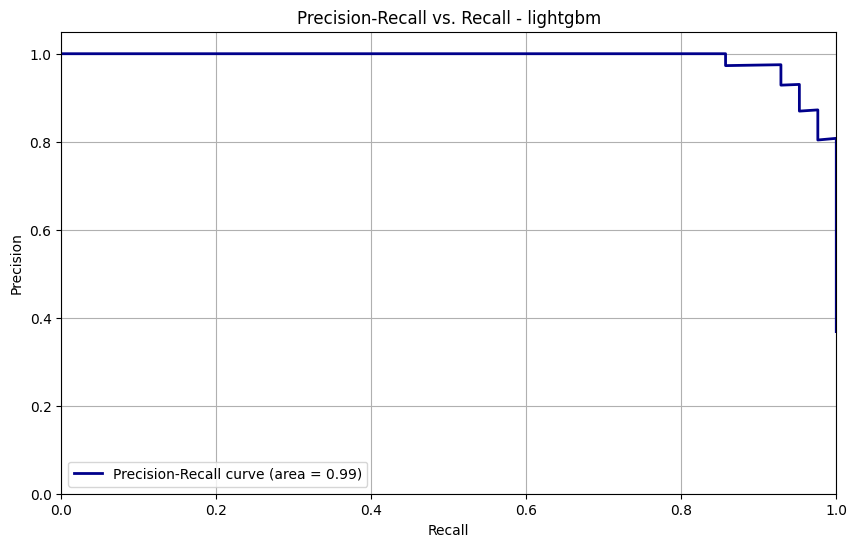

---- Processing naive_bayes ----

--- Evaluating Initial naive_bayes on Test Set ---

naive_bayes Results:
Accuracy: 0.9123
Precision: 0.8636
Recall: 0.9048
F1: 0.8837
Roc_auc: 0.9678
Specificity: 0.9167
Npv: 0.9429
Neg_brier_score: -0.0832

--- Evaluating Optimized naive_bayes on Test Set ---

naive_bayes Results:
Accuracy: 0.9123
Precision: 0.8636
Recall: 0.9048
F1: 0.8837
Roc_auc: 0.9664
Specificity: 0.9167
Npv: 0.9429
Neg_brier_score: -0.0860
y_pred_optimized for naive_bayes: [0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0
 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1]


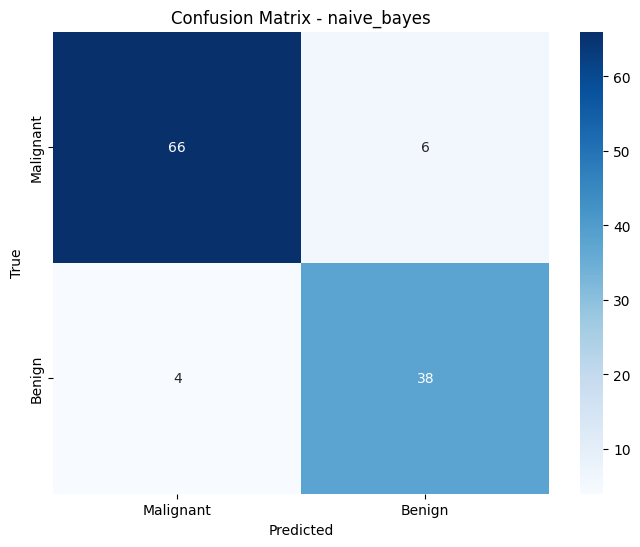

Sensitivity: 0.9048
Specificity: 0.9167
Positive Predictive Value: 0.8636
Negative Predictive Value: 0.9429
Accuracy: 0.9123


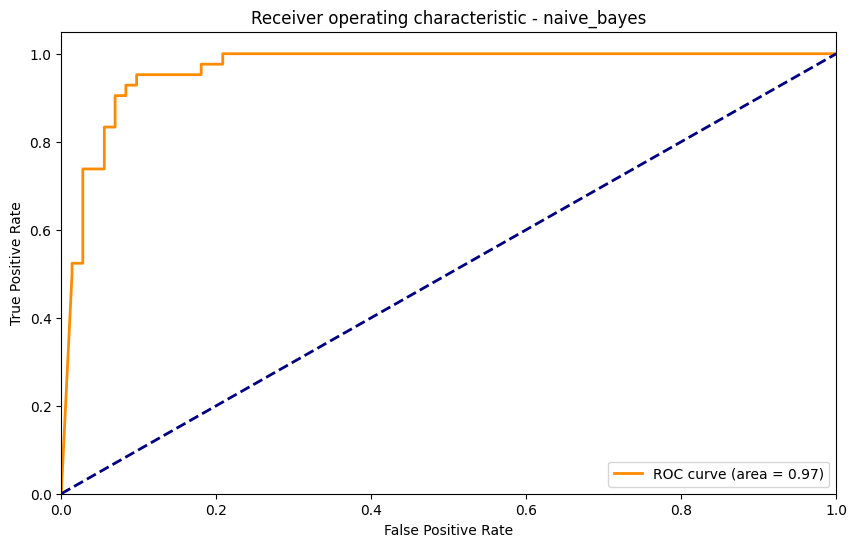

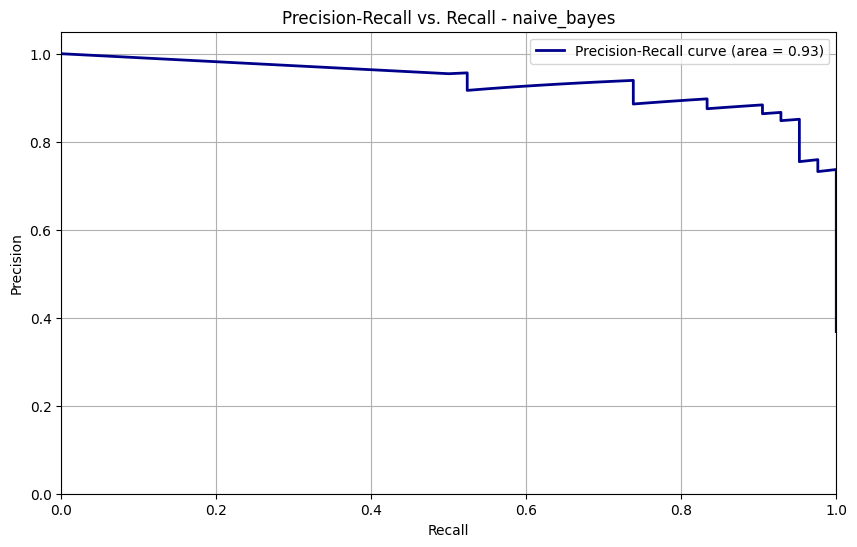


--- All Model Results ---

Model: logistic_regression

Initial Results:
accuracy: 0.9825
precision: 1.0000
recall: 0.9524
f1: 0.9756
roc_auc: 0.9904
specificity: 1.0000
npv: 0.9730
neg_brier_score: -0.0270

Optimized Results:
accuracy: 0.9561
precision: 0.9512
recall: 0.9286
f1: 0.9398
roc_auc: 0.9878
specificity: 0.9722
npv: 0.9589
neg_brier_score: -0.0411

Model: random_forest

Initial Results:
accuracy: 0.9386
precision: 0.9487
recall: 0.8810
f1: 0.9136
roc_auc: 0.9916
specificity: 0.9722
npv: 0.9333
neg_brier_score: -0.0430

Optimized Results:
accuracy: 0.9474
precision: 0.9737
recall: 0.8810
f1: 0.9250
roc_auc: 0.9917
specificity: 0.9861
npv: 0.9342
neg_brier_score: -0.0427

Model: lightgbm

Initial Results:
accuracy: 0.9649
precision: 1.0000
recall: 0.9048
f1: 0.9500
roc_auc: 0.9927
specificity: 1.0000
npv: 0.9474
neg_brier_score: -0.0304

Optimized Results:
accuracy: 0.9561
precision: 0.9744
recall: 0.9048
f1: 0.9383
roc_auc: 0.9927
specificity: 0.9861
npv: 0.9467
neg_brier_sco

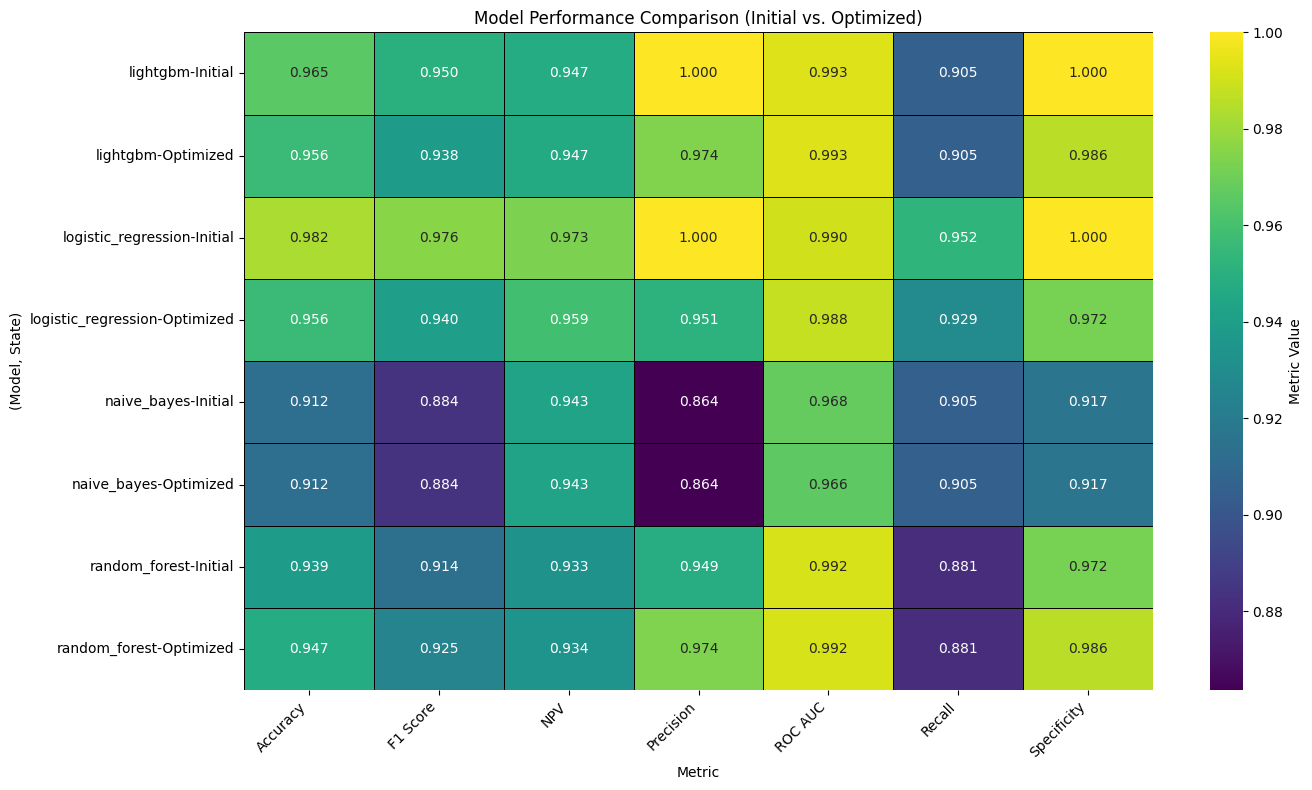

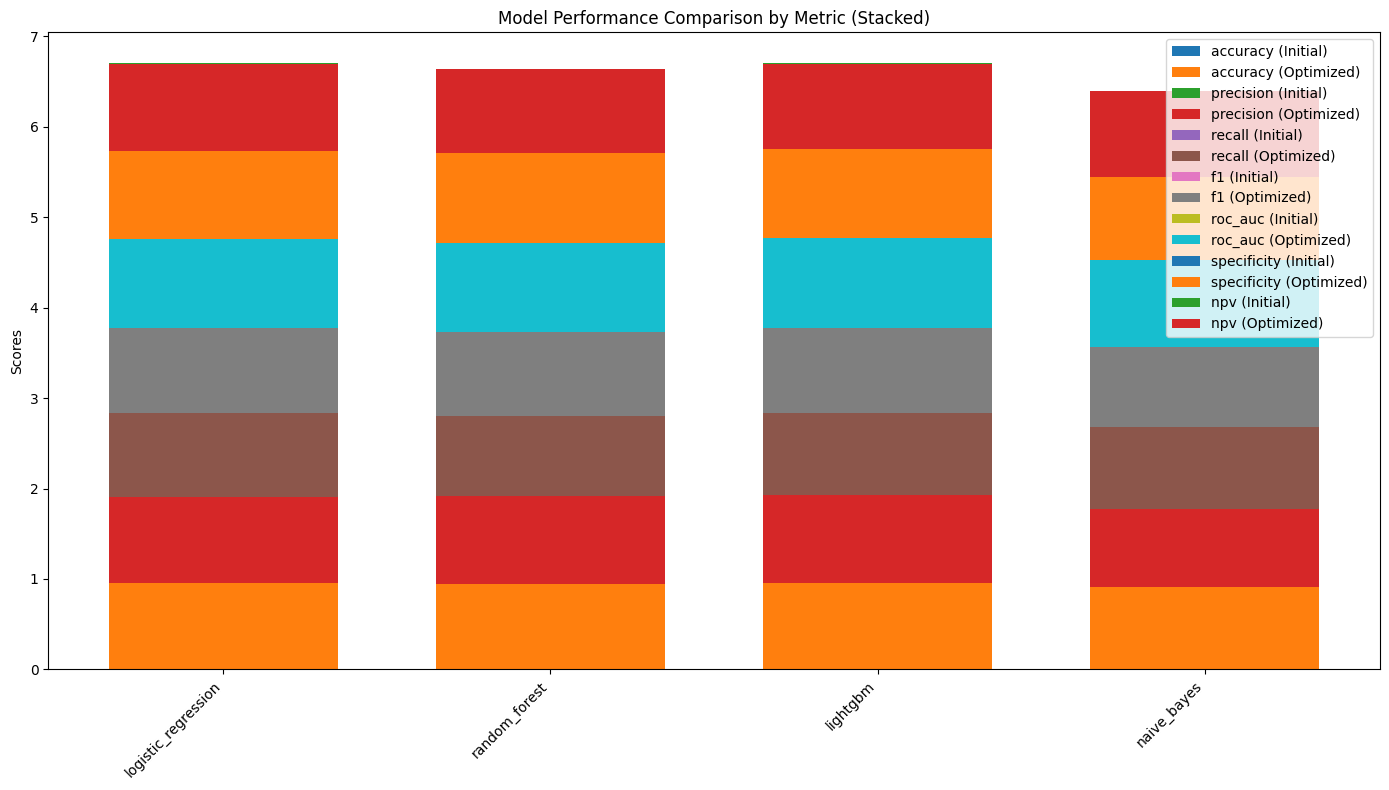

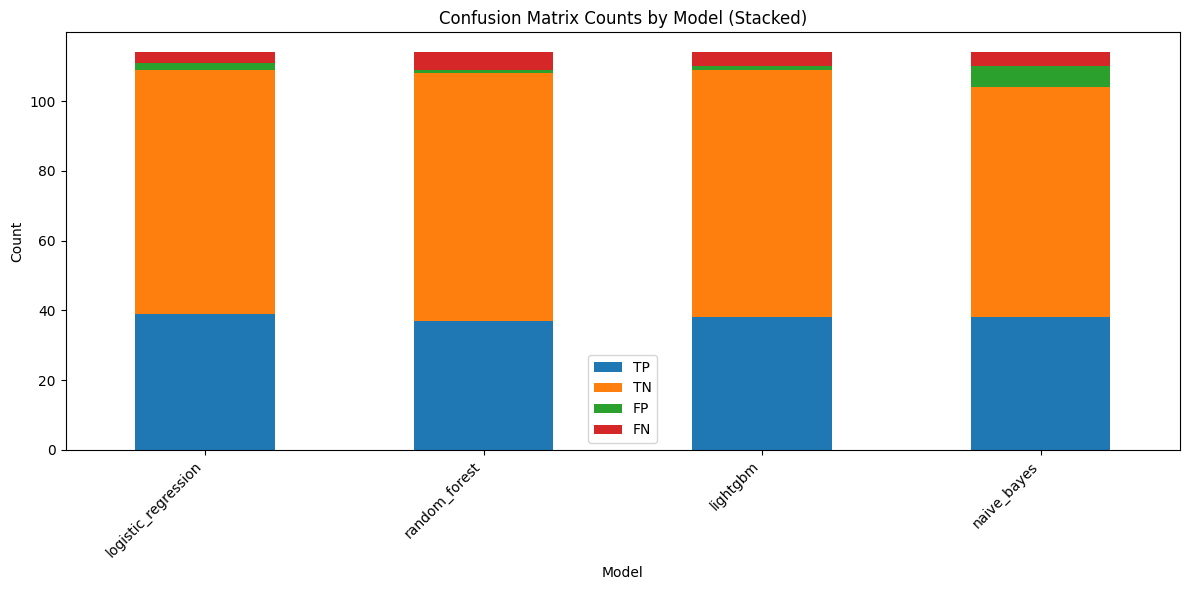

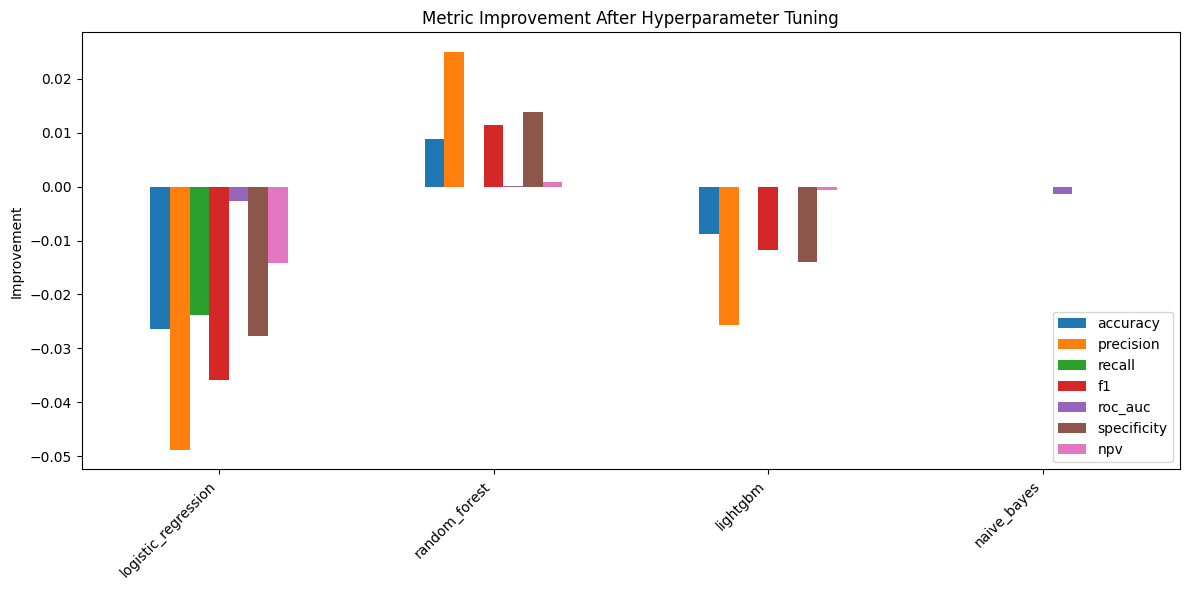

In [88]:
# 14. Main Execution
if __name__ == "__main__":
    X = df_transformed
    y = df["diagnosis"]

    # Feature Selection (BEFORE splitting)
    X, dropped_columns = select_features(X)

    X_train, X_val, X_test, y_train, y_val, y_test = split_data(X, y, test_size=0.2, val_size=0.2)

    models = define_models()
    scoring_metrics = define_scoring_metrics()

    model_results = {}
    cv_results = []
    model_names = []

    for model_name, model in models.items():
        print(f"---- Processing {model_name} ----")

        y_pred_initial, initial_scores = evaluate_initial_model(model, X_train, y_train, X_test, y_test, model_name, scoring_metrics)
        model_results[model_name] = {"initial": initial_scores}

        tuned_model = train_and_evaluate_model(model, X_train, y_train, X_val, y_val, model_name, scoring_metrics)

        y_pred_optimized, optimized_scores = evaluate_optimized_model(tuned_model, X_test, y_test, model_name, scoring_metrics)
        model_results[model_name]["optimized"] = optimized_scores
        model_results[model_name]["optimized_predictions"] = y_pred_optimized

        if y_pred_optimized is not None:
            print(f"y_pred_optimized for {model_name}:", y_pred_optimized)
            plot_confusion_matrix(y_test, y_pred_optimized, model_name)
            visualize_performance(tuned_model, X_test, y_test, model_name)
        else:
            print(f"Skipping confusion matrix and performance visualizations for {model_name} due to prediction errors.")

    print("\n--- All Model Results ---")
    for model_name, results in model_results.items():
        print(f"\nModel: {model_name}")
        print("\nInitial Results:")
        for metric, value in results["initial"].items():
            print(f"{metric}: {value:.4f}")
        print("\nOptimized Results:")
        for metric, value in results["optimized"].items():
            print(f"{metric}: {value:.4f}")

    print("Model Results:", model_results)
    visualize_model_comparison(model_results, y_test)